### Name: Harshvardhan Chauhan
### Id: C0780361

In [ ]:
from googleapiclient.discovery import build
import pandas as pd
import matplotlib as plt
import re

In [ ]:
# Youtube API Key
youTubeApiKey='Your Key Here'
youtube=build('youtube','v3',developerKey=youTubeApiKey)

In [ ]:
data = pd.read_csv('vdolinks.csv')
data

,youtubeId,movieId,title
0,K26_sDKnvMU,1,Toy Story (1995)
1,3LPANjHlPxo,2,Jumanji (1995)
2,rEnOoWs3FuA,3,Grumpier Old Men (1995)
3,j9xml1CxgXI,4,Waiting to Exhale (1995)
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995)
...,...,...,...
25618,-oB6DN5dYWo,131252,Forklift Driver Klaus: The First Day on the Jo...
25619,DK7KQ-gEdl4,131256,"Feuer, Eis & Dosenbier (2002)"
25620,v29P-wchMZQ,131258,The Pirates (2014)
25621,dAz-nZ65jYU,131260,Rentun Ruusu (2001)


In [ ]:
# Fetching all Video Ids
videos_id = []
for index, row in data.iterrows():
    video_id = row['youtubeId']
    videos_id.append(video_id)
# videos_id

In [ ]:
# Function to get all required Youtube Data
def get_video_details(youtube, **kwargs):
    return youtube.videos().list(
        part="snippet,contentDetails,statistics",
        **kwargs
    ).execute()

In [ ]:
# Function to print Video Response
c_title = []
desc = []
publishTime = []
comment = []
like = []
dislike = []
view = []
durationStr = []
def print_video_infos(video_response):
    items = video_response.get("items")[0]
    # get the snippet, statistics & content details from the video response
    snippet         = items["snippet"]
    statistics      = items["statistics"]
    content_details = items["contentDetails"]
    # get infos from the snippet
    channel_title = snippet["channelTitle"]
    title         = snippet["title"]
    description   = snippet["description"]
    publish_time  = snippet["publishedAt"]
    # get stats infos
    comment_count = statistics["commentCount"]
    like_count    = statistics["likeCount"]
    dislike_count = statistics["dislikeCount"]
    view_count    = statistics["viewCount"]
    # get duration from content details
    duration = content_details["duration"]
    # duration in the form of something like 'PT5H50M15S'
    # parsing it to be something like '5:50:15'
    parsed_duration = re.search(f"PT(\d+H)?(\d+M)?(\d+S)", duration).groups()
    duration_str = ""
    for d in parsed_duration:
        if d:
            duration_str += f"{d[:-1]}:"
    duration_str = duration_str.strip(":")
    c_title.append(title)
    desc.append(description)
    publishTime.append(publish_time)
    comment.append(comment_count)
    like.append(like_count)
    view.append(view_count)
    dislike.append(dislike_count)
    durationStr.append(duration_str)
    print(f"""\
    Title: {title}
    Description: {description}
    Channel Title: {channel_title}
    Publish time: {publish_time}
    Duration: {duration_str}
    Number of comments: {comment_count}
    Number of likes: {like_count}
    Number of dislikes: {dislike_count}
    Number of views: {view_count}
    """)

In [ ]:
# Loop  To Fetch All Data
for i in range(4000):
    try:
        response = get_video_details(youtube, id=videos_id[i])
        print_video_infos(response)
    except:
        pass

    Title: Toy Story (1995) Trailer 2 (VHS Capture)
    Description: Trailer for Toy Story (1995) captured from the The Santa Clause (1994) VHS tape. This tape is labeled 3633 and released in (1994).
    Channel Title: retro VHS trailers
    Publish time: 2015-05-26T17:11:42Z
    Duration: 1:31
    Number of comments: 12
    Number of likes: 96
    Number of dislikes: 10
    Number of views: 100382
    
    Title: Grumpier Old Men - Trailer
    Description: The more things change, the more they stay the same in Wabasha, Minnesota. The uncatchable fish named Catfish Hunter grows fatter. The wisecracks, zingers and put downs pile up like freshly raked leaves. And GRUMPY OLD MEN become grumpier in the sequel that's "pure delight, a wonderfully warmhearted comedy" (David Sheehan, CBS-TV). Grabbing fishing rods and picking up where they left off, JACK LEMMON and WALTER MATTHAU reel in another comedy winner as GRUMPIER OLD MEN. ANN-MARGRET, DARYL HANNAH, KEVIN POLLACK and BURGESS MEREDITH al

    Title: Copycat (1995) trailer
    Description: Trailer for director Jon Amiel's film starring Sigourney Weaver, Holly Hunter, Dermot Mulroney, William McNamara, Harry Connick Jr.
    Channel Title: cae758
    Publish time: 2008-05-04T19:57:03Z
    Duration: 2:1
    Number of comments: 121
    Number of likes: 385
    Number of dislikes: 17
    Number of views: 338880
    
    Title: Assassins Trailer HD  (1995)
    Description: Director: Richard Donner
Cast:Sylvester Stallone, Antonio Banderas,Julianne Moore.
Plot: Robert Rath is a seasoned hitman who just wants out of the business with no back talk. But, as things go, it ain't so easy. A younger, peppier assassin named Bain is having a field day trying to kill said older assassin. Rath teams up with a computer hacker named Electra to defeat the obsessed Bain.
    Channel Title: Face Off
    Publish time: 2010-11-10T15:26:43Z
    Duration: 2:42
    Number of comments: 35
    Number of likes: 261
    Number of dislikes: 15
    Numbe

    Title: Wings of Courage - Trailer | Crackle
    Description: All your favorite Crackle content has made the move over to http://www.Crackle.com. Create a free account and enjoy!
 
SUBSCRIBE for more series like this: http://bit.ly/CrackleSub
 
Starting in 2014 Crackle movies & shows will be available only at http://bit.ly/CrackleDotCom. Create a free Crackle account for full access here: http://bit.ly/CrackleSignUp
 
Connect with Crackle Online:
Visit the Crackle WEBSITE: http://bit.ly/CrackleWeb
Like Crackle on FACEBOOK: http://bit.ly/CrackleFaceBook
Follow Crackle on TWITTER: http://bit.ly/CrackleTwitter
 
About Crackle:
Crackle, a unit of Sony Pictures Television, programs Hollywood movies, TV shows and original series and movies for the world's connected audience. With 25 million viewers across 22 countries, Crackle specializes in genres such as Action, Comedy, Crime, Horror and Sci-fi. Original series on Crackle include the psychological thriller Chosen; Cleaners, starring Dav

    Title: Se7en  (1995) - Trailer HD Remastered
    Description: Se7en (1995)
Directed by David Fincher
Starring Brad Pitt and Morgan Freeman

The original trailer remastered in 1080p. NOT official. Fan-remake.
    Channel Title: UsSkyPic
    Publish time: 2014-09-04T10:07:00Z
    Duration: 2:24
    Number of comments: 62
    Number of likes: 1254
    Number of dislikes: 30
    Number of views: 353051
    
    Title: Pocahontas (1995) Trailer 2 (VHS Capture)
    Description: Trailer for Pocahontas (1995) captured from the The Santa Clause (1994) VHS tape. This tape is labeled 3633 and released in (1994).
    Channel Title: retro VHS trailers
    Publish time: 2015-05-27T14:49:44Z
    Duration: 1:59
    Number of comments: 55
    Number of likes: 256
    Number of dislikes: 29
    Number of views: 197389
    
    Title: When Night is Falling - Trailer
    Description: Watch the full film here: http://buskfilms.com/films/when-night-is-falling/

An uptight and conservative woman, working

    Title: Lawnmower Man 2: Jobe's War Trailer 1995
    Description: Lawnmower Man 2: Jobe's War Trailer 1995
Director: Farhad Mann
Starring: Austin O'Brien, Ely Pouget, Kevin Conway, Matt Frewer, Patrick Bergin, Camille Cooper

Official Content From New Line Home Entertainment

Empowered to an almost godlike status in 'virtual reality', a former simpleton takes revenge for past mistreatment in the real world.

Movie, Lawnmower Man 2: Jobe's War Movie,Lawnmower Man 2: Jobe's War Trailer,Lawnmower Man 2: Jobe's War 1995, Farhad Mann,Austin O'Brien, Ely Pouget, Kevin Conway, Matt Frewer, Patrick Bergin, Camille Cooper
    Channel Title: Video Detective
    Publish time: 2014-11-10T05:15:19Z
    Duration: 1:47
    Number of comments: 23
    Number of likes: 75
    Number of dislikes: 6
    Number of views: 15119
    
    Title: Fair Game Trailer 1995
    Description: Fair Game Trailer 1995
Starring: Cindy Crawford, William Baldwin, Steven Berkoff, Christopher McDonald, Miguel Sandoval,  


    Title: Angels And Insects Trailer 1995
    Description: Angels And Insects Trailer 1995
Director: Philip Haas
Starring: Anna Massey, Jeremy Kemp, Kristin Scott Thomas, Patsy Kensit, Mark Rylance,  

Official Content From MGM Home Entertainment

When a working class man marries a wealthy woman, he soon finds his newly priviliged life is full of erotic decadance and illicit passion.

Movie, Angels And Insects Movie,Angels And Insects Trailer,Angels And Insects 1995, Philip Haas,Anna Massey, Jeremy Kemp, Kristin Scott Thomas, Patsy Kensit, Mark Rylance,
    Channel Title: Video Detective
    Publish time: 2014-11-11T11:59:34Z
    Duration: 2:40
    Number of comments: 9
    Number of likes: 84
    Number of dislikes: 6
    Number of views: 49832
    
    Title: Dunston Checks In Trailer 1995
    Description: Dunston Checks In Trailer 1995
Director: Ken Kwapis
Starring: Faye Dunaway, Jason Alexander, Paul Reubens, Rupert Everett, Eric Lloyd, Glenn Shadix

Official Content From Twentiet

    Title: Taxi Driver (1976) - [Official Trailer HD]
    Description: Taxi Driver 1976 - [Official Trailer HD] Director: Martin Scorsese 
A mentally unstable Vietnam war veteran works as a nighttime taxi driver in New York City where the perceived decadence and sleaze feeds his urge to violently lash out, attempting to save a teenage prostitute in the process.
Director: Martin Scorsese
Writer: Paul Schrader
Stars: Robert De Niro, Jodie Foster and Cybill Shepherd
http://culturafilmesonline.blogspot.com.br/
    Channel Title: GustavdeskMovies
    Publish time: 2012-03-18T07:57:45Z
    Duration: 3:22
    Number of comments: 345
    Number of likes: 3402
    Number of dislikes: 75
    Number of views: 790591
    
    Title: Rumble In The Bronx (1995) Official Trailer - Jackie Chan, Anita Mui Action Movie HD
    Description: Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Like us on FACEBOOK: ht

    Title: Jupiter's Wife - Excerpt
    Description: An excerpt from the documentary "Jupiter's Wife" by Michel Negroponte with music and sound by Harmonic Ranch - Beo Morales, Brooks Williams. 

http://HarmonicRanch.com
    Channel Title: Harmonic Ranch
    Publish time: 2011-03-21T20:43:00Z
    Duration: 5:35
    Number of comments: 9
    Number of likes: 29
    Number of dislikes: 0
    Number of views: 6227
    
    Title: Pie In The Sky Trailer
    Description: 
    Channel Title: Baker & Taylor
    Publish time: 2010-12-20T20:45:29Z
    Duration: 1:21
    Number of comments: 2
    Number of likes: 3
    Number of dislikes: 3
    Number of views: 11719
    
    Title: Frankie Starlight Trailer 1995
    Description: Frankie Starlight Trailer 1995
Director: Michael Lindsay-Hogg
Starring: Gabriel Byrne, Matt Dillon, Anne Parillaud, Allen Panginy, Corbin Walker, Corban Walker

Official Content From New Line Home Entertainment

The quirky story of a young boy's adventures growing up wi

    Title: Rob Roy (trailer)
    Description: In the highlands of Scotland in the 1700s, Rob Roy tries to lead his small town to a better future by borrowing money from the local nobility, Marquis of Montrose, to buy cattle to herd to market. 

Unfortunately, the Marquis' lackey, Archibald Cunningham, discovers the deal and interferes. The money never shows up, the Marquis is determined to take McGregor's land as payment, and McGregor is forced to become an outlaw.

http://imdb.com/title/tt0114287/
    Channel Title: safvio
    Publish time: 2008-01-21T20:15:50Z
    Duration: 2:13
    Number of comments: 171
    Number of likes: 587
    Number of dislikes: 32
    Number of views: 574303
    
    Title: THE ADDICTION (Abel Ferrara) 1995 Trailer
    Description: Trailer for 'The Addiction' by Abel Ferrara
    Channel Title: dani77744
    Publish time: 2011-11-26T17:29:34Z
    Duration: 37
    Number of comments: 21
    Number of likes: 158
    Number of dislikes: 14
    Number of views: 

    Title: Johnny Mnemonic (1995) - Trailer
    Description: Johnny Mnemonic - Starring Keanu Reeves, Dina Meyer, Ice-T, and Dolph Lundgren

Release Date:   May 26, 1995
    Channel Title: TheSciFiSpot
    Publish time: 2011-01-01T16:25:43Z
    Duration: 2:19
    Number of comments: 118
    Number of likes: 416
    Number of dislikes: 25
    Number of views: 201745
    
    Title: Judge Dredd (trailer)
    Description: http://video.movies.go.com/products/01489900.html
Judge Dredd is a 1995 action film directed by Danny Cannon, and starring Sylvester Stallone, Diane Lane, Rob Schneider, Armand Assante and Max von Sydow. The film is based on the Judge Dredd strip in the British comic 2000 AD. Certain elements of the film were altered from the comic series, but it still did not find wide mainstream appeal.

Sylvester Stallone - (Judge Dredd)
Armand Assante - (Rico)
Diane Lane - (Judge Hershey)
Rob Schneider - (Fergie, Herman Ferguson)
Joan Chen - (Ilsa)
Max von Sydow - (Judge Fargo)
Chris

    Title: Reckless Trailer 1995
    Description: Reckless Trailer 1995
Director: Norman Rene
Starring: Mary-Louise Parker, Mia Farrow, Scott Glenn, Stephen Dorff, Tony Goldwyn, Eileen Brennan

Official Content From Hallmark Entertainment

On Christmas eve, a relentlessly cheerful woman escapes from the killers hired by her husband, and embarks on a series of strange encounters.

Movie, Reckless Movie,Reckless Trailer,Reckless 1995, Norman Rene,Mary-Louise Parker, Mia Farrow, Scott Glenn, Stephen Dorff, Tony Goldwyn, Eileen Brennan
    Channel Title: Video Detective
    Publish time: 2014-11-10T12:19:48Z
    Duration: 2:11
    Number of comments: 11
    Number of likes: 25
    Number of dislikes: 0
    Number of views: 4805
    
    Title: Safe (1995) Trailer
    Description: Theatrical Trailer
    Channel Title: kirson05
    Publish time: 2013-03-20T05:54:42Z
    Duration: 1:20
    Number of comments: 45
    Number of likes: 348
    Number of dislikes: 19
    Number of views: 146992
 

    Title: A Walk in the Clouds (1995) Trailer
    Description: After returning from the war, Paul and a young woman meet on a bus as she's headed home from college to help with the grape harvest and face her Old World domineering dad. The woman has not married but is pregnant and she thinks her father is going to kill her. Paul proposes to pose as her husband to help her face her father. When their passion for each other is finally ignited and explodes, they realize they must overcome all odds to be together. 

Starring Keanu Reeves
    Channel Title: glows
    Publish time: 2010-07-15T19:19:28Z
    Duration: 2:28
    Number of comments: 197
    Number of likes: 3003
    Number of dislikes: 81
    Number of views: 1042038
    
    Title: Waterworld Original Film Trailer
    Description: Trailer for the movie Waterworld starring Kevin Costner, Dennis Hopper, Jeanne Tripplehorn and Tina Majorino.
    Channel Title: watchingkevin
    Publish time: 2007-12-01T03:38:13Z
    Duration: 1:54


    Title: Don Juan DeMarco Official Trailer - Johnny Depp Movie (1994)
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Don Juan DeMarco Official Trailer - Johnny Depp Movie (1994)

A psychiatrist must cure a young patient that presents himself as Don Juan, the greatest lover in the world.

MGM - 1993
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-04-10T00:07:19Z
    Duration: 2:25
    Number of comments: 125
    Number of likes: 3176
    Number of dislikes: 115
    Number of views: 943089
    
    Title: Disclosure (1994) Trailer
    Description: http://filmtipps24.tv
A computer specialist is sued for sexual harassment by a former lover turned boss who initiated the act forcefully, which threatens both his career and his personal life
    Channel Title: filmtipps24
 

    Title: Three Reasons: Hoop Dreams
    Description: Those are our Three Reasons. What are yours? 

Out now on Blu-ray and DVD: http://www.criterion.com/films/906-hoop-dreams
    Channel Title: criterioncollection
    Publish time: 2015-04-01T21:32:02Z
    Duration: 1:57
    Number of comments: 24
    Number of likes: 281
    Number of dislikes: 3
    Number of views: 30453
    
    Title: Content Creation "I.Q." Video Review / Infomo
    Description: info about the movie I.Q.
    Channel Title: Edit Everything
    Publish time: 2011-02-15T02:51:22Z
    Duration: 2:29
    Number of comments: 12
    Number of likes: 72
    Number of dislikes: 8
    Number of views: 68087
    
    Title: Interview with the Vampire: The Vampire Chronicles TRAILER
    Description: From Wikipedia, the free encyclopedia

Interview with the Vampire: The Vampire Chronicles is a 1994 film, based on the 1976 novel Interview with the Vampire by Anne Rice. The film was directed by Neil Jordan, and stars Tom Crui

    Title: Miracle on 34th Street 1994 Trailer
    Description: I know... it's an older flick, but nevertheless, it needed to be put up... it's a Christmas Classic & with the Holidays approaching, what can I say!
    Channel Title: TheTrailersPark
    Publish time: 2009-10-31T18:11:00Z
    Duration: 3:15
    Number of comments: 245
    Number of likes: 1726
    Number of dislikes: 78
    Number of views: 998000
    
    Title: My Family Trailer 1995
    Description: My Family Trailer 1995
Director: Gregory Nava
Starring: Edward James Olmos, Elpidia Carrillo, Esai Morales, Jenny Gago, Jimmy Smits, Eduardo Lopez Rojas

Official Content From New Line Home Entertainment

Highly acclaimed story of a Mexican-American family's struggle to achieve the American dream through three generations from the 1920's to the 1980's. Also released as Mi Familia.

Movie, My Family Movie,My Family Trailer,My Family 1995, Gregory Nava,Edward James Olmos, Elpidia Carrillo, Esai Morales, Jenny Gago, Jimmy Smit

    Title: Pulp Fiction Official Trailer #1 - (1994) HD
    Description: Pulp Fiction movie clips: http://j.mp/1L5eDtj
BUY THE MOVIE: http://amzn.to/u4q3x7
Don't miss the HOTTEST NEW TRAILERS: http://bit.ly/1u2y6pr

CLIP DESCRIPTION:
Hit men, gangsters and robbers converge in Quentin Tarantino's violent tale of revenge. Stars John Travolta Samuel L. Jackson Bruce Willis and Uma Thurman

FILM DESCRIPTION:
Outrageously violent, time-twisting, and in love with language, Pulp Fiction was widely considered the most influential American movie of the 1990s. Director and co-screenwriter Quentin Tarantino synthesized such seemingly disparate traditions as the syncopated language of David Mamet; the serious violence of American gangster movies, crime movies, and films noirs mixed up with the wacky violence of cartoons, video games, and Japanese animation; and the fragmented story-telling structures of such experimental classics as Citizen Kane, Rashomon, and La jetée. The Oscar-winning script by

    Title: Relative Fear Trailer 1995
    Description: Relative Fear Trailer 1995
Director: George Mihalka
Starring: Darlanne Fluegel, Denise Crosby, James Brolin, M. Emmet Walsh, Martin Neufeld, Matthew Dupuis

Official Content From Republic Pictures Home Video

When two babies are switched at birth, the innocent parents of an evil young boy are terrorized by a series of horrific deaths.

Movie, Relative Fear Movie,Relative Fear Trailer,Relative Fear 1995, George Mihalka,Darlanne Fluegel, Denise Crosby, James Brolin, M. Emmet Walsh, Martin Neufeld, Matthew Dupuis
    Channel Title: Video Detective
    Publish time: 2014-11-08T02:37:07Z
    Duration: 1:33
    Number of comments: 0
    Number of likes: 13
    Number of dislikes: 0
    Number of views: 2236
    
    Title: The Swan Princess official Trailers
    Description: The Swann Princess 
&
The Swan Princess And The Mystery of the Enchanted Treasure

Official Trailer From New Line Cinema(1994)(1998)
    Channel Title: AngelGirl023


    Title: Tales From The Hood Trailer 1995
    Description: Tales From The Hood Trailer 1995
Director: Rusty Cundieff
Starring: Corbin Bernsen, David Alan Grier, Clarence Williams III, Wings Hauser, Anthony Griffith, Michael Massee

Official Content From HBO Video

Three friends visit an inner city funeral parlor to pick up a drug stash. Inside, they meet a strange mortician who gets his kicks in a very different way. As if the hood wasn't already scary enough.

Movie, Tales From The Hood Movie,Tales From The Hood Trailer,Tales From The Hood 1995, Rusty Cundieff,Corbin Bernsen, David Alan Grier, Clarence Williams III, Wings Hauser, Anthony Griffith, Michael Massee
    Channel Title: Video Detective
    Publish time: 2014-11-06T01:54:08Z
    Duration: 1:37
    Number of comments: 5
    Number of likes: 70
    Number of dislikes: 2
    Number of views: 17927
    
    Title: TOM & VIV trailer 1994 (Entertainment in video)
    Description: TOM & VIV trailer 1994 (Entertainment in video) t

    Title: Bullets Over Broadway (1994) trailer
    Description: Bullets Over Broadway (1994) trailer
    Channel Title: kindeer
    Publish time: 2009-06-06T21:26:23Z
    Duration: 1:52
    Number of comments: 20
    Number of likes: 117
    Number of dislikes: 4
    Number of views: 87037
    
    Title: Clear and Present Danger - Trailer
    Description: This is the third film based on Tom Clancy's high-tech espionage potboilers starring CIA deputy director Jack Ryan. Harrison Ford, returning to the Ryan role after his first go-round in 1992's Patriot Games, is assigned to a delicate anti-drug investigation after a close friend of the President (a Reaganesque Donald Moffat) is murdered by a Colombian drug cartel. When Ryan discovers that the President's wealthy friend was in league with the cartel, the President's devious national security adviser (Harris Yulin) and an ambitious CIA deputy director (Henry Czerny) send a secret paramilitary force into Colombia to wipe out the drug lo

    
    Title: The Mask- Trailer (HD)
    Description:  
    Channel Title: MovieTrailersHubHD
    Publish time: 2012-07-28T16:06:36Z
    Duration: 1:49
    Number of comments: 8
    Number of likes: 229
    Number of dislikes: 14
    Number of views: 111207
    
    Title: Maverick - Trailer
    Description: In one of the most anticipated movies of 1994, box office superstar Mel Gibson ("Lethal Weapon," et. al.) and two-time Academy Award-winner Jodie Foster ("The Accused," "Silence of the Lambs") are a dapper gambler and a seductive con woman in this slick  based on theClassics TV series. James Garner ("Murphy's Romance," TV's "Rockford Files") -- the original Maverick -- James Coburn ("The Magnificent Seven," "Young Guns II"), Graham Greene ("Northern Exposure") and a slew of country singers co-star in this film by Richard Donner ("Superman," "Lethal Weapon" trilogy). The New York Times calls this "fast, funny, full of action...it's "Lethal Weapon" meets "Butch Cassidy and the Sund

    Title: TimeCop Trailer
    Description: TimeCop Trailer with Jean Claude Van Damme
    Channel Title: VanDammeFr
    Publish time: 2008-07-22T20:39:23Z
    Duration: 1:55
    Number of comments: 63
    Number of likes: 270
    Number of dislikes: 12
    Number of views: 187610
    
    Title: True Lies [1994] Trailer
    Description: The trailer for True Lies [1994].
    Channel Title: treskate2
    Publish time: 2007-01-20T13:30:55Z
    Duration: 2:28
    Number of comments: 634
    Number of likes: 3576
    Number of dislikes: 257
    Number of views: 2279860
    
    Title: Wolf (1994) - Trailer
    Description: Directed by Mike Nichols

"Publisher Will Randall becomes a werewolf and has to fight to keep his job."
(by imdb.com)
    Channel Title: Pyrkenstein
    Publish time: 2012-12-04T16:10:36Z
    Duration: 2:10
    Number of comments: 46
    Number of likes: 399
    Number of dislikes: 33
    Number of views: 217014
    
    Title: Wyatt Earp [1994] Official Movie Trailer
  

    Title: "Highlander III: The Sorcerer (1994)" Theatrical Trailer
    Description: Original theatrical trailer for the 1994 film "Highlander III: The Sorcerer."  Starring Christopher Lambert, Mario Van Peebles, Deborah Kara Unger, Mako.  Directed by Andrew Morahan.
    Channel Title: Forever Cinematic Trailers
    Publish time: 2011-11-13T20:38:47Z
    Duration: 1:46
    Number of comments: 12
    Number of likes: 131
    Number of dislikes: 4
    Number of views: 48810
    
    Title: Federal Hill 1994 trailer
    Description: 
    Channel Title: Alexandr11000
    Publish time: 2013-10-11T19:01:36Z
    Duration: 1:33
    Number of comments: 6
    Number of likes: 21
    Number of dislikes: 0
    Number of views: 5863
    
    Title: IN THE MOUTH OF MADNESS (1994) Trailer for John Carpenter's underrated surreal horror
    Description: This is the trailer for John Carpenter's IN THE MOUTH OF MADNESS. 

Be sure to visit our website at http://www.revok.com to check out more rare and har

    
    Title: Boxing Helena
    Description: Boxing Helena (movie trailer)
    Channel Title: chasman20
    Publish time: 2009-01-12T01:50:03Z
    Duration: 2:11
    Number of comments: 60
    Number of likes: 256
    Number of dislikes: 23
    Number of views: 319409
    
    Title: Carlito's Way (1993) - Official Trailer
    Description: Yet another epic Al Pacino gangster movie. A Puerto Rican ex-con pledges to stay away from his former drug dealing ways but finds himself being dragged back by his past connections and the naive machinations of his lawyer and best friend. Hoping to raise enough money to get away from New York, Carlito Brigante takes on the job of running a nightclub, renews an affair with a dancer but old associates and old instincts suck him back into a world of violence and mistrust.

Released on 1993
Directed by: Brian De Palma
Starring: Al Pacino, Sean Penn, Penelope Ann Miller, John Leguizamo, Luis Guzmán, Viggo Mortensen
    Channel Title: thecultbox
    Publ

    Title: Fear of a Black Hat - Theatrical Trailer
    Description: This is a hilarious 1994 Hip-Hop mockumentary that follows the controversial group N.W.H. It was directed, written, and starred by  Rusty Cundieff who went on the direct "Chappelle's Show" and Tales from the Hood.
    Channel Title: hittman4life
    Publish time: 2009-03-29T07:48:24Z
    Duration: 2:19
    Number of comments: 95
    Number of likes: 643
    Number of dislikes: 18
    Number of views: 118626
    
    Title: With Honors (1994) Teaser (VHS Capture)
    Description: Teaser for With Honors (1994) captured from the Major League II (1994) VHS tape. This tape is labeled 13356 and released in (1995).
    Channel Title: retro VHS trailers
    Publish time: 2015-07-20T17:53:58Z
    Duration: 31
    Number of comments: 0
    Number of likes: 12
    Number of dislikes: 0
    Number of views: 7699
    
    Title: Fresh | Trailer [HD]
    Description: My fan-made trailer of the brilliant 1994 Coming-of-Age Crime Dra

    Title: The Englishman Who Went Up a Hill But Came Down a Mountain (1995) Official Trailer 1 - Movie
    Description: Starring: Hugh Grant, Tara Fitzgerald, and Colm Meaney
The Englishman Who Went Up a Hill But Came Down a Mountain (1995) Official Trailer 1 - Movie

When an English cartographer must tell a Welsh village that their mountain is only a hill, the offended community sets out to change that.

Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
We're on SNAPCHAT: http://bit.ly/2cOzfcy
Like us on FACEBOOK: http://bit.ly/1QyRMsE
Follow us on TWITTER: http://bit.ly/1ghOWmt

Welcome to the Fandango MOVIECLIPS Trailer Vault Channel. Where trailers from the past, from recent to long ago, from a time before YouTube, can be enjoyed by all. We search near and far for original movie trailer from all decades. Feel free to send us your trailer requests and we will do our best to hunt it down.
 

    Title: The Man Without A Face Trailer 1993
    Description: The Man Without A Face Trailer 1993
Director: Mel Gibson
Starring: Fay Masterson, Gaby Hoffman, Margaret Whitton, Mel Gibson, Nick Stahl, Richard Masur

Official Content From Warner Home Video

A disfigured man finds the strength to face the world again from a fatherless boy. Gibson's impressive directorial debut!

Movie, The Man Without A Face Movie,The Man Without A Face Trailer,The Man Without A Face 1993, Mel Gibson,Fay Masterson, Gaby Hoffman, Margaret Whitton, Mel Gibson, Nick Stahl, Richard Masur
    Channel Title: Video Detective
    Publish time: 2014-10-28T07:15:36Z
    Duration: 1:4
    Number of comments: 1
    Number of likes: 12
    Number of dislikes: 1
    Number of views: 7772
    
    Title: Manhattan Murder Mystery (1993) - Official Trailer
    Description: Larry and Carol are fairly normal New Yorkers who have sent their son off to college. They meet an elderly couple down the hall and later in the week

    Title: Philadelphia (1993) - Movie Trailer
    Description: With Hanks, who is always watchable, and Washington, who has also got a very good track record, this film was destined to be fantastic but not even I, who always has an optimistic view when it comes to movies, was ready for the impact that this film made. Tom Hanks excelled even himself with his performance as an AIDS striken homosexual who is fired from his job simply because of his condition. It is Hanks, by himself, who makes the whole scenario in the film believable. Although this is Hanks's best performance of his career, he is very closely followed by Denzel Washington who gives a perfect performance as the only lawyer who will take on the case although he is a homophobe himself. The emotional strain of the film on the audience is immense and in the later stages of the film it is almost impossible to watch because of that. The make-up which gives the impression that Hanks really does have the terrible disease is perf

    Title: The Saint Of Fort Washington Trailer 1993
    Description: The Saint Of Fort Washington Trailer 1993
Director: Tim Hunter
Starring: Danny Glover, Ving Rhames, Matt Dillon, Nina Siemaszko, Joe Seneca, Rick Aviles

Official Content From Warner Home Video

A young man and a Vietnam vet, both homeless, develop a bond on the streets of Manhattan.

Movie, The Saint Of Fort Washington Movie,The Saint Of Fort Washington Trailer,The Saint Of Fort Washington 1993, Tim Hunter,Danny Glover, Ving Rhames, Matt Dillon, Nina Siemaszko, Joe Seneca, Rick Aviles
    Channel Title: Video Detective
    Publish time: 2014-10-29T04:25:57Z
    Duration: 1:56
    Number of comments: 18
    Number of likes: 84
    Number of dislikes: 1
    Number of views: 8028
    
    Title: Schindler's List - Official Trailer - Steven Spielberg, Liam Neeson, Ben Kingsley Movie HD
    Description: In 1939, the Germans move Polish Jews to the Kraków Ghetto as World War II begins. Oskar Schindler (Liam Neeson), an et

    Title: So I Married An Axe Murderer trailer
    Description: What do you get when you cross a terrorist, a mafia moll and a kleptomaniac You get Charlie Mackenzies list of ex-lovers! When it comes to his quest for a dream woman, Charlie (Mike Myers  star of Waynes World) has had some serious nightmares! But now hes getting hitched to Harriet (Nancy Travis). Well whats the worst thing she could be An axe murderer! Charlie Mackenzies fear of being hitched for life becomes a fear of being hacked to death in the outrageous comedy SO I MARRIED AN AXE MURDERER as the paranoic newly-wed convinces himself that his heavenly bride is on fact a homicidal maniac! SO I MARRIED AN AXE MURDERER. A serious til death do us part. situation!
    Channel Title: experiencebluray
    Publish time: 2009-09-17T14:11:43Z
    Duration: 2:26
    Number of comments: 51
    Number of likes: 546
    Number of dislikes: 28
    Number of views: 237103
    
    Title: The intro of the movie "Harem" (1985)
    Desc

    Title: Naked In New York Trailer 1994
    Description: Naked In New York Trailer 1994
Director: Daniel Algrant
Starring: Eric Stoltz, Jill Clayburgh, Kathleen Turner, Mary-Louise Parker, Ralph Macchio, Tony Curtis

Official Content From Sony Pictures Home Entertainment

The hilarious story of a playwrite's first production complicated by his unconventional family, his precarious relationship and his cast of kooks. Produced by Martin Scorsese with lots of great cameos.

Movie, Naked In New York Movie,Naked In New York Trailer,Naked In New York 1994, Daniel Algrant,Eric Stoltz, Jill Clayburgh, Kathleen Turner, Mary-Louise Parker, Ralph Macchio, Tony Curtis
    Channel Title: Video Detective
    Publish time: 2014-11-03T02:10:56Z
    Duration: 2:16
    Number of comments: 8
    Number of likes: 107
    Number of dislikes: 3
    Number of views: 14959
    
    Title: Kika - Trailer 1993
    Description: Feliz año 2012!!! 

Aunque este 2012 trae consigo muchas y muy interesantes efeméri

    Title: Batman (1989) Official Trailer #1 - Tim Burton Superhero Movie
    Description: Check out the official Batman (1989) Trailer starring Michael Keaton! Let us know what you think in the comments below.
► Watch on FandangoNOW: https://www.fandangonow.com/details/movie/batman-1989/1MVe0c566ee1eb02a96989f29feb955ad1b?cmp=MCYT_YouTube_Desc 

Subscribe to the channel and click the bell icon to stay up to date on all your favorite movies. 

Starring: Michael Keaton, Jack Nicholson, Kim Basinger
Directed By: Tim Burton
Synopsis: The Dark Knight of Gotham City begins his war on crime with his first major enemy being the clownishly homicidal Joker.Watch More Classic Trailers: 
► Horror Films: http://bit.ly/2D21x45
► Comedies: http://bit.ly/2qTCzPN
► Dramas: http://bit.ly/2tefVm2
► Sci-Fi Movies: http://bit.ly/2msyb5C
► Animated Movies: http://bit.ly/2HqZZ2c
► Documentaries: http://bit.ly/2Fs2zFd
► Musicals: http://bit.ly/2oDFckX
► Romantic Comedies: http://bit.ly/2qQVieQ
► Superhero Fi

    Title: Heavy Metal (1981) TV Spot
    Description: Classic animated midnight movie with one of the best soundtracks ever.
    Channel Title: Mondo Digital
    Publish time: 2012-07-18T19:17:44Z
    Duration: 24
    Number of comments: 13
    Number of likes: 118
    Number of dislikes: 7
    Number of views: 28105
    
    Title: Hellraiser - Bloodline – Soundtrack (1996) Promo (VHS Capture)
    Description: Copyright of this video is not claimed by the retroVHStrailers channel. All rights retained by the copyright holder. The retroVHStrailers channel does not monetize this video.  This video is provided for archival purposes only. It will be removed if requested by contacting the retroVHStrailers channel.

Promo for "Hellraiser - Bloodline – Soundtrack (1996)" captured from the "Hellraiser - Bloodline (1996)" VHS tape. This tape is labeled 8942 and released in (1996).
    Channel Title: retro VHS trailers
    Publish time: 2016-10-21T14:03:17Z
    Duration: 35
    Number of commen

    Title: The Last Supper--movie trailer
    Description: Black comedy directed by Stacy Title and starring her husband Jonathan Penner (Survivor), Cameron Diaz, and Courtney B. Vance. Appearances by Mark Harmon, Jason Alexander, Bill Paxton, Charles Durning.

Five friends get together for dinner and conversation. A visit by a new guest sets the friends on a quest to eliminate those whose views they find offensive
    Channel Title: soulcornflake
    Publish time: 2008-03-21T05:47:08Z
    Duration: 1:44
    Number of comments: 161
    Number of likes: 423
    Number of dislikes: 23
    Number of views: 173997
    
    Title: Carried Away - Trailer
    Description: Joseph Svenden is a middle-aged schoolteacher who lives on a farm with his dying mother. In his simple life there are no excitements. However, when 17-year old beauty enrolls in his class, Joseph would soon end up in her arms. MPAA Rating: R  © MCMXCVI NEW LINE PRODUCTIONS, INC. #Trailer #WB
    Channel Title: YouTube Movies

    Title: Yankee Zulu trailer
    Description: ha ah ha haha ah 
this would be funny
    Channel Title: balaka
    Publish time: 2008-10-07T10:38:18Z
    Duration: 1:48
    Number of comments: 8
    Number of likes: 44
    Number of dislikes: 1
    Number of views: 56057
    
    Title: August Trailer 1996
    Description: August Trailer 1996
Director: Anthony Hopkins
Starring: Anthony Hopkins, Leslie Phillips, Kate Burton, Gawn Grainger, Rhian Morgan,  

Official Content From Hallmark Entertainment

A romantic roundelay of sexual mischief and domestic upheavals among the wildly charming and extremely eccentric inhabitants of an idyllic British country estate.

Movie, August Movie,August Trailer,August 1996, Anthony Hopkins,Anthony Hopkins, Leslie Phillips, Kate Burton, Gawn Grainger, Rhian Morgan,
    Channel Title: Video Detective
    Publish time: 2014-11-12T14:02:13Z
    Duration: 1:41
    Number of comments: 2
    Number of likes: 40
    Number of dislikes: 1
    Number of views:

    Title: Some Folks Call It A Sling Blade - PART 1
    Description: George Hickenlooper directs the short that inspired Billy Bob Thornton's screenplay and feature film Sling Blade.
    Channel Title: callslingblade
    Publish time: 2009-04-15T07:17:41Z
    Duration: 9:50
    Number of comments: 83
    Number of likes: 412
    Number of dislikes: 16
    Number of views: 164410
    
    Title: Alphaville (Jean-Luc Godard, 1965) Trailer
    Description: http://www.Alphaville-Music.com/ 
 - Alphaville (Jean-Luc Godard, 1965) Trailer -
    Channel Title: Alphaville575675
    Publish time: 2008-08-30T20:44:59Z
    Duration: 58
    Number of comments: 0
    Number of likes: 7
    Number of dislikes: 0
    Number of views: 5694
    
    Title: L'Oeil de Vichy
    Description: Excelente film de Claude Chabrol.

    Channel Title: Amaury Suarez Gomez
    Publish time: 2014-05-28T05:58:48Z
    Duration: 1:50:17
    Number of comments: 2
    Number of likes: 44
    Number of dislikes: 2
    Nu

    Title: Oliver & Company 1988 TV trailer
    Description: An original television spot for the 1988 animated Disney film, loosely adapted from the Charles Dickens classic "Oliver Twist".
    Channel Title: robatsea2009
    Publish time: 2014-12-10T23:36:50Z
    Duration: 30
    Number of comments: 9
    Number of likes: 127
    Number of dislikes: 11
    Number of views: 55990
    
    Title: Flipper Official Trailer #1 - Elijah Wood Movie (1996) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Flipper Trailer - Directed by Alan Shapiro and starring Elijah Wood, Jonathan Banks, Robert Deacon, Paul Hogan, Ann Carey. Sandy Ricks is sent by his mom to Coral Key, a rustic island in the Florida keys, to spend the summer with his uncle Porter Ricks. Sandy dislikes everything about his new env

    Title: Cold Comfort Farm Official Trailer #1 - Freddie Jones Movie (1995) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Cold Comfort Farm Trailer - Directed by John Schlesinger and starring Eileen Atkins, Kate Beckinsale, Sheila Burrell, Stephen Fry, Freddie Jones. When orphan Flora Poste descends on her eccentric relatives at Cold Comfort Farm, she finds nothing but chaos and sees it her duty to restore order.

Universal - 1995
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T07:22:24Z
    Duration: 1:59
    Number of comments: 8
    Number of likes: 32
    Number of dislikes: 2
    Number of views: 15361
    
    Title: Institute Benjamenta (Trailer)
    Description: Trailer del primer largo de los hermanos Quay "Institute Benjamenta (or This Dream Peop

    Title: Stephen King's Thinner (1996) trailer
    Description: More videos at http://www.cinematheia.com/
Director: Tom Holland
Writers: Stephen King (novel), Michael McDowell (screenplay)
Stars: Joe Mantegna, Robert John Burke, Lucinda Jenney 
Stephen King's Thinner (1996)
    Channel Title: Cinematheia
    Publish time: 2013-10-21T20:57:23Z
    Duration: 1:47
    Number of comments: 37
    Number of likes: 236
    Number of dislikes: 13
    Number of views: 131508
    
    Title: Brothers in Trouble
    Description: "Brothers in Trouble " 1995
http://www.imdb.com/title/tt0112586/
    Channel Title: Pavan Malhotra fan club
    Publish time: 2015-01-14T03:07:06Z
    Duration: 23:51
    Number of comments: 3
    Number of likes: 16
    Number of dislikes: 3
    Number of views: 8310
    
    Title: wallace and gromit in a close shave sample
    Description: A wallace and gromit in a close shave sample
    Channel Title: Maikel Akkermans
    Publish time: 2009-11-13T17:10:44Z
    Dura

    Title: Jack 1996 trailer
    Description: A comedy starring Robin Williams, about a 10 year old boy in a 40 year old man's body, and his everyday experiences.
    Channel Title: hillaryannmarina
    Publish time: 2008-11-07T00:03:21Z
    Duration: 27
    Number of comments: 129
    Number of likes: 529
    Number of dislikes: 45
    Number of views: 586312
    
    Title: I Shot Andy Warhol Official Trailer #1 - Jared Harris Movie (1996) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

I Shot Andy Warhol Trailer - Directed by Mary Harron and starring Jared Harris, Lothaire Bluteau, Peter Friedman, Jamie Harrold, Donovan Leitch. The true story of Valerie Solanas, the radical feminist who became notorious after shooting art world icon Andy Warhol, is portrayed in this fact-based drama.


    Title: Stealing Beauty (1996) Trailer
    Description: Directed by Bernardo Bertolucci
Produced by Jeremy Thomas
Twitter: @recordedpicture
    Channel Title: Recorded Picture Company
    Publish time: 2012-01-24T19:03:16Z
    Duration: 2:30
    Number of comments: 143
    Number of likes: 3469
    Number of dislikes: 111
    Number of views: 1296025
    
    Title: The Fan Movie Trailer 1996 - Robert De Niro, Wesley Snipes
    Description: #1996movietrailer #trailers #trailer #movietrailer #previews
Find More @ #cappazack

The Fan Movie Trailer 1996 - 
Robert De Niro
Wesley Snipes
John Leguizamo
Benicio del Toro
Ellen Barkin
Directed by Tony Scott


PLAYLISTS OF #CAPPAZACK
Movie Studio Themes
https://www.youtube.com/watch?v=wFTtknAGYgI&list=PLvwH9mvgvpARfyxmH1uTN6l2jOHtiGuEZ
1990’s Movie Trailers - https://www.youtube.com/watch?v=yPPuc-XYvH0&list=PLvwH9mvgvpARDxHJy0s8LlgTbkvhREMz-
1990’s Movie Trailers – TV Spots - https://www.youtube.com/watch?v=j_18TLoKG6E&list=PLvwH9mvgvpATkQMgB

    Title: Walking and Talking (1/12) Movie CLIP - You're an A**hole! (1996) HD
    Description: Walking and Talking movie clips: http://j.mp/1BcPLuf
BUY THE MOVIE: http://amzn.to/urdeBO
Don't miss the HOTTEST NEW TRAILERS: http://bit.ly/1u2y6pr

CLIP DESCRIPTION:
When Amelia (Catherine Keener) learns that Andrew (Live Schreiber) has been having phone sex with a girl he just met, she calls him out on his sordid behavior because he won't call the girl for an actual relationship.

FILM DESCRIPTION:
A Manhattan woman struggles with loneliness in the face of her best friend's imminent marriage in this well-received independent comedy from first-time writer-director Nicole Holofcener. Amelia (Catherine Keener) feels isolated because her friend Laura (Anne Heche) has been devoting all her time to preparing for her upcoming wedding. Desperate, she resorts to the unthinkable: dating the nerdy, Fangoria-obsessed clerk at her local video store (Kevin Corrigan). This discouraging encounter, along

    Title: A Very Brady Sequel Trailer 1996
    Description: A Very Brady Sequel Trailer 1996
Director: Arlene Sanford
Starring: Barbara Eden, Christopher Daniel Barnes, Gary Cole, Shelley Long, Tim Matheson, Zsa Zsa Gabor

Official Content From Paramount Home Entertainment

On a groovy trip to Hawaii, the Bradys get a surprise when Mrs. Brady's long lost first husband shows up...and attempts to 'divide and conquer' the family.

Movie, A Very Brady Sequel Movie,A Very Brady Sequel Trailer,A Very Brady Sequel 1996, Arlene Sanford,Barbara Eden, Christopher Daniel Barnes, Gary Cole, Shelley Long, Tim Matheson, Zsa Zsa Gabor
    Channel Title: Video Detective
    Publish time: 2015-03-03T16:00:46Z
    Duration: 2:2
    Number of comments: 4
    Number of likes: 15
    Number of dislikes: 0
    Number of views: 5747
    
    Title: Hedd Wyn   Rhan 1
    Description: Hedd Wyn - y ffilm i gyd gydag is-deitlau Saesneg

The whole film with English subtitles

http://en.wikipedia.org/wiki/Hedd_Wy

    Title: The Big Squeeze Trailer 1996
    Description: The Big Squeeze Trailer 1996
Director: Marcus De Leon
Starring: Lara Flynn Boyle, Luca Bercovici, Michael Chieffo, Peter Dobson, Danny Nucci, Bert Santos

Official Content From BMG

A crooked scheme blossoms into a funny, sexy tangle of love, redemption, and miracles that unexpectedly transform four lives and one run down neighborhood.

Movie, The Big Squeeze Movie,The Big Squeeze Trailer,The Big Squeeze 1996, Marcus De Leon,Lara Flynn Boyle, Luca Bercovici, Michael Chieffo, Peter Dobson, Danny Nucci, Bert Santos
    Channel Title: Video Detective
    Publish time: 2014-11-14T12:26:39Z
    Duration: 1:46
    Number of comments: 1
    Number of likes: 20
    Number of dislikes: 0
    Number of views: 4591
    
    Title: Escape From LA Trailer
    Description: Escape From LA Trailer

Escape From LA on Blu-Ray: https://amzn.to/2Rrb6B1
    Channel Title: Paul Nix
    Publish time: 2006-10-27T19:40:13Z
    Duration: 1:32
    Number o

    Title: Kansas City (1996) trailer
    Description: trailer for the Robert Altman film. Jennifer Jason Leigh and Harry Belafonte
    Channel Title: felixxxx999
    Publish time: 2009-11-27T20:31:40Z
    Duration: 2:20
    Number of comments: 11
    Number of likes: 91
    Number of dislikes: 9
    Number of views: 36889
    
    Title: Mark Sheppard in "Lover's Knot" part 1
    Description: Mark's scenes in the 1996 film "Lover's Knot".
A silly little film, I enjoyed it as a whole more than I thought I would. Mark is definitely the highlight of it, though. He is absolutely hilarious.

Apologies for the quality, I only have VHS to work with. Recorded off of my TV using my camera, as it's not been released on region one DVD.
    Channel Title: LiveLoveObsess
    Publish time: 2012-05-16T03:19:23Z
    Duration: 8:3
    Number of comments: 7
    Number of likes: 43
    Number of dislikes: 2
    Number of views: 5402
    
    Title: First Kid (1996) Classic Trailer- Sinbad Movie HD
    D

    Title: Funny Face- 1957- Trailer
    Description: 
    Channel Title: Audrey Hepburn
    Publish time: 2014-01-20T02:50:26Z
    Duration: 2:23
    Number of comments: 2
    Number of likes: 251
    Number of dislikes: 5
    Number of views: 69237
    
    Title: Breakfast at Tiffany's trailer
    Description: The original trailer to 1961's "Breakfast at Tiffany's," starring Audrey Hepburn and George Peppard.

http://www.fabaudrey.com
    Channel Title: FabAudrey
    Publish time: 2007-05-17T03:51:27Z
    Duration: 2:39
    Number of comments: 1285
    Number of likes: 10561
    Number of dislikes: 276
    Number of views: 5196632
    
    Title: Dan Ireland on Vertigo
    Description: "Hitchcock's masterpiece to date and one of the four or five most profound and beautiful films the cinema has yet given us". That was critic Robin Wood's astute 1968 evaluation ten years after Alfred Hitchcock's final collaboration with James Stewart had been released to indifferent box office and una

    Title: ROMAN HOLIDAY | In Select Cinemas November 29 & December 1
    Description: Roman Holiday: In Select Cinemas November 29 & December 1

http://fathomevents.com/event/roman-holiday

Beautifully Restored Digital Edition with Newly Added Extras, Available December 1

http://j.mp/GetRomanHolidayMovie
    Channel Title: Paramount Movies
    Publish time: 2015-10-23T17:57:54Z
    Duration: 31
    Number of comments: 0
    Number of likes: 22
    Number of dislikes: 2
    Number of views: 8758
    
    Title: Meet Me In St. Louis - Trailer
    Description: 
    Channel Title: Ali Molaei
    Publish time: 2010-03-07T22:50:43Z
    Duration: 1:41
    Number of comments: 19
    Number of likes: 102
    Number of dislikes: 2
    Number of views: 49224
    
    Title: The Wizard of Oz (1939) Teaser (VHS Capture)
    Description: Teaser for The Wizard of Oz (1939) captured from the Gremlins (1984) VHS tape.
    Channel Title: retro VHS trailers
    Publish time: 2013-09-05T14:15:44Z
    Du

    Title: «The Band Wagon» trailer
    Description: Trailer of Minnelli's masterpiece «The Band Wagon».
    Channel Title: Squawk82
    Publish time: 2008-02-18T00:34:36Z
    Duration: 3:5
    Number of comments: 6
    Number of likes: 79
    Number of dislikes: 3
    Number of views: 40378
    
    Title: Ninotchka - Trailer
    Description: "Garbo laughs!" read the headlines after Oscar-honoree and screen legend Greta Garbo ("Queen Christina," "Grand Hotel") bursts into a rare bit of onscreen laughter during her portrayal of a cold-hearted Soviet agent who is warmed up by a trip to Paris and a night of love with Oscar-winner Melvyn Douglas ("Hud"). Inducted into the Library of Congress National Film Registry and recently selected by the prestigious American Film Institute as one of the top 400 American Films of all time...
    Channel Title: YouTube Movies
    Publish time: 2013-12-06T23:40:26Z
    Duration: 2:15
    Number of comments: 3
    Number of likes: 81
    Number of dislik

    Title: East Of Eden Trailer (HD)
    Description: A 1955 film directed by Elia Kazan.
    Channel Title: maltchik
    Publish time: 2009-05-31T18:18:19Z
    Duration: 2:54
    Number of comments: 107
    Number of likes: 390
    Number of dislikes: 24
    Number of views: 247690
    
    Title: The Thin Man Trailer (Powell, Loy)
    Description: mystery comedy thriller. 1934.
    Channel Title: originalsean
    Publish time: 2007-01-08T09:43:33Z
    Duration: 3:17
    Number of comments: 11
    Number of likes: 174
    Number of dislikes: 5
    Number of views: 77511
    
    Title: His Girl Friday (1940) Trailer 1
    Description: Hildy Johnson has divorced Walter Burns and visits his office to tell him that she is engaged to another man and that they are going to get married the day after. Walter Burns can't let that happen and frames the other man, Bruce Baldwin, for a lot of stuff getting him into trouble all the time, while he tries to steer Hildy back into her old job as his 

    Title: The Outlaw (1943) Theatrical Movie Trailer
    Description: April 23, 2011: Buffalo Film Society at The Lancaster Opera House. Theatrical Trailer for Howard Hughes'  Billy the Kid western The Outlaw starring Jane Russell, Jack Buetel, Walter Huston and the wonderful item of clothing that Mr. Hughes invented especially for Ms. Russell. The chicken does not appear in the trailer, but is definitely the star of the movie.  http://www.BuffaloFilmFest.com
    Channel Title: buffalofilmfestival
    Publish time: 2010-04-14T01:58:15Z
    Duration: 1:52
    Number of comments: 8
    Number of likes: 105
    Number of dislikes: 12
    Number of views: 97255
    
    Title: Night Of The Living Dead Trailer
    Description: Screening August 15, 2015 at the Coney Island Museum.
http://www.coneyisland.com/event/fs81515
    Channel Title: cifilmman
    Publish time: 2006-05-19T01:12:52Z
    Duration: 1:47
    Number of comments: 705
    Number of likes: 1394
    Number of dislikes: 73
    

    Title: Grace Of My Heart Trailer 1996
    Description: Grace Of My Heart Trailer 1996
Director: Allison Anders
Starring: Bruce Davison, Eric Stoltz, John Turturro, Matt Dillon, Patsy Kensit, Illeana Douglas

Official Content From Universal Studios Home Entertainment

The fifteen year journey of Denise Waverly, a female singer/songwriter, whose experience in life and adventures in romance inspire her to craft the rich melodies that sustain a mini musical empire.

Movie, Grace Of My Heart Movie,Grace Of My Heart Trailer,Grace Of My Heart 1996, Allison Anders,Bruce Davison, Eric Stoltz, John Turturro, Matt Dillon, Patsy Kensit, Illeana Douglas
    Channel Title: Video Detective
    Publish time: 2014-11-14T13:20:33Z
    Duration: 1:51
    Number of comments: 1
    Number of likes: 17
    Number of dislikes: 0
    Number of views: 4327
    
    Title: Maximum Risk Trailer 1996
    Description: Maximum Risk Trailer 1996
Director: Ringo Lam
Starring: Jean-Claude Van Damme, Natasha Henstr

    Title: NBC promos Witch Mountain & The Towering Inferno 1980
    Description: Casey Kasem narrates back to back promos for premiere network broadcasts of the hit Disney science fiction adventure as well as the all-star disaster film classic.
    Channel Title: robatsea2009
    Publish time: 2012-02-27T18:47:15Z
    Duration: 41
    Number of comments: 6
    Number of likes: 53
    Number of dislikes: 5
    Number of views: 24681
    
    Title: The Love Bug (1968) Disney Home Video Australia Trailer
    Description: Disney/Roadshow Home Video Australia Trailer for the film "The Love Bug" (1968).

This trailer is actually the original 1970s re-release of the film so that explains the reason why the voice over states that "Herbie is back" even though this was the first movie.

***Please don't comment on this to states "It's a release trailer" as it will show that you don't read the descriptions and will make you look stupid***

Sourced from the Disney/Roadshow Home Video release of "

    Title: The Secret Agent Trailer 1996
    Description: The Secret Agent Trailer 1996
Director: Christopher Hampton
Starring: Bob Hoskins, Christian Bale, Gerard Depardieu, Jim Broadbent, Patricia Arquette,  

Official Content From Twentieth Century Fox Home Entertainment

Based on Joseph Conrad's intricate tale of spies and counterspies in late 19th century England, a young woman trapped in a marriage of convenience finds herself embroiled in an anarchist bombing conspiracy.

Movie, The Secret Agent Movie,The Secret Agent Trailer,The Secret Agent 1996, Christopher Hampton,Bob Hoskins, Christian Bale, Gerard Depardieu, Jim Broadbent, Patricia Arquette,
    Channel Title: Video Detective
    Publish time: 2014-11-15T11:09:52Z
    Duration: 1:43
    Number of comments: 8
    Number of likes: 39
    Number of dislikes: 2
    Number of views: 11562
    
    Title: Secrets And Lies Trailer 1996
    Description: Secrets And Lies Trailer 1996
Director: Mike Leigh
Starring: Timothy Spall, Br

    
    Title: Sleepers - Trailer
    Description: A top-notch cast headlines this Oscar-nominated drama about four boys from Hell's Kitchen who grow up in a world where loyalty means everything. A teenage prank gets them thrown in reform school, where they suffer harrowing abuses at the hands of the guards. Once out, their lives take radically different paths, but the quartet intersect again when one of the brutal guards is murdered. With Oscar-nominee Brad Pitt ("Ocean's Eleven," "The Mexican"), Oscar-winner Robert De Niro ("Analyze That," "Showtime"), Kevin Bacon ("Mystic River," "Hollow Man"), Oscar-winner Dustin Hoffman ("Moonlight Mile," "Shpere"), Jason Patric ("Narc," "The Lost Boys"), Oscar-nominee Minnie Driver ("Good Will Hunting," "Tarzan"), Bruno Kirby ("When Harry Met Sally," "City Slickers"), and Brad Renfro ("Apt Pupil," "The Client"). Written and directed by Oscar-winner Barry Levinson ("Liberty Heights," "Disclosure"). #Trailer #WB
    Channel Title: Warner Movies On

    Title: Jessica Bendinger on THE CANDIDATE
    Description: http://www.trailersfromhell.com
    Channel Title: Trailers From Hell
    Publish time: 2015-11-20T03:30:00Z
    Duration: 3:45
    Number of comments: 0
    Number of likes: 22
    Number of dislikes: 0
    Number of views: 1430
    
    Title: The Great Race Trailer 1965
    Description: The Great Race Trailer 1965
Director: Blake Edwards
Starring: George Macready, Jack Lemmon, Keenan Wynn, Natalie Wood, Peter Falk, Tony Curtis

Official Content From Warner Home Video

A dastardly villain, a noble hero, a spirited suffragette and lots Edwards slapstick and silliness are the competitors in a New York to Paris auto race circa 1910.

Movie, The Great Race Movie,The Great Race Trailer,The Great Race 1965, Blake Edwards,George Macready, Jack Lemmon, Keenan Wynn, Natalie Wood, Peter Falk, Tony Curtis
    Channel Title: Video Detective
    Publish time: 2014-10-31T13:08:29Z
    Duration: 2:53
    Number of comments: 4
    Number

    Title: Sophie's Choice Official Trailer #1 - Meryl Streep, Kevin Kline Movie (1982) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt
Sophie's Choice Official Trailer #1 - Meryl Streep, Kevin Kline Movie (1982) HD

Directed by Alan J. Pakula and starring Kevin Kline, Peter MacNicol, Stephen D. Newman, Josh Mostel, Moishe Rosenfeld. Sophie is the survivor of Nazi concentration camps who has found a reason to live in Nathan, a sparkling if unsteady American Jew obsessed with the Holocaust. They befriend Stengo, a young American writer new to New York City. But the happiness of Sophie and Nathan is endangered by her ghosts and his obsessions.

Universal - 1982
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T07:24:40Z
    Duration: 2:55
    Number of comments: 37

    
    Title: All About Chad - Sleepover (1995)
    Description: All About Chad - Sleepover 
from CD "Down In Front" (Big Pop) 1995
written by Ben Reiser

the band:

Ben Reiser (vocals,guitar)
Asif Chaudhri (guitar)
Chad Pilieri  (bass)
Jason Schreiber (drums)

the songs on Down In Front

Embarrassing Moments // You're Too Popular // I Know A Girl //
Sleepover // Kristin // Vivien Leigh // Meet Me In The Hallway //
Chad's Driving Me Home // That Would Be Ducky // Paint Peel //
I Can't Sleep // Chad's Got An Earring // Twenty Three Strikes //
My Sister Hates The Band
    Channel Title: PunkMikko
    Publish time: 2013-10-14T21:04:29Z
    Duration: 3:8
    Number of comments: 2
    Number of likes: 22
    Number of dislikes: 1
    Number of views: 1500
    
    Title: A Single Girl (1995) - Trailer
    Description: A day in the life of a young Parisian woman named Valérie who begins a new job at a four star hotel the same day she reveals to her boyfriend that she is pregnant.

Directed

    Title: Manon des sources (1986) Trailer
    Description: Manon des sources (1986) Trailer
http://www.imdb.com/title/tt0091480/
Claude Berri
Yves Montand, Daniel Auteuil, Emmanuelle Béart
    Channel Title: Danios12345
    Publish time: 2009-06-21T10:18:48Z
    Duration: 2:41
    Number of comments: 52
    Number of likes: 633
    Number of dislikes: 38
    Number of views: 415275
    
    Title: Private Benjamin (1980) Trailer
    Description: The Trailer For the 1980 comedy classic starring Goldie Hawn, Eileen Brennan, Armand Assante, Albert Brooks, Mary Kay Place, and Barbara Barrie
    Channel Title: MADWORLD1427
    Publish time: 2009-10-01T08:13:37Z
    Duration: 2:47
    Number of comments: 36
    Number of likes: 269
    Number of dislikes: 27
    Number of views: 209598
    
    Title: Monty Python and the Holy Grail trailer
    Description: Hilarious trailer of the holy grail ripped from the dvd
    Channel Title: jackgraziano
    Publish time: 2006-07-31T02:57:44Z
    Dur

    
    Title: Bob Roberts Official Trailer #1 - Tim Robbins Movie (1992) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Bob Roberts Trailer - Directed by Tim Robbins and starring Tim Robbins, Giancarlo Esposito, Alan Rickman, Ray Wise, Brian Murray. Mock documentary about an upstart candidate for the U.S. Senate written and directed by actor Tim Robbins. Bob Roberts is a folksinger with a difference: He offers tunes that protest welfare chiselers, liberal whining, and the like. As the filmmakers follow his campaign, Robbins gives needle-sharp insight into the way candidates manipulate the media.

Universal - 1992
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T07:19:45Z
    Duration: 2:6
    Number of comments: 45
    Number of likes: 413
    Number of disl

    
    Title: Octavia Saint Laurent from Paris is Burning Documentary
    Description: This is a fragment from the Paris is Burning movie [1] with Octavia St. Laurent [2] including part where she express her adulation of Paulina Porizkova. As stated in actress bio on IMDb: In insider circles it is considered her [Paulina] biggest claim to fame. [3]

Links:
[1] http://en.wikipedia.org/wiki/Paris_is_Burning_(film)
[2] http://en.wikipedia.org/wiki/Octavia_St._Laurent 
[3] http://www.imdb.com/name/nm0005320/bio
    Channel Title: Sergiy Kravchuk
    Publish time: 2008-01-08T04:20:20Z
    Duration: 2:4
    Number of comments: 82
    Number of likes: 675
    Number of dislikes: 16
    Number of views: 142337
    
    Title: "Cheech and Chong" Original.Trailer[1978]
    Description: "Cheech and Chong" Original.Trailer[1978]
"Up in smoke"
    Channel Title: Sapir Yakov
    Publish time: 2007-11-17T13:30:40Z
    Duration: 3:11
    Number of comments: 725
    Number of likes: 7790
    Number o

    Title: Gregory Peck recalls Harper Lee on the set of TO KILL A MOCKINGBIRD
    Description: Actor Gregory Peck recalls a moment he shared with writer Harper Lee while filming TO KILL A MOCKINGBIRD (1962). Clip is from Peck's Harold Lloyd Masters Seminar at the AFI Conservatory in 1989.

Subscribe to this channel for more exclusive videos from the AFI Archive:
https://www.youtube.com/channel/UCmO_WjaWDwimv8Kl7GHFxAA?sub_confirmation=1

Follow AFI:
https://www.facebook.com/AmericanFilm...
https://twitter.com/AmericanFilm
https://instagram.com/americanfilmins...
http://americanfilminstitute.tumblr.com
http://www.afi.com
    Channel Title: American Film Institute
    Publish time: 2016-02-20T02:13:50Z
    Duration: 1:36
    Number of comments: 19
    Number of likes: 437
    Number of dislikes: 9
    Number of views: 40825
    
    Title: Apocalypse Now : Redux - Alternate Trailer
    Description: This is an updated Trailer for Francis Ford Coppola's film, "Apocalypse Now: Redux". 

Du

    Title: Wallace & Gromit - A Grand Day Out (1989) Trailer (VHS Capture)
    Description: Trailer for Wallace & Gromit -- A Grand Day Out (1989) captured from the Wallace & Gromit -- The Wrong Trousers (1993) VHS tape.
    Channel Title: retro VHS trailers
    Publish time: 2014-04-17T17:54:15Z
    Duration: 1:29
    Number of comments: 67
    Number of likes: 588
    Number of dislikes: 23
    Number of views: 229690
    
    Title: Amadeus Trailer [HD]
    Description: No Copyright Infringement Intended.


This Trailer called "Amadeus" HD Trailer contains content that is owned or (and) licensed by this content owner(s):
Content Owner: Music Publishing Rights Collecting Society  Music Composition
Entiteit: Music Publishing Rights Collecting Society Inhoudstype: Muziekcompositie
    Channel Title: MoviemanTrailers
    Publish time: 2011-07-02T13:54:23Z
    Duration: 2:52
    Number of comments: 29
    Number of likes: 172
    Number of dislikes: 23
    Number of views: 163149
    
  

    Title: Manhattan (1979) Official Trailer - Woody Allen, Diane Keaton Movie HD
    Description: Manhattan (1979) Official Trailer - Woody Allen, Diane Keaton Movie HD
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Like us on FACEBOOK: http://bit.ly/1QyRMsE
Follow us on TWITTER: http://bit.ly/1ghOWmt

The life of a divorced television writer dating a teenage girl is further complicated when he falls in love with his best friend's mistress.

Welcome to the Fandango MOVIECLIPS Trailer Vault Channel. Where trailers from the past, from recent to long ago, from a time before YouTube, can be enjoyed by all. We search near and far for original movie trailer from all decades. Feel free to send us your trailer requests and we will do our best to hunt it down.
    Channel Title: Movieclips Classic Trailers
    Publish time: 2016-06-17T15:04:37Z
    Duration: 3:16
    Number of comments: 150
    Num

    Title: John Landis on DUCK SOUP
    Description: http://www.trailersfromhell.com
    Channel Title: Trailers From Hell
    Publish time: 2014-07-14T05:00:01Z
    Duration: 2:1
    Number of comments: 15
    Number of likes: 145
    Number of dislikes: 2
    Number of views: 11167
    
    Title: The Shining (1980) - trailer
    Description: The Shining (1980) - trailer. Subscribe: http://bit.ly/subscribetotheBFI.

Book tickets: http://bit.ly/O0eZWN

Stanley Kubrick's masterpiece of modern horror is widely considered to be the most terrifying movie of all time.

Based on Stephen King's bestselling novel, this tale of a family man and would-be writer (Jack Nicholson) going mad as winter caretaker of the cursed Overlook Hotel is a seminal work of the genre. It is also, as Martin Scorsese has pointed out, like no other horror film ever made -- 'essentially unclassifiable, endlessly provocative and profoundly disturbing'. The BFI will release a magnificent new digital transfer from Warn

    Title: Back to the Future (1985) Trailer
    Description: He was never in time for his classes, then one day he wasn't in his time at all.

Marty McFly, a typical American teenager of the Eighties, is accidentally sent back to 1955 in a plutonium-powered DeLorean "time machine" invented by slightly mad scientist. During his often hysterical, always amazing trip back in time, Marty must make certain his teenage parents-to-be meet and fall in love - so he can get back to the future.
    Channel Title: RetroBiografen
    Publish time: 2015-02-20T18:58:58Z
    Duration: 1:19
    Number of comments: 1
    Number of likes: 26
    Number of dislikes: 0
    Number of views: 9970
    
    Title: Fried Green Tomatoes Trailer 1991
    Description: Fried Green Tomatoes Trailer 1991
Director: Jon Avnet
Starring: Cicely Tyson, Jessica Tandy, Kathy Bates, Mary Stuart Masterson, Mary-Louise Parker, Stan Shaw

Official Content From Universal Studios Home Entertainment

Fannie Flagg's serio-comic st

    Title: Very Small Favor - The Big Sleep (1946)
    Description: another clip from classic Howard Hawks noir movie

Humphrey Bogart as Philip Marlowe
Dorothy Malone as Acme Bookstore seller
    Channel Title: fandukaja
    Publish time: 2008-11-20T18:48:29Z
    Duration: 3:33
    Number of comments: 158
    Number of likes: 632
    Number of dislikes: 14
    Number of views: 134310
    
    Title: Heathers - Trailer
    Description: Available on Blu-ray and DVD through www.umbrellaent.com.au

Buy it here:  http://www.umbrellaent.com.au/p-2647-heathers.aspx

Watch your back as the trendsetters of Westerberg High School are chewing up the scenery and may just have you in their evil sights in this razor-sharp black comedy about peer group peril. Up to her neck in vitriol and sick of it, popular teenager Veronica Sawyer (Winona Ryder, Edward Scissorhands) finds herself in a tiresome tide of ins and outs, part of a cruel social clique so wrapped up in their own making that no one else st

    Title: Real Genius (1985)
    Description: Trailer for Real Genius (1985)
    Channel Title: retrovision
    Publish time: 2010-03-13T23:46:11Z
    Duration: 1:44
    Number of comments: 31
    Number of likes: 137
    Number of dislikes: 3
    Number of views: 84571
    
    Title: The Wall, Movie Trailer (1982)
    Description: El Muro De Pink Floyd
https://www.facebook.com/murodepinkfloyd/
    Channel Title: ElMuroPinkFloyd
    Publish time: 2012-03-11T00:01:45Z
    Duration: 1:49
    Number of comments: 32
    Number of likes: 423
    Number of dislikes: 20
    Number of views: 182095
    
    Title: Forbidden Planet 1971 re-release TV trailer
    Description: A 1971 television trailer for the MGM Children's Matinee re-release of "Forbidden Planet", the classic 1956 science fiction film directed by Fred M. Wilcox and starring Walter Pidgeon, Anne Francis, Leslie Nielsen, Warren Stevens, Jack Kelly, Earl Holliman and Richard Anderson.
    Channel Title: robatsea2009
    Publish 

    Title: Alien³ (1992) Teaser Trailer HD
    Description: Director: David Fincher

Cast: Sigourney Weaver, Lance Henriksen, Charles S. Dutton & Charles Dance

David Fincher's feature debut, Ripley (Sigourney Weaver) frozen in suspended animation as her ship crashes on Fiorina 161, a prison planet. When awakened by the prison's staff, she discovers that she is the sole survivor of her crew. Trapped on a barren planet with convicts and no weapons of any kind, Ripley soon realizes that an alien was also on the ship and has survived.

Studio: 20th Century Fox
    Channel Title: TrailerTainment
    Publish time: 2012-03-19T23:44:41Z
    Duration: 1:10
    Number of comments: 9
    Number of likes: 50
    Number of dislikes: 13
    Number of views: 51556
    
    Title: Amityville 8: Dollhouse Trailer 1996
    Description: Amityville 8: Dollhouse Trailer 1996
Director: Steve White
Starring: Robin Thomas, Starr Andreeff, Jarrett Lennon, Allen Cutler,  ,  

Official Content From Republic Pic

    Title: Rod Lurie on CAPE FEAR
    Description: Robert Mitchum plays one of his scariest, most fascinating villains in this surprisingly tough suspense thriller from John D. MacDonald's novel. Bernard Herrmann's score is so good Martin Scorsese recycled it for his 1991 remake, re-orchestrated by Elmer Bernstein.

As always, you can find more commentary, more reviews, more podcasts, and more deep-dives into the films you don't know you love yet over on the Trailers From Hell mothership: 

http://www.trailersfromhell.com

What's that podcast, you ask? Why, it's THE MOVIES THAT MADE ME, where you can join Oscar-nominated screenwriter Josh Olson and TFH Fearless Leader Joe Dante in conversation with filmmakers, comedians, and all-around interesting people about the movies that made them who they are. Check it out now, and please subscribe wherever podcasts can be found.

Apple Podcasts: https://podcasts.apple.com/us/podcast/the-movies-that-made-me/id1412094313
Spotify: http://spotify.tr

    Title: The Preacher's Wife (1996) - Movie Trailer
    Description: starring Denzel Washington and Whitney Houston.
    Channel Title: whfan007
    Publish time: 2008-04-14T21:31:19Z
    Duration: 1:59
    Number of comments: 38
    Number of likes: 207
    Number of dislikes: 18
    Number of views: 285009
    
    Title: J'ai Pas Sommeil - Claire Denis -1994
    Description: Chanson: Le lien défait, Jean louis Murat
    Channel Title: 1marplejane
    Publish time: 2013-06-05T12:38:17Z
    Duration: 3:30
    Number of comments: 4
    Number of likes: 181
    Number of dislikes: 4
    Number of views: 31677
    
    Title: "Die Hard 2 (1990)" Theatrical Trailer #2
    Description: The second original theatrical trailer for the 1990 film "Die Hard 2."  Starring Bruce Willis, William Sadler, Art Evans, Bonnie Bedelia, Dennis Franz, William Atherton, Fred Dalton Thompson, John Amos, Franco Nero, Reginald VelJohnson, Robert Patrick, Colm Meaney.  Directed by Renny Harlin.
    Channel Ti

    Title: Mars Attacks! Trailer [HQ]
    Description: No Copyright Infringement Intended.
    Channel Title: MoviemanTrailers
    Publish time: 2012-08-18T11:51:02Z
    Duration: 2:38
    Number of comments: 2
    Number of likes: 90
    Number of dislikes: 5
    Number of views: 32736
    
    Title: Jerry Maguire - Theatrical Trailer
    Description: Theatrical Trailer for Jerry Maguire. Written and directed by Cameron Crowe. Courtesy of Columbia/Sony.
    Channel Title: TheUncoolDigital
    Publish time: 2011-04-16T14:51:06Z
    Duration: 2:30
    Number of comments: 12
    Number of likes: 107
    Number of dislikes: 3
    Number of views: 80274
    
    Title: Raising Arizona (1987) - Original Theatrical Trailer
    Description: Their lawless years are behind them. Their child-rearing years lay ahead...

Theatrical trailer for 1987's Coen Brothers classic "Raising Arizona". Starring Nicolas Cage, Holly Hunter, John Goodman, William Forsythe, Trey Wilson, Randall 'Tex' Cobb and Fr

    
    Title: WALKABOUT Trailer (1971) - The Criterion Collection
    Description: A young sister and brother are abandoned in the harsh Australian outback and must learn to cope in the natural world, without their usual comforts, in this hypnotic masterpiece from Nicolas Roeg. Learn more: http://www.criterion.com/films/522-walkabout
    Channel Title: criterioncollection
    Publish time: 2010-03-17T14:49:37Z
    Duration: 3:24
    Number of comments: 128
    Number of likes: 1025
    Number of dislikes: 45
    Number of views: 302980
    
    Title: Grateful Dead Final Concert 7-9-1995
    Description: This is the Grateful Dead's final concert in July of 1995. The concert video portion of this video belongs to Voodoonola2. Enjoy
Voodoonola2 channel: https://www.youtube.com/channel/UCorauauam2xqXpdtomXtPmQ
Setlist
07/09/95
Soldier Field - Chicago, IL
Set 1:
Touch Of Grey
Little Red Rooster
Lazy River Road
When I Paint My Masterpiece
Childhood's End
Cumberland Blues
Promised Land
Set

    Title: Fire on the Mountain Official Film Trailer
    Description: The goal was clear: defeat the Nazis who were entrenched high in the snowy mountains of Italy. Drawing together an elite group of champion skiers, mountain climbers and European mountaineers, the U.S. Army created the 10th Mountain Division, America's only mountain and winter warfare fighting unit. From the intensive training atop the Colorado Rockies to the spectacular night climb of Italy's Riva Ridge - where the 10th scored their biggest victory against Hitler's troops - Fire on the Mountain tells the thrilling story of these rugged, courageous men in all their glory.
    Channel Title: Quadflix
    Publish time: 2011-04-16T22:24:22Z
    Duration: 2:17
    Number of comments: 5
    Number of likes: 44
    Number of dislikes: 3
    Number of views: 19959
    
    Title: Waiting for Guffman (1996) - Trailer
    Description: Theatrical trailer.  No claims to ownership intended.
    Channel Title: Patrick Halloran
  

    Title: Milo Ventimiglia : Must Be The Music 1/2
    Description: Boy Life 2 (1997) Must Be The Music
    Channel Title: Ninemyne
    Publish time: 2010-04-03T23:41:20Z
    Duration: 10:1
    Number of comments: 29
    Number of likes: 489
    Number of dislikes: 24
    Number of views: 113525
    
    Title: City of Industry Trailer [HD]
    Description: No Copyright Infringement Intended.
    Channel Title: MoviemanTrailers
    Publish time: 2011-08-10T12:01:17Z
    Duration: 1:3
    Number of comments: 0
    Number of likes: 10
    Number of dislikes: 0
    Number of views: 10847
    
    Title: Best Men Trailer 1998
    Description: Best Men Trailer 1998
Starring: Drew Barrymore, Dean Cain, Andy Dick, Sean Patrick Flanery, Mitchell Whitfield, Luke Wilson

Official Content From Orion Home Video



Movie, Best Men Movie,Best Men Trailer,Best Men 1998, Drew Barrymore, Dean Cain, Andy Dick, Sean Patrick Flanery, Mitchell Whitfield, Luke Wilson
    Channel Title: Video Detective
    

    Title: Leo Tolstoy's Anna Karenina - Available Now on DVD
    Description: Four passionate people. Two burning romances. Leo Tolstoy’s powerful novel of love in 1880s Imperial Russia glows anew in lavish splendor from the acclaimed writer/director of Candyman, Immortal Beloved and Ivansxtc. Shot entirely in and around St. Petersburg, it is set to a majestic soundtrack of music by Tchaikovsky, Rachamaninoff and Prokofiev. Wealth. Prestige. Family. Anna (Braveheart’s Sophie Marceau) has them all in her marriage to aristocratic Karenin (James Fox). Then dashing Count Vronsky (Sean Bean) enters her world of ballroom dances, ornate palaces and pastoral dachas. But where romance sweeps Anna along uncontrollably, landowner Levin (Alfred Molina) struggles to nurture his delicate love with heartbroken Kitty (Mia Kirshner). Both tales unfold in spellbinding fashion as this fifth and most dazzling film of Tolstoy’s masterwork memorably explores the power of the heart and its consequences.
   

    Title: Volcano Trailer 1997
    Description: Volcano Trailer 1997
Director: Mick Jackson
Starring: David Keith, Don Cheadle, Gaby Hoffman, Tommy Lee Jones, Anne Heche, Gaby Hoffmann

Official Content From Twentieth Century Fox Home Entertainment

The coast is toast. Los Angeles becomes a raging inferno when a massive volcano suddenly errupts out of the LaBrea tar pits.

Movie, Volcano Movie,Volcano Trailer,Volcano 1997, Mick Jackson,David Keith, Don Cheadle, Gaby Hoffman, Tommy Lee Jones, Anne Heche, Gaby Hoffmann
    Channel Title: Video Detective
    Publish time: 2014-11-18T00:20:36Z
    Duration: 31
    Number of comments: 4
    Number of likes: 36
    Number of dislikes: 1
    Number of views: 16853
    
    Title: Austin Power: International Man of Mystery - Original Theatrical Trailer
    Description: Austin Powers: International Man of Mystery is a smashing shagadelic party as Mike Myers (Shrek, Austin Powers 2 & 3) and Elizabeth Hurley (Bedazzled, Dangerous Ground) star in

    Title: ADDICTED TO LOVE (1997) - Official Movie Trailer
    Description: Addicted to Love (1997) / Дурман Любви (Трейлер)
Director: Griffin Dunne
Starring: Meg Ryan, Matthew Broderick and Kelly Preston.

Plot:
Maggie's and Sam's former partners are in love; she wants revenge and he wants his lost love back, so they work together to break up the happy couple. 


I do NOT own this video or right to it. All rights go to its rightful owners (movie company and film creators).


trailer teaser sneak peak featurette ellen interview new hq hd 720p 1080p 720 1080 2011 2010 2012 2013 2014 deleted scene movie film awards official hot sexy funny theatrical original score tv spot 3d #1 #2 twilight star wars harry potter lord of the rings part interview trailer official robert pattinson taylor lautner kirsten dunst kristen stewart bradley cooper jennifer aniston courtney cox johnny depp miley cyrus emma stone justin timberlake amanda seyfried mila kunis brad pitt matt damon angelina jolie tom ha

    Title: My Best Friend's Wedding Trailer 1997
    Description: My Best Friend's Wedding Trailer 1997
Director: P. J. Hogan
Starring: Dermot Mulroney, Julia Roberts, Philip Bosco, Rupert Everett, Cameron Diaz,  

Official Content From Sony Pictures Home Entertainment

Julianne's timing couldn't have been worse: she fell in love with her best friend on the day he decides to marry someone else. Now she's out to steal him away from his charming fiancee... By any means necessary!

Movie, My Best Friend's Wedding Movie,My Best Friend's Wedding Trailer,My Best Friend's Wedding 1997, P. J. Hogan,Dermot Mulroney, Julia Roberts, Philip Bosco, Rupert Everett, Cameron Diaz,
    Channel Title: Video Detective
    Publish time: 2014-11-18T19:50:49Z
    Duration: 2:31
    Number of comments: 2
    Number of likes: 33
    Number of dislikes: 1
    Number of views: 33652
    
    Title: Tetsuo II - Body Hammer
    Description: Trailer de Tetsuo 2, continuacion de Tetsuo the ironman, film de Shinya T

    Title: "Contact" Theatrical Trailer (1997)
    Description: Contact is a 1997 science fiction drama film adapted from the Carl Sagan novel of the same name and directed by Robert Zemeckis. Both Sagan and wife Ann Druyan wrote the story outline for the film adaptation of Contact. Jodie Foster portrays the film's protagonist, Dr. Eleanor "Ellie" Arroway, a SETI scientist who finds strong evidence of extraterrestrial life and is chosen to make first contact. Supporting roles are played by Matthew McConaughey, James Woods, Tom Skerritt, William Fichtner, John Hurt, Angela Bassett and David Morse.
    Channel Title: contactmovie
    Publish time: 2009-06-18T02:47:44Z
    Duration: 2:28
    Number of comments: 1202
    Number of likes: 7755
    Number of dislikes: 248
    Number of views: 2493728
    
    Title: LOVE SERENADE Trailer
    Description: Available on DVD through www.umbrellaent.com.au

Sibling rivalry is at an all-time high in this riotous award-winning Australian romantic c

    Title: Desperate Measures
    Description: Trailer
    Channel Title: rocka1969
    Publish time: 2007-08-28T09:20:01Z
    Duration: 2:1
    Number of comments: 38
    Number of likes: 61
    Number of dislikes: 8
    Number of views: 58475
    
    Title: Steel Trailer 1997
    Description: Steel Trailer 1997
Director: Kenneth Johnson
Starring: Richard Roundtree, Judd Nelson, Annabeth Gish, Shaquille O'Neal, Irma P. Hall, Charles Napier

Official Content From Warner Home Video

Is your neighborhood getting a little rough? Better get Steel! The ex-serviceman with the help of a master electronics expert create a high-tech suit of armor no Prom King should be without. See Shaq slam-dunk the new generation of gangs and clean up the neighborhood.

Movie, Steel Movie,Steel Trailer,Steel 1997, Kenneth Johnson,Richard Roundtree, Judd Nelson, Annabeth Gish, Shaquille O'Neal, Irma P. Hall, Charles Napier
    Channel Title: Video Detective
    Publish time: 2014-11-19T00:51:40Z
    Duration:

    Title: Kicked in the Head trailer
    Description: Theatrical trailer for Kicked in the Head, released by Universal, starring Kevin Corrigan, James Woods, Linda Fiorentino, Lili Taylor, Mike Rapaport, Burt Young, Bianca Bakija, Allan Davidson. "The loosest, fastest, funniest stuff I've seen all year!"
Paul Tatara, CNN "A loony loop-the-loop." John Anderson, New York Newsday
"Kicked In The Head has bite, irreverence and sass!" Michael Wilmington, Chicago Tribune 
"Linda Fiorentino is sexy and sultry." Drama-Logue "A small but seductive pleasure." Owen Glieberman, Entertainment Weekly. Directors Fortnight Cannes International Film Festival.
    Channel Title: Matthew Harrison
    Publish time: 2013-10-06T01:46:53Z
    Duration: 1:41
    Number of comments: 8
    Number of likes: 45
    Number of dislikes: 0
    Number of views: 5604
    
    Title: Wishmaster Trailer 1997
    Description: Wishmaster Trailer 1997
Director: Robert Kurtzman
Starring: Robert Englund, Tony Todd, Tammy Lau

    Title: Mrs Brown Original Trailer
    Description: Mrs Brown Original Trailer. 

Check us out also on -

Facebook -   https://www.facebook.com/gbgals/
Twitter -        https://twitter.com/gbGALS
Instagram -  https://www.instagram.com/gbgals/
    Channel Title: gbgals
    Publish time: 2011-02-19T16:55:05Z
    Duration: 2:32
    Number of comments: 113
    Number of likes: 794
    Number of dislikes: 33
    Number of views: 330420
    
    Title: 'I Know What You Did Last Summer' - Trailer (1997)
    Description: WARNING! SPOILERS IN DESCRIPTION!

Directed By: Jim Gillespie
Starring: Jennifer Love Hewitt, Sarah Michelle Gellar, Ryan Phillippe, Freddie Prinze, Jr., Johnny Galecki, Bridgette Wilson, Anne Heche, Muse Watson

Plot:
The night of their high school graduation, Julie (Jennifer Love Hewitt), Helen (Sarah Michelle Gellar), Barry (Ryan Philippe) and Ray (Freddie Prinze Jr) go out of town to celebrate. Returning in Barry's new car, they hit and apparently kill a man. They dump 

    Title: Telling Lies In America Trailer 1997
    Description: Telling Lies In America Trailer 1997
Director: Guy Ferland
Starring: Kevin Bacon, Maximillian Schell, Paul Dooley, Brad Renfro, Calista Flockhart, Maximilian Schell

Official Content From Winstar

Karchy, a Hungarian boy, moves to America in the 60's and meets a radio DJ. He becomes obsessed with the DJ's glamorous life and starts to bury himself in a web of lies.

Movie, Telling Lies In America Movie,Telling Lies In America Trailer,Telling Lies In America 1997, Guy Ferland,Kevin Bacon, Maximillian Schell, Paul Dooley, Brad Renfro, Calista Flockhart, Maximilian Schell
    Channel Title: Video Detective
    Publish time: 2014-11-29T12:42:57Z
    Duration: 1:35
    Number of comments: 9
    Number of likes: 43
    Number of dislikes: 5
    Number of views: 14166
    
    Title: THE YEAR OF THE HORSE TRAILER
    Description: Available on DVD through www.umbrellaent.com.au

Jim Jarmusch, award-winning director of DEAD MAN and

    Title: The Tango Lesson Trailer 1997
    Description: The Tango Lesson Trailer 1997
Director: Sally Potter
Starring: Sally Potter, Pablo Veron, Gustavo Naveira, Fabian Salas, David Toole,  

Official Content From Sony Pictures Home Entertainment

A conservative Englishwoman gets more than a dance lesson from her Argentinean tango instructor. Stylish and classy.

Movie, The Tango Lesson Movie,The Tango Lesson Trailer,The Tango Lesson 1997, Sally Potter,Sally Potter, Pablo Veron, Gustavo Naveira, Fabian Salas, David Toole,
    Channel Title: Video Detective
    Publish time: 2014-11-28T10:06:16Z
    Duration: 1:49
    Number of comments: 3
    Number of likes: 95
    Number of dislikes: 5
    Number of views: 26219
    
    Title: Welcome to Sarajevo (1997) | Film4 Trailer
    Description: Based on a true story, Stephen Dillane stars as war correspondent in former Yugoslavia, where he promises refuge to a girl orphaned during the siege of Sarajevo.

Directed by Michael Winterbottom (

    Title: Red Corner Trailer 1997
    Description: Red Corner Trailer 1997
Director: Jon Avnet
Starring: Bradley Whitford, Richard Gere, Bai Ling, Byron Mann, Peter Donat,  

Official Content From MGM Home Entertainment

When a night of passion leads to his arrest for murder, an American businessman becomes trapped in the byzantine maze of the Chinese legal system. Hopeless, his only chance is to escape, with the help of a courageous and beautiful Chinese police investigator.

Movie, Red Corner Movie,Red Corner Trailer,Red Corner 1997, Jon Avnet,Bradley Whitford, Richard Gere, Bai Ling, Byron Mann, Peter Donat,
    Channel Title: Video Detective
    Publish time: 2014-11-27T05:43:23Z
    Duration: 1:41
    Number of comments: 7
    Number of likes: 54
    Number of dislikes: 1
    Number of views: 22047
    
    Title: The Jackal Official Trailer #1 - Bruce Willis Movie (1997) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZU

    Title: Stranger In The House Trailer 1997
    Description: Stranger In The House Trailer 1997
Director: Rodney Gibbons
Starring: Steve Railsback, Kathleen Kinmont, Bruce Dinsmore, Michele Greene, Vlasta Vrana, Larry Day

Official Content From Live Home Video



Movie, Stranger In The House Movie,Stranger In The House Trailer,Stranger In The House 1997, Rodney Gibbons,Steve Railsback, Kathleen Kinmont, Bruce Dinsmore, Michele Greene, Vlasta Vrana, Larry Day
    Channel Title: Video Detective
    Publish time: 2014-12-06T18:39:31Z
    Duration: 1:15
    Number of comments: 1
    Number of likes: 15
    Number of dislikes: 3
    Number of views: 11396
    
    Title: Sweet Hereafter Trailer
    Description: Trailer to the film
    Channel Title: Andrew P. Alderete
    Publish time: 2007-05-23T06:39:05Z
    Duration: 2:32
    Number of comments: 58
    Number of likes: 219
    Number of dislikes: 19
    Number of views: 208676
    
    Title: Tomorrow Never Dies Trailer HD (1997)
    D

    Title: Caught Up Trailer 1997
    Description: Caught Up Trailer 1997
Director: Darin Scott
Starring: Cynda Williams, Tony Todd, Bokeem Woodbine, Joseph Lindsey, Clifton Powell, Basil Wallace

Official Content From Live Home Video

A street thug finds it difficult to go straight when he keeps getting pulled back in to 'the life' by gangsters, the police, and a sexy woman.

Movie, Caught Up Movie,Caught Up Trailer,Caught Up 1997, Darin Scott,Cynda Williams, Tony Todd, Bokeem Woodbine, Joseph Lindsey, Clifton Powell, Basil Wallace
    Channel Title: Video Detective
    Publish time: 2014-11-28T04:09:00Z
    Duration: 1:36
    Number of comments: 14
    Number of likes: 178
    Number of dislikes: 4
    Number of views: 28214
    
    Title: Firestorm Trailer 1997
    Description: Firestorm Trailer 1997
Director: Dean Semler
Starring: Scott Glenn, William Forsythe, Howie Long, Suzy Amis, Christianne Hirt,  

Official Content From Twentieth Century Fox Home Entertainment

A forest rang

    Title: The Night Flier Trailer 1997
    Description: The Night Flier Trailer 1997
Director: Mark Pavia
Starring: Miguel Ferrer, Julie Entwhistle, Julie Entwisle, Dan Monahan, Michael H. Moss, John Bennes

Official Content From New Line Home Entertainment



Movie, The Night Flier Movie,The Night Flier Trailer,The Night Flier 1997, Mark Pavia,Miguel Ferrer, Julie Entwhistle, Julie Entwisle, Dan Monahan, Michael H. Moss, John Bennes
    Channel Title: Video Detective
    Publish time: 2015-01-07T04:53:26Z
    Duration: 1:34
    Number of comments: 30
    Number of likes: 284
    Number of dislikes: 15
    Number of views: 96977
    
    Title: A Shinya  Tsukamoto Film "TOKYO FIST" official trailer
    Description: 塚本晋也作品「東京フィスト」2009/12/10にデータ化。Tokyo Fist, 87 mins., 35mm, 1:1.85, Color, Production: Kaijyu Theater, Japanese theatrical release: Oct 21, 1995 by Kaijyu Theater and Bwiz, now Makotoya Co.,Ltd. [CAST] Fujii Kahori, Koji TSUKAMOTO, Shinya TSUKAMOTO, Kohichi WAJIMA, Nomasa MUS

    Title: Hush (1998) Trailer
    Description: Directed by Jonathan Darby

Martha Baring - Jessica Lange
Helen Baring - Gwyneth Paltrow 
Jackson Baring - Johnathon Schaech
    Channel Title: JohnathonSchaech
    Publish time: 2011-01-23T00:46:16Z
    Duration: 2:28
    Number of comments: 110
    Number of likes: 1326
    Number of dislikes: 75
    Number of views: 528612
    
    Title: "Suicide Kings (1998)" Teaser Trailer
    Description: Original teaser trailer for the 1998 film "Suicide Kings."  Starring Christopher Walken, Denis Leary, Henry Thomas, Sean Patrick Flanery, Nathan Dana Aldrich, Jay Mohr, Jeremy Sisto, Frank Medrano, Brad Garrett, Johnny Galecki, Laura San Giacomo, Laura Harris, Nina Siemaszko.  Directed by Peter O'Fallon.
    Channel Title: Forever Cinematic Trailers
    Publish time: 2011-03-23T05:47:41Z
    Duration: 2:23
    Number of comments: 12
    Number of likes: 78
    Number of dislikes: 5
    Number of views: 36035
    
    Title: THE MAN IN THE IRON MAS

    Title: Object Of My Affection,The Trailer 1998
    Description: Object Of My Affection,The Trailer 1998
Director: Nicholas Hytner
Starring: Jennifer Aniston, John Pankow, Paul Rudd, Alan Alda, Nigel Hawthorne,  

Official Content From Twentieth Century Fox Home Entertainment

A beautiful, young, single, pregnant woman falls in love with her gay roommate. He's not sure if the unwanted attention is due to some character flaw or if it is just a passing fancy like ice cream and pickles.

Movie, Object Of My Affection,The Movie,Object Of My Affection,The Trailer,Object Of My Affection,The 1998, Nicholas Hytner,Jennifer Aniston, John Pankow, Paul Rudd, Alan Alda, Nigel Hawthorne,
    Channel Title: Video Detective
    Publish time: 2014-11-29T18:05:59Z
    Duration: 1:35
    Number of comments: 14
    Number of likes: 240
    Number of dislikes: 0
    Number of views: 47469
    
    Title: Paul Walker's 'Meet the Deedles' Trailer
    Description: Anyone remember Paul back in his early Di

    Title: Slappy And The Stinkers Trailer 1997
    Description: Slappy And The Stinkers Trailer 1997
Director: Barnet Kellman
Starring: B.D. Wong, Bronson Pinchot, Sam McMurray, Jennifer Coolidge, Joseph Ashton, Gary Leroi Gray

Official Content From Sony Pictures Home Entertainment

A gang of misfit kids rescues a sea lion from the local aquarium, and wind up crossing paths with an unscrupulous poacher who plans to sell the animal to the circus.

Movie, Slappy And The Stinkers Movie,Slappy And The Stinkers Trailer,Slappy And The Stinkers 1997, Barnet Kellman,B.D. Wong, Bronson Pinchot, Sam McMurray, Jennifer Coolidge, Joseph Ashton, Gary Leroi Gray
    Channel Title: Video Detective
    Publish time: 2014-11-27T06:52:37Z
    Duration: 1:10
    Number of comments: 10
    Number of likes: 115
    Number of dislikes: 5
    Number of views: 34403
    
    Title: Carne Trémula (Live Flesh) - Official Trailer
    Description: we have a new channel for horror/sci-fi fans: http://bit.ly/getm

    Title: Sour Grapes Trailer 1998
    Description: Sour Grapes Trailer 1998
Director: Larry David
Starring: Craig Bierko, Steven Weber, Matt Keeslar, Karen Sillas, Robyn Peterman,  

Official Content From Warner Home Video

Richie and Evan...best friends till debt do them part! After Richie wins a $436,000 slot payoff with 2 quarters he bummed from Evan, their lives evolve into an outrageous comedy of jealous retaliation and outlandish consequences.

Movie, Sour Grapes Movie,Sour Grapes Trailer,Sour Grapes 1998, Larry David,Craig Bierko, Steven Weber, Matt Keeslar, Karen Sillas, Robyn Peterman,
    Channel Title: Video Detective
    Publish time: 2014-12-01T02:41:13Z
    Duration: 1:59
    Number of comments: 2
    Number of likes: 74
    Number of dislikes: 7
    Number of views: 27412
    
    Title: Wild man blues trailer
    Description:  
    Channel Title: coinchantal
    Publish time: 2011-12-23T16:02:59Z
    Duration: 1:54
    Number of comments: 1
    Number of likes: 22
   

    Title: The Ugly Trailer 1998
    Description: The Ugly Trailer 1998
Director: Scott Reynolds
Starring: Paolo Rotondo, Jennifer Ward-Lealand, Roy Ward, Vanessa Byrnes, Rebecca Hobbs, Jennifer Ward-Leland

Official Content From Trimark

Simon Cartwright, a psychotic serial killer institutionalized for the last five years, requests a famous and controversial psychiatist, Dr. Karen Schumaker, to re-evaluate him. Drawn to her patient by some strange erotic tension, Dr. Schumaker believes Simon to be rehabilated. But little did she know...

Movie, The Ugly Movie,The Ugly Trailer,The Ugly 1998, Scott Reynolds,Paolo Rotondo, Jennifer Ward-Lealand, Roy Ward, Vanessa Byrnes, Rebecca Hobbs, Jennifer Ward-Leland
    Channel Title: Video Detective
    Publish time: 2014-12-01T06:37:39Z
    Duration: 1:24
    Number of comments: 0
    Number of likes: 17
    Number of dislikes: 0
    Number of views: 4091
    
    Title: A Perfect Murder (1998) Official Trailer - Michael Douglas, Gwyneth Paltrow

    Title: Doctor Dolittle Trailer HD
    Description: In Theaters:31 July 1998 (UK)

Dr. John Dolittle has the world in his hands: A beautiful wife at his side, two adorable daughters and a career that could not go better. One night, he nearly runs over a dog with his car. The dog yells "bonehead" and disappears. From then on, his childhood ability is back: To communicate with animals. Unfortunately, the word of Dolittle's ability is spreading quickly. Soon, many animals from rat to horse flock to his place to get medical advice. But his colleagues suspect he's going mad, and as the clinic Dolittle used to work for is about to being taken over for a huge amount of money, many decisions have to be made. Believe him? Put him into a mental institution? Sell the clinic? But also his family is close to breaking apart. Until a circus tiger falls seriously ill.

Genre:Family/Comedy
Director:Betty Thomas
Cast:Eddie Murphy, Ossie Davis, Oliver Platt
    Channel Title: FilmTrailersChannel
    P

    Title: Cimarron (1931) Trailer
    Description: A newspaper editor settles in an Oklahoma boom town with his reluctant wife at the end of the nineteenth century.

Director: Wesley Ruggles
Writers: Edna Ferber (novel), Howard Estabrook (screen version),
Howard Estabrook (dialogue), Louis Sarecky (contributing writer)
Stars: Richard Dix, Irene Dunne, Estelle Taylor,
Nance O'Neil, William Collier Jr., Roscoe Ates...

Tagline: World's Mightiest Show!

Genres: Drama | Western
Color: Black and White
Runtime: 123 min
Country: USA
Language: English | French
Release Date: 9 February 1931 (USA)
Budget: $1.433.000 (estimated)

Won 3 Oscars. Another 2 wins & 4 nominations.
See: http://www.imdb.com/title/tt0021746/awards?ref_=tt_awd

For more info: http://www.imdb.com/title/tt0021746/
    Channel Title: st. forester
    Publish time: 2014-03-15T10:50:59Z
    Duration: 32
    Number of comments: 3
    Number of likes: 31
    Number of dislikes: 4
    Number of views: 15777
    
    Title: Grand 

    Title: All the Kings Men
    Description: trailer for the film 1949
    Channel Title: felixxxx999
    Publish time: 2006-12-04T13:25:06Z
    Duration: 2:36
    Number of comments: 2
    Number of likes: 24
    Number of dislikes: 4
    Number of views: 19584
    
    Title: The Greatest Show on Earth (1952) Trailer
    Description: 
    Channel Title: tconner65
    Publish time: 2013-09-23T19:16:46Z
    Duration: 4:5
    Number of comments: 26
    Number of likes: 269
    Number of dislikes: 16
    Number of views: 72126
    
    Title: From Here to Eternity (1953) Official Teaser Trailer - Burt Lancaster Movie
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt
From Here to Eternity (1953) Official Teaser Trailer - Burt Lancaster Movie

In 1941 Hawaii, a private is cruelly punished for not

    Title: The Last Emperor 1988 TV trailer
    Description: An early 1988 television spot for the award-winning Bernardo Bertolucci film, released in late 1987 and starring John Lone, Peter O'Toole, Joan Chen, Victor Wong, Ying Ruocheng, Dennis Dun, Maggie Han, Vivian Wu, Ric Young, and Ryuichi Sakamoto.
    Channel Title: robatsea2009
    Publish time: 2014-09-05T11:33:16Z
    Duration: 30
    Number of comments: 4
    Number of likes: 42
    Number of dislikes: 1
    Number of views: 49143
    
    Title: Rain Man Official Trailer #1 - Tom Cruise, Dustin Hoffman Movie (1988) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Rain Man Official Trailer #1 - Tom Cruise, Dustin Hoffman Movie (1988) HD

Selfish yuppie Charlie Babbitt's father left a fortune to his savant brother Raymond and a

    Title: Freddy's Dead: The Final Nightmare trailer (1991)
    Description: Freddy's Dead: The Final Nightmare

Directed by: Rachael Talalay
Starring: Lisa Zane, Robert Englund

A child psychologist`s nightmares lead her to the town of Springwood and Freddy Krueger.

Rated: R
Copyright: New Line Productions, Inc.

For more A Nightmare on Elm Street, visit: http://nightmareonelmstreetfilms.com
    Channel Title: nightmarecompanion
    Publish time: 2008-02-24T05:41:55Z
    Duration: 2:5
    Number of comments: 402
    Number of likes: 963
    Number of dislikes: 59
    Number of views: 430446
    
    Title: Friday The 13th - 1980 trailer
    Description: Follow me at https://www.instagram.com/ustumallagam/
    Channel Title: LonChaneySr
    Publish time: 2011-08-03T14:47:44Z
    Duration: 2:35
    Number of comments: 327
    Number of likes: 1942
    Number of dislikes: 128
    Number of views: 787122
    
    Title: Friday the 13th Part II 1981 TV trailer
    Description: An origina

    
    Title: Poltergeist III (1988) - Movie Trailer
    Description: Carol Anne (Heather O'Rourke) is staying with her aunt in a highrise building, and the supernatural forces that have haunted her previously follow her there. 

Directed by: Gary Sherman.

Cast: Tom Skerritt, Nancy Allen, Heather O'Rourke, Lara Flynn Boyle, Zelda Rubinstein.

Release Date: June 10, 1988.
    Channel Title: The Trailer Guy
    Publish time: 2010-10-24T23:42:41Z
    Duration: 1:4
    Number of comments: 23
    Number of likes: 84
    Number of dislikes: 10
    Number of views: 64168
    
    Title: The Exorcist - Original Theatrical Trailer (1973)
    Description: Original Theatrical Trailer to The Exorcist (1973)

***Photosensitive Epilepsy Warning***
Almost the entire Trailer has a strobe light effect.
    Channel Title: Terror Movie Trailers
    Publish time: 2011-11-03T02:19:54Z
    Duration: 1:34
    Number of comments: 32
    Number of likes: 245
    Number of dislikes: 36
    Number of views: 1

    
    Title: Metropolis (restoration trailer)
    Description: http://www.kino.com/metropolis/
Metropolis is a 1927 silent science fiction film directed by Fritz Lang and written by Lang and Thea von Harbou. Lang and von Harbou, who were married, wrote the screenplay in 1924, and the story was novelized by von Harbou in 1926. It is set in a futuristic urban dystopia and examines a common science fiction theme of the day: the social crisis between workers and owners in capitalism. The film stars Alfred Abel as the leader of the city, Gustav Fröhlich as his son, who tries to mediate between the elite caste and the workers, Brigitte Helm as both the pure-at-heart worker Maria and the debased robot version of her, and Rudolf Klein-Rogge as the mad scientist who created the robot.

Metropolis was produced in Germany in the Babelsberg Studios by Universum Film A.G. (UFA) and released in 1927 during a stable period of the Weimar Republic. The most expensive film of its time, it cost approx

    Title: The Black Hole 1979 TV trailer
    Description: An original 1979 television trailer for the big-budget Walt Disney science fiction extravaganza "The Black Hole", directed by Gary Nelson and starring Maximillian Schell, Anthony Perkins, Robert Forster, Joseph Bottoms, Yvette Mimieux, Ernest Borgnine, and the vocal talents of Roddy McDowall & Slim Pickens.
    Channel Title: robatsea2009
    Publish time: 2010-05-22T08:34:58Z
    Duration: 29
    Number of comments: 31
    Number of likes: 143
    Number of dislikes: 3
    Number of views: 39681
    
    Title: Candleshoe trailer
    Description: From The Disney Channel airing of the theatrical release "Candleshoe" starring Jodie Foster.
    Channel Title: wwodtv
    Publish time: 2013-07-03T18:40:06Z
    Duration: 1:1
    Number of comments: 44
    Number of likes: 184
    Number of dislikes: 13
    Number of views: 53953
    
    Title: The Cat from Outer Space (1978) Disney Home Video Australia Trailer
    Description: Disn

    Title: The Negotiator (1998) Trailer
    Description: Buy the DVD http://www.amazon.co.uk/Negotiator-DVD-Samuel-L-Jackson/dp/B00004CYR5/thebitcarebac-21 & Blu-Ray http://www.amazon.co.uk/Negotiator-Blu-ray-Kevin-Spacey/dp/B002CYIR4S/thebitcarebac-21
    Channel Title: Kevo
    Publish time: 2010-07-11T21:17:26Z
    Duration: 2:24
    Number of comments: 127
    Number of likes: 973
    Number of dislikes: 58
    Number of views: 587353
    
    Title: BASEketball (1998) Official Trailer #1 - Matt Stone, Trey Parker Movie HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt
BASEketball (1998) Official Trailer #1 - Matt Stone, Trey Parker Movie HD

Two childhood friends are pro athletes of a national sport called BASEketball, a hybrid of baseball and basketball, and must deal with a greedy b

    Title: D2: The Mighty Ducks (1994) Classic Trailer - Emilio Estevez Movie HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

D2: The Mighty Ducks (1994) Classic Trailer - Emilio Estevez Movie HD

Gordon Bombay is forced to withdraw from the minor hockey league with a knee injury. Much to his surprise...

Cast:
Emilio Estevez: http://j.mp/VpnytL
Joshua Jackson: http://j.mp/TCZm4V

Director:
Sam Weisman: http://j.mp/XFpPaJ

Producer:
Jon Avnet: http://j.mp/129T86c
Jordan Kerner: http://j.mp/Q8gzad
Salli Newman
Steven Brill
Doug Claybourne: http://j.mp/Wfpucz

Writer:
Steven Brill

Editor:
Eric A. Sears: http://j.mp/XFpPaV
John F. Link

Cinematographer:
Mark Irwin: http://j.mp/Y0Wof3

Composer:
J.A.C. Redford
    Channel Title: Movieclips Classic Trailers
    Publish time: 2013-03-15T17:42

    Title: "Disney's The Shaggy D A" (1976) Opening Theme
    Description: The opening theme to the Disney picture 'The Shaggy D.A.' which is a sequel to the classic 1959 'The Shaggy Dog'. Which also was remade in 2006 starring Tim Allen. This one is sung by star Dean Jones.
    Channel Title: No1kissfanatic
    Publish time: 2014-10-10T23:12:25Z
    Duration: 3:30
    Number of comments: 55
    Number of likes: 300
    Number of dislikes: 11
    Number of views: 81900
    
    Title: Sleeping Beauty Official Trailer
    Description: Original trailer for Walt Disneys classic animated feature Sleeping Beauty
    Channel Title: Walt Disney Animation Studios
    Publish time: 2009-08-27T20:15:52Z
    Duration: 3:15
    Number of comments: 3
    Number of likes: 2815
    Number of dislikes: 435
    Number of views: 1687253
    
    Title: Movie Trailer - 1983 - Something Wicked This Way Comes
    Description: Trailer for the 1983 film Something Wicked This Way Comes.
    Channel Title: C64

    Title: The Addams Family Trailer 1991
    Description: The Addams Family Trailer 1991
Director: Barry Sonnenfeld
Starring: Anjelica Huston, Raul Julia, Christopher Lloyd, Christina Ricci, Jimmy Workman, Dan Hedaya

Official Content From Paramount Home Entertainment

Con artists plan to fleece the eccentric family using an accomplice who claims to be their long lost Uncle Fester

Movie, The Addams Family Movie,The Addams Family Trailer,The Addams Family 1991, Barry Sonnenfeld,Anjelica Huston, Raul Julia, Christopher Lloyd, Christina Ricci, Jimmy Workman, Dan Hedaya
    Channel Title: Video Detective
    Publish time: 2014-12-30T22:14:12Z
    Duration: 1:17
    Number of comments: 1
    Number of likes: 62
    Number of dislikes: 4
    Number of views: 34508
    
    Title: Ever After Trailer (Good Quality)
    Description: Starring Drew Barrymore.
    Channel Title: Janie Garcia
    Publish time: 2007-12-17T22:59:03Z
    Duration: 1:50
    Number of comments: 412
    Number of likes

    
    Title: "St. Elmo's Fire (1985)" Theatrical Trailer
    Description: Original theatrical trailer for the 1985 film "St. Elmo's Fire."  Starring Emilio Estevez, Rob Lowe, Andrew McCarthy, Demi Moore, Judd Nelson, Ally Sheedy, Mare Winningham, Andie MacDowell.  Directed by Joel Schumacher.
    Channel Title: Forever Cinematic Trailers
    Publish time: 2010-08-26T19:03:00Z
    Duration: 1:32
    Number of comments: 631
    Number of likes: 3873
    Number of dislikes: 117
    Number of views: 1167339
    
    Title: House II: The Second Story [1987] Trailer
    Description: "It's getting weirder!" 

Ripped from the DVD.
    Channel Title: treskate2
    Publish time: 2007-04-24T14:11:32Z
    Duration: 1:30
    Number of comments: 150
    Number of likes: 561
    Number of dislikes: 39
    Number of views: 255882
    
    Title: How Stella Got Her Groove Back (1998) - Theatrical Trailer
    Description: Original Theatrical Trailer for the 1998 film How Stella Got Her Groove Back.
 

    Title: Next Stop Wonderland (1998) Official Trailer #1 - Romance Movie HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt
Next Stop Wonderland (1998) Official Trailer #1 - Romance Movie HD 

An unlucky in love nurse finds her life taking a detour when her mother places a personals ad in the paper, while on the other side of Boston, a plumber is trying to change careers.

Cast:
Hope Davis: http://j.mp/Wfpt8E
Philip Seymour Hoffman: http://j.mp/RQ0cw0
Holland Taylor: http://j.mp/TJJOkl

Director:
Brad Anderson: http://j.mp/V5dwO5

Producer:
Susan L. Welsh
Mark Donadio
Laura Bernieri
Rachael Horovitz
Ari Newman: http://j.mp/15CPOAr
Mark Gill: http://j.mp/WojsS6
Mitchell Robbins

Writer:
Lyn Vaus
Brad Anderson

Editor:
Brad Anderson

Cinematographer:
Uta Briesewitz: http://j.mp/15CPOQF

Comp

    Title: 'I Confess' - Trailer [1953]
    Description: Theatrical Trailer for 'I Confess', starring Montgomery Clift & Anne Baxter
    Channel Title: MontyCliftOnline
    Publish time: 2009-01-21T23:52:22Z
    Duration: 2:42
    Number of comments: 12
    Number of likes: 114
    Number of dislikes: 5
    Number of views: 53856
    
    Title: Strangers on a Train - trailer
    Description: Strange thing about this trip. So much occurs in pairs. Tennis star Guy (Farley Granger) hates his unfaithful wife. Mysterious Bruno (Robert Walker) hates his father. How perfect for a playful proposal: I'll kill yours, you kill mine.

Now look at how Alfred Hitchcock reinforces the duality of human nature. The more you watch, the more you'll see. "Isn't it a fascinating design?" the Master of Suspense often asked. The laying bare of Bruno's hidden nature, along with the great set pieces (head-turning tennis match, disintegrating carousel) and suspense as only Hitchcock can deliver, makes Stranger

    Title: Shadow of a Doubt
    Description: Trailer
    Channel Title: John McClane
    Publish time: 2010-01-15T17:45:10Z
    Duration: 1:27
    Number of comments: 3
    Number of likes: 14
    Number of dislikes: 0
    Number of views: 10762
    
    Title: Sabotuer - Original Trailer
    Description: Trailer for the 1942 film
    Channel Title: (LIVE STREAM)
    Publish time: 2011-04-07T17:29:27Z
    Duration: 1:56
    Number of comments: 0
    Number of likes: 3
    Number of dislikes: 0
    Number of views: 3002
    
    Title: MR&MRSSMITH
    Description:  
    Channel Title: felixxxx999
    Publish time: 2013-04-24T15:43:13Z
    Duration: 45
    Number of comments: 0
    Number of likes: 0
    Number of dislikes: 0
    Number of views: 2148
    
    Title: Jamaica Inn - Trailer
    Description: Own the DVD/Blu-ray: http://cohenmedia.net/films/jamaica-inn 

Based on the novel by Daphne Du Maurier, a young woman discovers her uncle heads a gang of ship-wreckers and murderers un

    Title: Cube HD trailer
    Description:  
    Channel Title: wormy76
    Publish time: 2011-02-15T00:05:26Z
    Duration: 1:38
    Number of comments: 92
    Number of likes: 361
    Number of dislikes: 19
    Number of views: 268440
    
    Title: Digging To China
    Description: Harriet, a ten-year old girl, lives together with her big sister and her alcoholic mother out in the countryside. The family runs a motel. Harriet is different from the others, as she owns a great creativity and has nobody to play with. Her infinite world exists only in her mind. One day, Ricky comes along. He is a grown-up, but retarded son of an elderly lady. Soon, Harriet and Ricky share their experiences of life from a different point of view and become close friends. But his mother still plans to give Ricky away into professional care in a home, because she won't live forever to be there for him.
    Channel Title: WellSpringDVDs
    Publish time: 2007-05-24T00:13:01Z
    Duration: 2:36
    Number 

    Title: Parasite (1982)
    Description: Full Movie

Genre: Horror/Sci-fi

Directed by Charles Band

Starring Demi Moore, Robert Glaudini, Cherie Currie
    Channel Title: Dick Laurent
    Publish time: 2014-01-18T18:13:37Z
    Duration: 1:24:26
    Number of comments: 513
    Number of likes: 2464
    Number of dislikes: 470
    Number of views: 1308021
    
    Title: Classics -  The Master (1984) TV series
    Description: Classic tv show starring legendary Lee Van Cleef! and Shô Kosugi

"An aging American ninja master and his headstrong young apprentice search for the elder man's daughter."
    Channel Title: Jani Venho
    Publish time: 2011-04-17T09:33:51Z
    Duration: 58
    Number of comments: 217
    Number of likes: 1420
    Number of dislikes: 29
    Number of views: 266150
    
    Title: Blame it on Rio 1984 TV trailer
    Description: An original 1984 television spot for the sun-splashed sex comedy, directed by Stanley Donen and starring Michael Caine, Joseph Bologna,

    Title: Great scene from Monument Ave...
    Description: Great scene from Monument Ave. with Denis, Billy Crudup and Greg Dulli - who just put out the new Twilight Singers record Dynamite Steps a couple of weeks ago.
    Channel Title: apostlenyc
    Publish time: 2011-03-14T13:48:52Z
    Duration: 2:48
    Number of comments: 6
    Number of likes: 44
    Number of dislikes: 0
    Number of views: 9374
    
    Title: Pecker Trailer 1998
    Description: Pecker Trailer 1998
Director: John Waters
Starring: Bess Armstrong, Lili Taylor, Martha Plimpton, Mary Kay Place, Brendan Sexton, Jr., Edward Furlong

Official Content From New Line Home Entertainment

Meet a fun-loving kid from the wrong side of the tracks who picks up a second-hand camera and starts snapping his way to stardom. Fame is both instant and disappointing, forcing Pecker to realize that when life stinks the least you can do is get it on film!

Movie, Pecker Movie,Pecker Trailer,Pecker 1998, John Waters,Bess Armstrong,

    Title: Smoking & Pipe Smoking on Film: Peter Sellers
    Description: This is a clip from the magnificent 1959 GB comedy 'Battle of the sexes' by Charles Crichton, starring Peter Sellers in one of his best performances ever. 

Until a few years ago my young niece wouldn't believe that when I had her age (the seventies) it was allowed to smoke in the cinema and that all the seats had built in little ash trays, like the ones they had on trains. 
This clip shows Peter Sellers as Mr. Martin, accountant with a firm that produces traditional Scottish tweed, trying to get rid of a newly appointed modern American bulldozer-style manager who gets on everyone's nerves and who goes too far when she suggests the company should move into synthetic fibres. Martin, having decided the only way left to him is to murder her, prepares himself by seeing a film in which a 'perfect murder' is committed, involving the use of delibererately left behind whiskey and tobacco  - the attributes which he then s

    Title: Reach The Rock 1998 - Movie Trailer
    Description: Película de 1998, Reach The Rock, con la participación de Norman Reedus como Danny.
Los derechos de este video no me pertenecen.
    Channel Title: Norman Mark Reedus
    Publish time: 2013-01-30T23:57:55Z
    Duration: 1:38
    Number of comments: 21
    Number of likes: 47
    Number of dislikes: 1
    Number of views: 9694
    
    Title: Pleasantville Trailer HD - Original
    Description: A brother and sister from the 1990s are sucked into their television set and suddenly find themselves trapped in a 1950s style television show. Here they have loving parents, old fashioned values, and an overwhelming amount of innocence and naivete. Not sure how to get home, they integrate themselves into this "backwards" society and slowly bring some color to this black and white world. But as innocence fades, the two teens begin to wonder if their 90s outlook is really to be preferred. USA 1998, Fantasy, Comedy, Drama
    Channel T

    Title: Elizabeth (1998) Trailer
    Description: Trailer for the 1998 movie Elizabeth done for my Editing for the Media class
    Channel Title: Alysha McDavid
    Publish time: 2010-11-02T21:40:05Z
    Duration: 2:43
    Number of comments: 329
    Number of likes: 3901
    Number of dislikes: 263
    Number of views: 1900639
    
    Title: I Still Know What You Did Last Summer trailer
    Description: Jennifer Love Hewitt, Brandy, Freddie Prinze Jr., and Mekhi Phifer star in this screamer sequel to the blood-chilling box office hit I Know What You Did Last Summer. Remember Ben Willis' He's the fisherman who killed the boy, who was driving the car when it went off the road, in the fatal accident that killed his daughter Sara' he's the man in the slicker, with a hook in his hand ready to exact bloody justice' well, he's back. It's hard to forget a man who refuses to die. The spine-tingling horror continues to keep you on the edge of your seat!
    Channel Title: experiencebluray
 

    Title: Heart Condition Trailer 2
    Description: Alternate trailer: An out of shape cop receives a transplant from a recently deceased lawyer. But the lawyer stays around to haunt/help the bumbling cop.
    Channel Title: kegorogers
    Publish time: 2008-05-19T07:21:02Z
    Duration: 2:10
    Number of comments: 11
    Number of likes: 61
    Number of dislikes: 2
    Number of views: 19367
    
    Title: Le Notti di Cabiria - Trailer
    Description: Il trailer originale del film del 1957 di Federico Fellini. E' la storia di Cabiria, una sempliciotta prostituta romana che passa attraverso le brutture della vita conservando sempre la sua visione ottimista delle cose, sperando sempre di trovare il grande amore... http://www.traileritaliano.com
    Channel Title: TrailerItaliano
    Publish time: 2009-06-05T20:41:44Z
    Duration: 3:56
    Number of comments: 34
    Number of likes: 595
    Number of dislikes: 12
    Number of views: 144481
    
    Title: The Rugrats Movie traile

    Title: The Emerald Forest Trailer
    Description:  
    Channel Title: moviefan1045
    Publish time: 2009-10-27T19:55:13Z
    Duration: 2:5
    Number of comments: 26
    Number of likes: 139
    Number of dislikes: 7
    Number of views: 83782
    
    Title: Fletch Official Trailer #1 - (1985) HD
    Description: Fletch movie clips http://j.mp/zJMniP
BUY THE MOVIE: http://amzn.to/teuX8S
Don't miss the HOTTEST NEW TRAILERS: http://bit.ly/1u2y6pr

CLIP DESCRIPTION:
He's good at defending himself. He's good at disguising himself. He's good at getting himself into trouble...They call him Fletch (Chevy Chase).

FILM DESCRIPTION:
Chevy Chase added a classic comic hero to the film landscape with Fletch, one of his few truly popular star vehicles in a famously misguided post-Saturday Night Live career. Chase plays Irwin M. Fletcher, known to everyone as Fletch, a Los Angeles Lakers-loving investigative reporter with a gleeful disdain for deadlines and a knack for pushing the buttons of

    Title: Police Academy 5 - Assignment Miami Beach (1988) Warner Home Video Australia Trailer
    Description: Warner Home Video Australia trailer for the film "Police Academy 5: Assignment: Miami Beach" (1988) starring most of the old crew.

Sourced from the 1988 release of "The Living Daylights"
    Channel Title: FilmwaysVTC
    Publish time: 2011-07-02T11:48:26Z
    Duration: 1:40
    Number of comments: 3
    Number of likes: 22
    Number of dislikes: 0
    Number of views: 22655
    
    Title: Babe - Pig in the City (1998) Teaser (VHS Capture)
    Description: Teaser for Babe - Pig in the City (1998) captured from the Antz (1998)  VHS tape. This tape is labeled 83668 and released in (1999).
    Channel Title: retro VHS trailers
    Publish time: 2015-04-03T14:27:37Z
    Duration: 41
    Number of comments: 29
    Number of likes: 129
    Number of dislikes: 7
    Number of views: 119394
    
    Title: HOME FRIES Trailer 1998
    Description: Hamburger join waitress Sally Jac

    Title: Prancer Trailer 1989
    Description: Prancer Trailer 1989
Director: John Hancock
Starring: Cloris Leachman, Rebecca Harrell, Sam Elliott, Rutanya Alda, Abe Vigoda,  

Official Content From Nelson Entertainment

An injured reindeer changes the life of a troubled 9-year-old girl whose mother has recently passed away.

Movie, Prancer Movie,Prancer Trailer,Prancer 1989, John Hancock,Cloris Leachman, Rebecca Harrell, Sam Elliott, Rutanya Alda, Abe Vigoda,
    Channel Title: Video Detective
    Publish time: 2014-10-21T09:59:00Z
    Duration: 1:58
    Number of comments: 7
    Number of likes: 66
    Number of dislikes: 8
    Number of views: 48519
    
    Title: Pale Rider trailer
    Description: my good friend S.A. GRIFFIN is in this movie. Hi is the left handed deputy.

                                             cast

Preacher  .................................. Clint Eastwood
Hull Barret  ................................ Michael Moriarty
Sarah Wheeler ....................

    Title: Cocoon (1985) - Trailer
    Description: Cocoon - Starring Don Ameche, Wilford Brimley, Hume Cronyn, Brian Dennehy, Steve Guttenberg, Jessica Tandy, and Linda Harrison

Release Date:  June 21, 1985
    Channel Title: TheSciFiSpot
    Publish time: 2010-12-13T01:02:56Z
    Duration: 1:28
    Number of comments: 283
    Number of likes: 1446
    Number of dislikes: 70
    Number of views: 681781
    
    Title: Cocoon The Return 1988 TV spot
    Description: An original television trailer for director Daniel Petrie's 1988 sequel to the 1985 smash-hit, reuniting cast members Steve Guttenberg, Don Ameche, Wilford Brimley, Jack Gilford, Jessica Tandy, Maureen Stapleton, Hume Cronyn, Tahnee Welch, Barret Oliver, Linda Harrison,Gwen Verdon, and Tyrone Power Jr - now joined by Courtney Cox and Elaine Stritch.
    Channel Title: robatsea2009
    Publish time: 2013-04-14T09:46:18Z
    Duration: 31
    Number of comments: 0
    Number of likes: 38
    Number of dislikes: 2
    Number o

    Title: The Thin Red Line - Trailer - (1998) - HQ
    Description: Trailer for Terrence Malick's film starring Sean Penn, James Caviezel, Ben Chaplin, Elias Koteas, Adrien Brody, John Cusack, George Clooney, Nick Nolte, John C. Reilly, John Travolta, John Savage, Woody Harrelson, Thomas Jane, Don Harvey,  Jared Leto, Dash Mihok, Tim Blake Nelson, Nick Stahl, Miranda Otto, Larry Romano, Kirk Acevedo, Mark Boone Junior,
    Channel Title: ryy79
    Publish time: 2008-12-26T18:51:14Z
    Duration: 2:55
    Number of comments: 1523
    Number of likes: 3757
    Number of dislikes: 172
    Number of views: 2712656
    
    Title: The Faculty (1998) Official Trailer 1 - Josh Hartnett Movie
    Description: Starring: Josh Hartnett, Jordana Brewster, and Salma Hayek
The Faculty (1998) Official Trailer 1 - Josh Hartnett Movie

Students suspect that their teachers are aliens after bizarre occurrences.

Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/s

    Title: Another Day In Paradise Trailer 1998
    Description: Another Day In Paradise Trailer 1998
Director: Larry Clarke
Starring: James Woods, Melanie Griffith, Vincent Kartheiser, Natasha Wagner, Natasha Gregson Wagner, James Oris

Official Content From Trimark

A small time thief gets a chance at a big score when he is taken in by a self proclaimed hustler who teaches him the ropes.

Movie, Another Day In Paradise Movie,Another Day In Paradise Trailer,Another Day In Paradise 1998, Larry Clarke,James Woods, Melanie Griffith, Vincent Kartheiser, Natasha Wagner, Natasha Gregson Wagner, James Oris
    Channel Title: Video Detective
    Publish time: 2014-12-04T04:08:17Z
    Duration: 1:37
    Number of comments: 15
    Number of likes: 241
    Number of dislikes: 6
    Number of views: 47896
    
    Title: The Hi-Lo Country Trailer 1998
    Description: The Hi-Lo Country Trailer 1998
Director: Stephen Frears
Starring: Patricia Arquette, Sam Elliott, Woody Harrelson,  ,  ,  

Offici

    Title: Belizaire The Cajun Trailer 1986
    Description: Belizaire The Cajun Trailer 1986
Director: Glen Pitre
Starring: Armand Assante, Gail Youngs, Robert Duvall, Stephen McHattie, Will Patton, Nancy Barrett

Official Content From Madacy Home Video

Forbidden romance between a faith healer and a well-to-do married Cajun woman in 19th century Louisiana. Consultant Robert Duvall makes a brief appearance!

Movie, Belizaire The Cajun Movie,Belizaire The Cajun Trailer,Belizaire The Cajun 1986, Glen Pitre,Armand Assante, Gail Youngs, Robert Duvall, Stephen McHattie, Will Patton, Nancy Barrett
    Channel Title: Video Detective
    Publish time: 2014-10-06T15:52:02Z
    Duration: 2:27
    Number of comments: 6
    Number of likes: 64
    Number of dislikes: 2
    Number of views: 11901
    
    Title: The Name of the Rose Official Trailer #1 - Sean Connery Movie (1986) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscrib

    Title: The 24 Hour Woman Trailer 1999
    Description: The 24 Hour Woman Trailer 1999
Starring: Rosie Perez, Marianne Jean-Baptiste,  ,  ,  ,  

Official Content From Artisan Entertainment

On court action combined with off court drama make this an exciting look at big time college hoops. Story focuses on the recruitment of 'blue chip' prospects that can make or break a season and a coach's career. Look for cameo by Bobby Knight.

Movie, The 24 Hour Woman Movie,The 24 Hour Woman Trailer,The 24 Hour Woman 1999, Rosie Perez, Marianne Jean-Baptiste,  ,  ,  ,
    Channel Title: Video Detective
    Publish time: 2014-12-09T04:32:10Z
    Duration: 1:28
    Number of comments: 1
    Number of likes: 21
    Number of dislikes: 2
    Number of views: 7308
    
    Title: Allison Anders on PEEPING TOM
    Description: The first Video Nasty came not only before video but from the esteemed Michael Powell, whose career was sidetracked into shorts for The Childrens' Film Foundation by this much 

    Title: The Breaks - Movie Trailer
    Description: THE BREAKS is a hip-hop hilarious comedy in the tradition of Friday and Don't Be a Menace to South Central While Drinking Your Juice in the Hood. Mitch Mullany plays Derrick - an Irish white boy who thinks he's black - facing a day in the hood when everything goes wrong. The luck of the Irish doesn't quite seem to work in the hood. With special appearances by basketball great Gary Payton and funk legend George Clinton.
    Channel Title: sgtrius
    Publish time: 2010-12-01T08:59:43Z
    Duration: 2:21
    Number of comments: 71
    Number of likes: 444
    Number of dislikes: 20
    Number of views: 133135
    
    Title: Just The Ticket Trailer 1999
    Description: Just The Ticket Trailer 1999
Director: Richard Wenk
Starring: Andie MacDowell, Andy Garcia, Lara Harris, Richard Bradford, Laura Harris, Andre B. Blake

Official Content From MGM Home Entertainment

Gary a god among scam artists and a loser in life. After his girlfrie

    Title: The Towering Inferno Trailer
    Description: The trailer for the best disaster movie ever made! Hundreds of people are trapped into a towering inferno when the tallest building in the world begins to burn in its inaugural night, and they have to find a way out as soon as possible. Or else.
    Channel Title: Gregory House
    Publish time: 2007-04-18T12:28:22Z
    Duration: 2:12
    Number of comments: 192
    Number of likes: 435
    Number of dislikes: 16
    Number of views: 372883
    
    Title: METEOR (Sir Run Run Shaw; 1979)
    Description: U.S. theatrical trailer to Ronald Neame's follow-up to his previous disaster film The Poseidon Adventure, produced by Sir Run Run Shaw of the infamous Shaw Brothers (HK) Ltd
    Channel Title: Tommy Retro's Blast From The Past!
    Publish time: 2011-08-29T15:45:51Z
    Duration: 3:35
    Number of comments: 5
    Number of likes: 7
    Number of dislikes: 2
    Number of views: 10315
    
    Title: Ed Neumeier on WESTWORLD
    

    Title: Six Ways To Sunday 1997 - Movie Trailer
    Description: http://www.imdb.com/title/tt0127288/
    Channel Title: SonnyCideUp
    Publish time: 2010-03-13T20:56:51Z
    Duration: 1:50
    Number of comments: 26
    Number of likes: 234
    Number of dislikes: 5
    Number of views: 60049
    
    Title: Relax... It's Just Sex Trailer
    Description: Tara Ricotto (Jennifer Tilly) has a diverse group of friends -- gay, straight, bisexual -- and they're all working on coming to terms with each other and their issues. Love, sex, health and childbirth are the topics the group discusses lightheartedly, until one gay couple is attacked. Responses to the attack vary within the circle of friends as the comedy gives way to seriousness and Tara does her best to nurture all.
    Channel Title: gaymoviereviews
    Publish time: 2010-01-26T04:08:53Z
    Duration: 1:20
    Number of comments: 12
    Number of likes: 67
    Number of dislikes: 27
    Number of views: 136083
    
    Title: 

    Title: Doug's First Movie (1999) Trailer (VHS Capture)
    Description: Trailer for Doug's First Movie (1999) captured from the 101 Dalmatians (1969) VHS tape.
    Channel Title: retro VHS trailers
    Publish time: 2014-08-01T15:16:52Z
    Duration: 1:58
    Number of comments: 27
    Number of likes: 323
    Number of dislikes: 21
    Number of views: 124844
    
    Title: Edtv Official Trailer #1 - Dennis Hopper Movie (1999) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Edtv Trailer - Directed by Ron Howard and starring Matthew McConaughey, Woody Harrelson, Martin Landau, Rob Reiner, Dennis Hopper. Video store clerk Ed agrees to have his life filmed by a camera crew for a tv network.

Universal - 1999
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T0

    Title: Metroland - 1997 - P. Saville - Fragment (w. C. Bale, E. Sylberstein, Rufus)
    Description: 
    Channel Title: pierottaman
    Publish time: 2013-09-28T16:35:41Z
    Duration: 6:48
    Number of comments: 5
    Number of likes: 45
    Number of dislikes: 1
    Number of views: 15175
    
    Title: The Sticky Fingers of Time
    Description: Trailer del film The Sticky Fingers of Time
    Channel Title: LezTrailer
    Publish time: 2009-10-01T11:11:10Z
    Duration: 1:43
    Number of comments: 4
    Number of likes: 27
    Number of dislikes: 4
    Number of views: 13835
    
    Title: Following - Original Trailer
    Description: Available now on Blu-ray and DVD: http://www.criterion.com/films/28030-following
    Channel Title: criterioncollection
    Publish time: 2013-01-03T18:09:26Z
    Duration: 1:21
    Number of comments: 10
    Number of likes: 232
    Number of dislikes: 16
    Number of views: 44294
    
    Title: Go Movie Trailer
    Description: The movie t

    Title: Let it Come Down: The Life of Paul Bowles
    Description: One of the most enigmatic artists of the 20th century, writer, composer and wanderer Paul Bowles (1910-1999) is profiled by a filmmaker who has been obsessed with his genius since age nineteen. Set against the dramatic landscape of North Africa, the mystery of Bowles (famed author of The Sheltering Sky) begins to unravel in Jennifer Baichwal's poetic and moving  Let It Come Down: The Life of Paul Bowles. Rare, candid interviews with the reclusive Bowles--at home in Tangier, as well as in New York during an extraordinary final reunion with Allen Ginsberg and William Burroughs--are intercut with conflicting views of his supporters and detractors. At the time in his mid-eighties, Bowles speaks with unprecedented candor about his work, his controversial private life and his relationships with Gertrude Stein, Tennessee Williams, Truman Capote, the Beats, and his wife and fellow author Jane Bowles.
    Channel Title: Objec

    Title: Trippin Trailer 1999
    Description: Trippin Trailer 1999
Director: David Hubbard
Starring: Harold Sylvester, Deon Richmond, Donald Adeosun Faison, Maia Campbell, Guy Torry, Aloma Wright

Official Content From USA Home Entertainment

G is a stylin, confident playboy...in his dreams. In real life he is an insecure highschool senior with a relatively mundane life and is a bit of an outcast at school along with his two equally outsider buddies. G is also in love with a beautiful girl that, at first, everyone thinks is out of his league. Do dreams come true?

Movie, Trippin Movie,Trippin Trailer,Trippin 1999, David Hubbard,Harold Sylvester, Deon Richmond, Donald Adeosun Faison, Maia Campbell, Guy Torry, Aloma Wright
    Channel Title: Video Detective
    Publish time: 2014-12-08T20:00:46Z
    Duration: 1:29
    Number of comments: 32
    Number of likes: 330
    Number of dislikes: 15
    Number of views: 61484
    
    Title: Black Mask Trailer 1996
    Description: Black Mask

    Title: The Ghost of Frankenstein (1942) Official Trailer #1 - Cedric Hardwicke Movie
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

The Ghost of Frankenstein Trailer - Directed by Erle C. Kenton and starring Cedric Hardwicke, Ralph Bellamy, Lionel Atwill, Bela Lugosi, Barton Yarborough. Ygor resurrects Frankenstein's monster and brings him to the original doctor's son, Ludwig, for help. Ludwig, obsessed with the idea of restoring the monster to full power, is unaware that his various associates all have different ideas about whose brain is to be transplanted into the monster's skull.

Universal - 1942
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T06:52:59Z
    Duration: 1:57
    Number of comments: 23
    Number of likes: 213
    Number of dislikes: 3
    

    
    Title: It Came From Beneath the Sea (1955) - Movie Trailer
    Description: A gigantic octopus -- who's a real sourpuss -- terrorizes an atomic submarine shuttling the Pacific. By the time the crew realizes the monster is the nasty by-product of a hydrogen bomb experiment, the creature is well on its way to destroying San Francisco. The octopus is yet another example in a long line of fantastic stop-motion animation from the technique's master, Ray Harryhausen.
    Channel Title: SciFiBMovieGuy
    Publish time: 2009-10-07T15:13:07Z
    Duration: 2:6
    Number of comments: 47
    Number of likes: 364
    Number of dislikes: 12
    Number of views: 94763
    
    Title: Critics' Picks - 'Invasion of the Body Snatchers'
    Description: A. O. Scott looks back at the 1956 paranoid fantasy.

Related Article: http://nyti.ms/ohLicf
Please visit http://nyti.ms/paF50y in order to embed this video.
Watch more videos at http://nytimes.com/video
    Channel Title: The New York Times
   

    Title: Twice Upon A Yesterday Trailer 1998
    Description: Twice Upon A Yesterday Trailer 1998
Director: Maria Ripoll
Starring: Penelope Cruz, Lena Headey, Douglas Henshaw, Gustavo Salmeron, Mark Strong, Eusebio Lazaro

Official Content From Trimark

Unfaithful, out-of-work actor Victor is desperate to win back the affection of his ex-girlfriend, before she marries another man, Dave Summers. But Sylvia adamantly refuses Victor and somehow he goes back in time with a chance to correct his mistake. Then when Sylvia and Dave meet this time, fate plays a hand again...

Movie, Twice Upon A Yesterday Movie,Twice Upon A Yesterday Trailer,Twice Upon A Yesterday 1998, Maria Ripoll,Penelope Cruz, Lena Headey, Douglas Henshaw, Gustavo Salmeron, Mark Strong, Eusebio Lazaro
    Channel Title: Video Detective
    Publish time: 2014-12-07T23:36:02Z
    Duration: 1:35
    Number of comments: 3
    Number of likes: 41
    Number of dislikes: 3
    Number of views: 14615
    
    Title: Instinct Tr

    Title: SUMMER OF SAM - Trailer - HQ
    Description: Trailer for Spike Lee's film starring John Leguizamo,Adrien Brody,Mira Sorvino,Jennifer Esposito,Anthony LaPaglia,Ben Gazzara,Michael Rispoli,Bebe Neuwirth,Patti LuPone,Michael Badalucco,Roger Guenveur Smith,Mike Starr,Saverio Guerra,Brian Tarantina,Al Palagonia,Ken Garito,Michael Imperioli,Arthur J. Nascarella,John Savage,Spike Lee,Jimmy Breslin,John Turturro
    Channel Title: ryy79
    Publish time: 2008-12-29T02:05:11Z
    Duration: 2:30
    Number of comments: 261
    Number of likes: 1014
    Number of dislikes: 53
    Number of views: 486352
    
    Title: broken vessels (1998) Directed by Scott Ziehl
    Description: Todd Field ....  co-producer
Robyn Knoll ....  co-producer
Vidette Schine ....  associate producer
John Sjogren ....  associate producer
Roxana Zal ....  producer
Scott Ziehl ....  producer
    Channel Title: John Sjogren
    Publish time: 2011-01-18T11:36:53Z
    Duration: 2:5
    Number of comments: 4
    

    Title: The Killing (1956) Trailer
    Description: The Killing (1956) Trailer
http://www.imdb.com/title/tt0049406/
Director: Stanley Kubrick
Sterling Hayden,Coleen Gray, Vince Edwards,Jay C. Flippen, Ted de Corsia
    Channel Title: Danios12345
    Publish time: 2009-09-04T13:33:49Z
    Duration: 1:57
    Number of comments: 11
    Number of likes: 148
    Number of dislikes: 8
    Number of views: 42654
    
    Title: Spartacus Official Trailer #1 - Kirk Douglas, Laurence Olivier Movie (1960) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Spartacus Official Trailer #1 - Kirk Douglas, Laurence Olivier Movie (1960) HD


Spartacus Trailer - Directed by Stanley Kubrick and starring Kirk Douglas Laurence Olivier Jean Simmons Charles Laughton and Peter Ustinov Spartacus is a 1960 Americ

    Title: Radio Days trailer
    Description: Radio Days trailer
    Channel Title: moth
    Publish time: 2009-06-09T23:06:24Z
    Duration: 2:26
    Number of comments: 25
    Number of likes: 180
    Number of dislikes: 5
    Number of views: 104768
    
    Title: From the Hip (1987) - trailer
    Description: From the Hip (1987) - trailer

Starring:  Judd Nelson , Elizabeth Perkins  ,  John Hurt ,  Darren McGavin ...

Plot:  Apprentice lawyer Robin Weathers turns a civil suit into a headline grabbing charade. He must reexamine his scruples after his shenanigans win him a promotion in his firm, and he must now defend a college professor who is appearantly guilty of murder.
    Channel Title: haigsnail
    Publish time: 2010-07-12T15:21:05Z
    Duration: 47
    Number of comments: 12
    Number of likes: 44
    Number of dislikes: 4
    Number of views: 25888
    
    Title: Outrageous Fortune (1987) - Trailer
    Description: Produced with CyberLink PowerDirector

http://www.imdb.

    Title: Heaven Can Wait (1978) Trailer
    Description: Heaven Can Wait (1978) Trailer

Directors: Warren Beatty, Buck Henry
Stars: Warren Beatty, James Mason and Julie Christie

A Los Angeles Rams quarterback, accidentally taken away from his body by an over-anxious angel before he was supposed to die, comes back to life in the body of a recently-murdered millionaire.
    Channel Title: TrailersTeasersClips
    Publish time: 2011-08-19T17:35:15Z
    Duration: 3:21
    Number of comments: 56
    Number of likes: 405
    Number of dislikes: 24
    Number of views: 126538
    
    Title: The Raven trailer (1963)
    Description: Vincent Price movie trailer - also starring Boris Karloff and Peter Lorre.
    Channel Title: Debbie Ironmonger
    Publish time: 2009-04-04T17:53:54Z
    Duration: 2:24
    Number of comments: 16
    Number of likes: 101
    Number of dislikes: 5
    Number of views: 53542
    
    Title: The Pit and the Pendulum - Vincent Price (1961) - Official Trailer
    

    Title: The Final Conflict 1980 advance TV trailer
    Description: A Fall 1980 advance television spot for the third film in the original "Omen" movie trilogy, released in March 1981.  Directed by Graham Baker the film starred Sam Neill (as Damien Thorn), Rossano Brazzi, Lisa Harrow, Don Gordon, Mason Adams and Barnaby Holm.
    Channel Title: robatsea2009
    Publish time: 2016-08-26T10:03:57Z
    Duration: 1:31
    Number of comments: 0
    Number of likes: 67
    Number of dislikes: 1
    Number of views: 8276
    
    Title: Airplane! Trailer 1980
    Description: Airplane! Trailer 1980
Director: Jim Abrahams
Starring: Julie Hagerty, Leslie Nielsen, Lloyd Bridges, Peter Graves, Robert Hays, Robert Stack

Official Content From Paramount Home Entertainment

The first in the popular series of screwball comedies. A burned out lovelorn ex-pilot is pressed into service when an airliner's crew succumbs to food poisoning. Many funny cameos throughout!

Movie, Airplane! Movie,Airplane! 

    Title: With Friends Like These...Trailer
    Description: With Friends Like These... is a 1998 film by Philip Frank Messina. It stars Robert Costanzo, Jon Tenney, David Strathairn and Adam Arkin, and features a cameo by Bill Murray.Martin Scorsese
    Channel Title: Reda Boudi
    Publish time: 2012-01-26T18:06:06Z
    Duration: 31
    Number of comments: 0
    Number of likes: 4
    Number of dislikes: 0
    Number of views: 3455
    
    Title: Beat Generation Documentary - The Source (1999) - PART 1/7
    Description: Beat generation documentary
    Channel Title: vadsbasv
    Publish time: 2011-03-15T15:36:44Z
    Duration: 11:15
    Number of comments: 87
    Number of likes: 1316
    Number of dislikes: 27
    Number of views: 267779
    
    Title: ON THE ROPES - Nanette, Burstein
    Description: Documentário de 1999 de Nanette Burstein, Brett Morgen.
A história de três boxeadores e o treinador deles, que está determinado a guiá-los numa direção positiva dentro e fora dos r

    Title: Allan Arkush on ONLY ANGELS HAVE WINGS
    Description: Calling Baranca! Calling Baranca! Cary Grant followed up his successful role in GUNGA DIN with another signature performance, his edgiest to date, in one of the finest entries in the magical movie year of 1939. It was the second of five films he would make with director Howard Hawks. Famous as the supposed origin of the oft-quoted Cary Grant impersonation line "Judy, Judy, Judy", one of the best-known lines never actually spoken in a movie.

We're being devils at http://www.trailersfromhell.com

ABOUT ALLAN ARKUSH: 

A record collector and film buff from his early days, ALLAN ARKUSH brought his two loves together in directing the cult classic Rock 'n' Roll High School.

Allan's day job is directing television series like Moonlighting, Ally McBeal, Crossing Jordan, and the mini-series The Temptations, for which he won an Emmy. He currently stays busy as an Executive Producer and Director of Hellcats.

ABOUT TRAILERS FROM

    Title: Fright Night part 2 trailer(in original widescreen ratio)
    Description: Trailer for the movie FRIGHT NIGHT PART 2.
This is also the only time the movie
has been seen in widescreen on any home
video format.
Starring Roddy McDowall,William Ragsdale,Julie Carmen,Jon Gries
    Channel Title: deke3000
    Publish time: 2008-05-12T10:56:25Z
    Duration: 1:24
    Number of comments: 27
    Number of likes: 91
    Number of dislikes: 4
    Number of views: 60789
    
    Title: Barefoot in the Park - Trailer
    Description: Robert Redford is Mister Straight. Jane Fonda is his new wife, who dedicates her life to the pursuit of fun. As the ecstasy of the honeymoon gives way to the reality of setting up housekeeping in a fiveflight walk-up, the harmony of marriage turns to comical discord.
    Channel Title: YouTube Movies
    Publish time: 2013-11-08T04:54:58Z
    Duration: 3:12
    Number of comments: 59
    Number of likes: 1029
    Number of dislikes: 36
    Number of views: 2

    Title: Mystery, Alaska Trailer
    Description: Tis a good'un.
    Channel Title: Epsilon023
    Publish time: 2008-12-24T06:20:45Z
    Duration: 2:8
    Number of comments: 71
    Number of likes: 626
    Number of dislikes: 37
    Number of views: 446366
    
    Title: THREE KINGS - Trailer ( 1999 )
    Description: Trailer for David O. Russell's film
    Channel Title: WorleyClarence
    Publish time: 2008-05-18T11:01:54Z
    Duration: 2:7
    Number of comments: 208
    Number of likes: 1217
    Number of dislikes: 107
    Number of views: 989672
    
    Title: New Rose Hotel Trailer 1999
    Description: New Rose Hotel Trailer 1999
Starring: Asia Argento, Christopher Walken, Willem Dafoe, Yoshitaka Amano, Annabella Sciorra,  

Official Content From Sterling Entertainment

On court action combined with off court drama make this an exciting look at big time college hoops. Story focuses on the recruitment of 'blue chip' prospects that can make or break a season and a coach's ca

    Title: Children of Paradise - U.S. Re-Release Trailer
    Description: New 2012 trailer for Marcel Carné's CHILDREN OF PARADISE (1945), which will be touring theaters this spring in a new 4K restoration taken directly from the camera negative. 

For dates and more, visit http://www.janusfilms.com/paradise
    Channel Title: janusfilms
    Publish time: 2012-03-07T17:09:43Z
    Duration: 1:48
    Number of comments: 24
    Number of likes: 274
    Number of dislikes: 9
    Number of views: 71502
    
    Title: Edgar Wright on HIGH PLAINS DRIFTER
    Description: As close to a horror film as Clint Eastwood ever made. The Man With No Name returns, sort of, in director Eastwood's first western. Dedicated to Don Siegel and Sergio Leone. A bit of a dry run for the later Pale Rider. Not in the forefront of progressive portraits of women onscreen.

ABOUT EDGAR WRIGHT:

Writer-director Edgar Wright is best known for Spaced, the BAFTA-nominated tv series he created with Simon Pegg for Brita

    Title: El amor brujo (de Saura) La boda, Antonio Gades, Cristina Hoyos (1986)
    Description: NOTE:The first 3 seconds of this vid are mostly green; the rest is fine!

This is the last of Carlos Saura's flamenco trilogy made in 1986. It is set to Manuel de Falla's ballet El amor brujo (Love, the Magician)..

Love, dance and death are key to this film, set in a gitano village in Andalucia. Carmelo (Antonio Gades) is in love with Candela (Cristina Hoyos), who was betrothed to José (Juan Antonio Jiménez) when they were children according to Roma law.

The marriage takes place after they've grown up. Meanwhile José continues to see his mistress, the beautiful Lucía (Laura del Sol). 

This clip is from the wedding scene. There is a grandmother's dance on the DVD which was not included on the tape. Dance is for all ages, not just the young!

Gades' choreography is incredibly dramatic
    Channel Title: Linnie Karnaugh (LinnieK9)
    Publish time: 2009-05-12T15:53:18Z
    Duration: 9:4
 

    Title: A Fistful of Dollars Official Trailer #1 - Clint Eastwood Movie (1964) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

A Fistful of Dollars Trailer - A wandering gunfighter (Clint Eastwood) plays two rival families against each other in a town torn apart by greed, pride, and revenge.

MGM - 1964
    Channel Title: Movieclips Classic Trailers
    Publish time: 2011-11-16T05:23:16Z
    Duration: 2:23
    Number of comments: 127
    Number of likes: 1860
    Number of dislikes: 45
    Number of views: 400810
    
    Title: Sydney aka Hard Eight trailer
    Description: great movie, by the same guy that did boogie nights, magnolia..
John has lost all his money. He sits outside a diner in the desert when Sydney happens along, buys him coffee, then takes him to Reno and shows him h

    
    Title: Allan Arkush on ALL THAT JAZZ
    Description: http://www.trailersfromhell.com
    Channel Title: Trailers From Hell
    Publish time: 2014-07-23T05:00:02Z
    Duration: 2:29
    Number of comments: 14
    Number of likes: 125
    Number of dislikes: 1
    Number of views: 10953
    
    Title: Hong gao liang/Red Sorghum/Sorgo Rojo
    Description: Fracmento del Film Hong gao liang dirigido por Yimou Zhang 1987.
http://www.imdb.com/title/tt0093206/
    Channel Title: antoniotapies
    Publish time: 2008-07-22T18:44:01Z
    Duration: 1:28
    Number of comments: 2
    Number of likes: 57
    Number of dislikes: 4
    Number of views: 49775
    
    Title: Crimes and Misdemeanors (1989) Official Trailer - Woody Allen, Anjelica Houston Movie HD
    Description: Crimes and Misdemeanors (1989) Official Trailer - Woody Allen, Anjelica Houston Movie HD
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: htt

    
    Title: Who Framed Roger Rabbit? 25th Anniversary Blu-ray Trailer
    Description: A toon hating detective is a cartoon rabbit's only hope to prove his innocence when he is accused of murder.

On Disney Blu-ray March 12, 2013

Bonus features include:

Three digitally-restored Roger Rabbit shorts (Tummy Trouble, Roller-Coaster Rabbit, Trail Mix-Up)
Who Made Roger Rabbit?
Theatrical Trailer
Deleted Scene: Pig's Head
On Set! Benny The Cab
Behind The Ears: The True Story
Before & After Split-Screen
Toon Stand-Ins
Feature Audio Commentary
Toontown Confidential Feature Trivia Subs
'The Valiant Files' Interactive Set-Top Gallery


Read more: 'Who Framed Roger Rabbit' Comes to Eye-Popping Blu-ray on March 12, 2013 - StitchKingdom.com
    Channel Title: Lnds500
    Publish time: 2012-07-01T23:02:48Z
    Duration: 1:1
    Number of comments: 68
    Number of likes: 674
    Number of dislikes: 21
    Number of views: 256034
    
    Title: Melvin And Howard
    Description: "Melvin And Ho

    Title: The Bone Collector (1999) Teaser (VHS Capture)
    Description: Teaser for The Bone Collector (1999) captured from the Man on the Moon (1999) VHS tape. This tape is labeled 84440 and released in (2000).
    Channel Title: retro VHS trailers
    Publish time: 2015-04-09T15:25:33Z
    Duration: 36
    Number of comments: 3
    Number of likes: 32
    Number of dislikes: 4
    Number of views: 34899
    
    Title: The Insider - Trailer - HQ - (1999)
    Description: Trailer for Michael Mann's film starring Al Pacino, Russell Crowe, Christopher Plummer, Diane Venora, Philip Baker Hall,
    Channel Title: ryy79
    Publish time: 2008-12-09T17:04:37Z
    Duration: 1:27
    Number of comments: 164
    Number of likes: 1311
    Number of dislikes: 65
    Number of views: 1148745
    
    Title: American Movie Official Trailer - HD
    Description: Visit www.thedocumentaryblog.com for more documentary trailers.
    Channel Title: TheDocumentaryBlog
    Publish time: 2009-04-16T01:47

    Title: YOJIMBO Trailer (1961) - The Criterion Collection
    Description: To rid a terror-stricken village of corruption, wily masterless samurai Sanjuro (Toshiro Mifune) turns a range war between two evil clans to his own advantage in Akira Kurosawas visually stunning and darkly comic YOJIMBO.

Learn more: http://www.criterion.com/films/597
    Channel Title: criterioncollection
    Publish time: 2010-01-19T20:51:52Z
    Duration: 2:56
    Number of comments: 128
    Number of likes: 2011
    Number of dislikes: 17
    Number of views: 352831
    
    Title: REPOSSESSED WEB TRAILER
    Description: Available on DVD through www.umbrellaent.com.au

1973. Remember young Nancy who was possessed by the devil until Exorcist Jedediah Mayii (Leslie Nielsen -- The Naked Gun) saved her? But the devil promised to return and he wasn't kidding.

17 years later Nancy (Linda Blair -- The Exorcist) is a perfect mother and suddenly the devil comes out of her TV to possess her body. Nancy, who is s

    Title: Dogma trailer
    Description: Trailer for 'Dogma' Starring Ben Affleck, Matt Damon, and Linda Fiorentino
    Channel Title: pbiasizzo
    Publish time: 2009-11-25T06:47:11Z
    Duration: 2:34
    Number of comments: 293
    Number of likes: 3082
    Number of dislikes: 199
    Number of views: 1171758
    
    Title: Pokemon The First Movie - Australian Trailer
    Description: Converted from an old VHS tape...
    Channel Title: Xeilith
    Publish time: 2011-12-11T13:17:13Z
    Duration: 1:29
    Number of comments: 48
    Number of likes: 265
    Number of dislikes: 17
    Number of views: 134110
    
    Title: "Felicia's Journey" trailer
    Description: Elaine Cassidy in "Felicia's Journey"(1999).
Movie data- www.imdb.com/title/tt0165773/
    Channel Title: PlanetKein
    Publish time: 2006-11-22T11:00:41Z
    Duration: 2:3
    Number of comments: 28
    Number of likes: 148
    Number of dislikes: 8
    Number of views: 73480
    
    Title: Adrien Brody In "Oxygen" 

    Title: Repulsion 1965 Trailer
    Description: Available on DVD from http://www.odeonent.co.uk

Repulsion chronicles the descent into schizophrenia of a sexually confused, isolated young woman Carol who works at a beauty parlor and shares an apartment with her sister Helen (Yvonne Furneaux). One day Helen and her boyfriend Michael (Ian Hendry) go off on holiday together and Carol is left alone in the empty apartment. Extremely paranoid, Carol refuses to let anyone in and never leaves the building herself, in effect breaking off all contact with the outside world. In this claustrophobic environment, she begins to lose her grip on reality, suffering from hallucinations of being attacked by a phantom rapist and hands reaching out from the walls to grab her.

Repulsion won best director at the 1965 Berlin Film Festival and was BAFTA nominated.
    Channel Title: Screenbound Pictures
    Publish time: 2011-03-25T15:37:31Z
    Duration: 2:52
    Number of comments: 1
    Number of likes:

    Title: The Grapes of Wrath - 1940 - Henry Fonda - Trailer
    Description: "It was fried dough, just like everybody else."
The Grapes of Wrath (1940) is an American drama film directed by Academy Award Winner Best Director, John Ford. It was based on the Pulitzer Prize winning The Grapes of Wrath (1939), written by John Steinbeck. The screenplay was written by Nunnally Johnson and the executive producer was Darryl F. Zanuck.[1]

The film tells the story of the Joads, an Oklahoma family, who, after losing their farm during the Great Depression in the 1930s, become migrant workers and end up in California. The motion picture details their arduous journey across the United States as they travel to California in search for work and opportunities for the family members.

In 1989, this film was one of the first 25 films to be selected for preservation in the United States National Film Registry by the Library of Congress as being "culturally, historically, or aesthetically significant".


    Title: Places in the Heart 1984 TV trailer
    Description: An original television trailer for the 1984 drama "Places in the Heart", starring Sally Field in the role that netted her a second Academy Award.
    Channel Title: robatsea2009
    Publish time: 2011-07-12T10:32:55Z
    Duration: 31
    Number of comments: 7
    Number of likes: 71
    Number of dislikes: 7
    Number of views: 43712
    
    Title: Night mother trailer
    Description: Sissy Spacek and Anne Bancroft
    Channel Title: altoniop
    Publish time: 2012-12-29T16:08:01Z
    Duration: 1:47
    Number of comments: 61
    Number of likes: 304
    Number of dislikes: 12
    Number of views: 69082
    
    Title: Flawless (1999) - Movie Trailer
    Description: From director Michael Radford comes Flawless, a diamond-heist thriller set in swinging 1960s London. Demi Moore plays Laura Quinn, a bright, driven and beautiful executive at the London Diamond Corporation who finds herself frustrated by a glass ceiling aft

    Title: Buster Keaton Go West (1925)
    Description: These videos are created for referential purposes to the original work and are not profitable in any way. No copyright infringement intended.

http://mubi.com/lists/masters-of-the-silent-era-feature-films
http://mubi.com/lists/masters-of-the-silent-era-references
    Channel Title: Amadeus Magnus
    Publish time: 2013-03-13T13:51:17Z
    Duration: 1:12
    Number of comments: 1
    Number of likes: 40
    Number of dislikes: 0
    Number of views: 6429
    
    Title: La Grande Illusion (1937) Trailer
    Description: La Grande Illusion (1937) Trailer
The Grand Illusion
http://www.imdb.com/title/tt0028950/
Director: Jean Renoir
Jean Gabin, Dita Parlo, Pierre Fresnay, Erich von Stroheim
    Channel Title: Danios12345
    Publish time: 2010-08-15T13:46:14Z
    Duration: 4:14
    Number of comments: 42
    Number of likes: 545
    Number of dislikes: 28
    Number of views: 266431
    
    Title: The Great Santini (1979) Trailer
  

    Title: Magnolia (1999) Official Trailer #1 - Paul Thomas Anderson Movie
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt
Magnolia (1999) Official Trailer #1 - Paul Thomas Anderson Movie

An epic mosaic of several interrelated characters in search of happiness, forgiveness, and meaning in the San Fernando Valley.
    Channel Title: Movieclips Classic Trailers
    Publish time: 2013-08-05T20:12:03Z
    Duration: 2:46
    Number of comments: 349
    Number of likes: 3392
    Number of dislikes: 113
    Number of views: 720653
    
    Title: TOPSY-TURVY Trailer (1999) - The Criterion Collection
    Description: Out on Blu-ray and DVD on March 29th, 2011! Learn more: http://www.criterion.com/films/27550-topsy-turvy

The world of Gilbert and Sullivan comes to vivid life in director Mike Leigh'

    Title: Snow Falling on Cedars Official Trailer #1 - Ethan Hawke Movie (1999) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Snow Falling on Cedars Trailer - Directed by Scott Hicks and starring Ethan Hawke, Youki Kudoh, Reeve Carney, Anne Suzuki, Rick Yune. A Japanese-American fisherman may have killed his neighbor Carl at sea. In the 1950's, race figures in the trial. So does reporter Ishmael.

Universal - 1999
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T07:10:05Z
    Duration: 2:26
    Number of comments: 66
    Number of likes: 506
    Number of dislikes: 22
    Number of views: 151863
    
    Title: Girl, Interrupted - Trailer
    Description: Copyright © Columbia Tristar Interactive, All rights reserved.
    Channel Title: tezzigirl
    Publish 

    Title: Against All Odds Trailer
    Description: Trailer for the movie Against All Odds
    Channel Title: 2663KinkyCyborg
    Publish time: 2009-03-03T02:31:33Z
    Duration: 1:33
    Number of comments: 20
    Number of likes: 376
    Number of dislikes: 27
    Number of views: 377638
    
    Title: The Snows of Kilimanjaro - Le nevi del Kilimanjaro (1952) Trailer
    Description: The Snows of Kilimanjaro - Le nevi del Kilimanjaro(1952) Trailer
www.ciakhollywood.com
    Channel Title: ciakhollywood
    Publish time: 2008-08-23T10:47:23Z
    Duration: 3:28
    Number of comments: 1
    Number of likes: 33
    Number of dislikes: 1
    Number of views: 20586
    
    Title: Loaded Weapon 1 Trailer 1993 (english)
    Description: Loaded Weapon 1 Trailer
    Channel Title: FkFlimmerkiste
    Publish time: 2012-04-06T13:51:00Z
    Duration: 2:20
    Number of comments: 2
    Number of likes: 22
    Number of dislikes: 1
    Number of views: 20855
    
    Title: Fast Times at Ridgemo

    Title: Buster Keaton chase scene
    Description: Buster Keaton in a chase scene from his feature "Seven Chances" (1925). Some rocks are involved.
    Channel Title: zrsio
    Publish time: 2009-07-19T03:30:31Z
    Duration: 3:57
    Number of comments: 85
    Number of likes: 1519
    Number of dislikes: 25
    Number of views: 252078
    
    Title: SMASHING TIME - full movie - 1967 - Rita Tushingham & Lynn Redgrave
    Description: "Smashing Time is a 1967 British comedy film starring Rita Tushingham and Lynn Redgrave. It is a satire on the 1960s media-influenced phenomenon of Swinging London.
It was written by George Melly and directed by Desmond Davis. The supporting cast included Ian Carmichael, Michael York, Jeremy Lloyd, Anna Quayle, Irene Handl, Arthur Mullard and Geoffrey Hughes.

Some of the characters' names are borrowed from Lewis Carroll's poetry, chiefly the nonsense poem Jabberwocky: Charlotte Brillig, Tom Wabe, Mrs Gimble, Bobby Mome-Rath, Jeremy Tove, and The Snar

    Title: Wayne's World (1992) Trailer
    Description: Two slacker friends try to promote their public-access cable show.

Starring Mike Myers & Dana Carvey
    Channel Title: glows
    Publish time: 2011-05-18T05:04:49Z
    Duration: 2:4
    Number of comments: 188
    Number of likes: 1924
    Number of dislikes: 64
    Number of views: 568675
    
    Title: A League Of Their Own (HD) Trailer
    Description: http://www.moviespoilersite.com In the farm of Oregon Dottie Henson and Kit Keller are working on the farm. Sisters that do love each other, except when it comes to baseball. Kit wants to play in the league but is upset to hear that it is Dottie who is chosen to play for the AAPGL. (All American Pro Girls League) Dottie refuses to play unless Kit can come along. AAPGL was only made because of the World War II and all of the man were in the war. Along the way to the stadium they meet Marla Hooch who is a great hitter, but to most people not the prettiest girl. When they are go

    Title: John Malkovich - 1992 Of Mice And Men Trailer
    Description: Of Mice and Men is a 1992 American film starring John Malkovich and Gary Sinise, directed and produced by Gary Sinise. It is the third movie adaptation of John Steinbeck's 1937 novel of the same name. The first adaptation was made in 1939, and a made-for-TV movie version was produced in 1981. It was released on October 2, 1992 by Metro-Goldwyn-Mayer Pictures.

George Milton (Gary Sinise) is in a train boxcar, reminiscing upon the events that have just happened. He thinks back to when he and his companion Lennie Small (John Malkovich), who has learning difficulties and the mentality of a small child, are fleeing from their previous employment in Weed. They were run out of town after Lennie was accused of attempted rape when he touched and held onto a young woman's pretty dress (prompted by his love of stroking soft things). After running from Weed, George and Lennie are trying to attain their shared dream of settl

    
    Title: Soft Toilet Seats Scene No. 2
    Description: An absolute triumph in film history
    Channel Title: Fat Caterpillar
    Publish time: 2013-04-19T22:54:09Z
    Duration: 8
    Number of comments: 10
    Number of likes: 66
    Number of dislikes: 5
    Number of views: 22999
    
    Title: The Big Combo - Opening
    Description: The Big Combo 
Titles & main theme, composed by David Raksin
    Channel Title: notasdepaso
    Publish time: 2010-11-08T03:33:27Z
    Duration: 1:42
    Number of comments: 27
    Number of likes: 134
    Number of dislikes: 4
    Number of views: 24621
    
    Title: Eaten Alive - Trailer
    Description: Meet the maniac & his friend.  (C) 1976 Mars Production Corp.  Directed by Tobe Hooper, maker of The Texas Chain Saw Massacre!
    Channel Title: GBW PODCAST
    Publish time: 2010-07-06T01:30:20Z
    Duration: 2:17
    Number of comments: 21
    Number of likes: 164
    Number of dislikes: 24
    Number of views: 119586
    
    Title: R

    Title: The Flamingo Kid - Trailer
    Description: Matt Dillon plays Jeff, who has just started his last summer vacation before college. His dad wants him to work in an office for the summer, but he wants to work at an upscale beach resort called The Flamingo.
    Channel Title: Spring Break
    Publish time: 2012-01-25T01:43:18Z
    Duration: 2:8
    Number of comments: 14
    Number of likes: 269
    Number of dislikes: 18
    Number of views: 112428
    
    Title: A DOG'S LIFE (1918) -- Charlie Chaplin, Edna Purviance
    Description: Here's some replacement music, adequate enough, for when the music runs out, and which you can have playing in a separate (hidden) tab:
https://www.youtube.com/watch?v=R1uIE_LRx7M 

Franz Liszt - Hungarian Rhapsodies


A DOG'S LIFE (1918) 
Starring: Charlie Chaplin, Edna Purviance, Syd Chaplin, Bud Jamison, Henry Bergman, Albert Austin, Scraps (the dog)
Directed by Chaplin
First National Pictures
Note. As of 4 May 2015, the original sound has been

    
    Title: GHOST DOG : The Way Of The Samurai - Trailer ( 1999 )
    Description: Trailer for Jim Jarmusch's film
    Channel Title: WorleyClarence
    Publish time: 2008-05-12T11:03:48Z
    Duration: 1:6
    Number of comments: 78
    Number of likes: 285
    Number of dislikes: 15
    Number of views: 188093
    
    Title: The Killing of Sister George : the Gateways club
    Description: Dir. Robert Aldrich (1968). Beryl Reid plays June Buckridge, an actress on a popular tv show. In this scene June and her girlfriend (Susannah York) are celebrating because they think June's character (Sister George), who was to be killed off on the show, is going to be spared and June will get to keep her job after all. They do a Laurel and Hardy routine and then one of the executives who produces the show (Coral Browne) arrives with some news. The scene was shot on location at the Gateways club in London, which was a popular lesbian club in the 1940's-60's. You can read more about the club her

    Title: Night Visitor Trailer HD Restored
    Description: AVAILABLE on BLURAY https://www.vcientertainment.com/product/night-visitor-the-blu-ray/
and DVD https://www.vcientertainment.com/product/night-visitor-the/

A powerful Gothic suspense tale of a man wrongly accused of murder, who is committed to an asylum for the criminally insane. While imprisoned, he makes a series of incredible escapes to methodically wreak vengeance on those responsible for putting him there.
    Channel Title: VCIClassicMovies
    Publish time: 2016-05-03T16:06:52Z
    Duration: 2:25
    Number of comments: 2
    Number of likes: 23
    Number of dislikes: 2
    Number of views: 3980
    
    Title: A Raisin in the Sun
    Description: A Raisin in the Sun movie trailer
    Channel Title: wt shtf
    Publish time: 2007-06-03T15:20:51Z
    Duration: 2:46
    Number of comments: 42
    Number of likes: 155
    Number of dislikes: 15
    Number of views: 129037
    
    Title: Two Thousand Maniacs! (1964) - 

    Title: Buck And The Preacher Trailer Blaxploitation
    Description: Buck And The Preacher Trailer Blaxploitation
    Channel Title: blaxploitation
    Publish time: 2009-05-31T13:17:09Z
    Duration: 2:49
    Number of comments: 6
    Number of likes: 57
    Number of dislikes: 4
    Number of views: 19799
    
    Title: Daughters of the Dust Trailer (1991)
    Description: Trailer of a movie I really liked from 1991. This movie is about a group of Gullah people in the Sea Islands off the coast of Georgia.







BET MTV TRL VH1 ABC lifetime movie network FRED parody dave chappelle barack obama michelle
president war 9/11 twin towers blogs sex porn girls gon wild t.i. chris brown rihanna beatin
g media bow wow soulja boy turn my swag on keri hilson jim jones diss lil wayne prom queen
lost gorilla zoe hot 107.9 duurty boyz yo gotti ATL gay pride girls boys dance crunk crank
yank swag surfin arab jbar sodmg gang bloods crips flags compton LA mexican drug lords stanky
legg gspot boy

    Title: JFK (1991) Official Trailer - Kevin Costner, Oliver Stone Thriller Movie HD
    Description: Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Like us on FACEBOOK: http://bit.ly/1QyRMsE
Follow us on TWITTER: http://bit.ly/1ghOWmt
JFK (1991) Official Trailer - Kevin Costner, Oliver Stone Thriller Movie HD

A New Orleans DA discovers there's more to the Kennedy assassination than the official story.

Welcome to the Fandango MOVIECLIPS Trailer Vault Channel. Where trailers from the past, from recent to long ago, from a time before YouTube, can be enjoyed by all. We search near and far for original movie trailer from all decades. Feel free to send us your trailer requests and we will do our best to hunt it down.
    Channel Title: Movieclips Classic Trailers
    Publish time: 2014-05-14T08:08:34Z
    Duration: 2:25
    Number of comments: 337
    Number of likes: 1914
    Number of disl

    Title: Captain Horatio Hornblower - Theatrical Trailer
    Description: 
    Channel Title: Warner Bros.
    Publish time: 2014-10-29T21:11:03Z
    Duration: 2:42
    Number of comments: 2
    Number of likes: 20
    Number of dislikes: 1
    Number of views: 8122
    
    Title: Erin Brockovich trailer
    Description: Erin Brockovich was never trained, or indeed meant to work in a lawyers office. Circumstances take this down-on-her-luck, twice-divorced mother of three into a legal practice. Here she discovers some legal files that don't add up... On investigation she discovers an injustice, and decides, against the odds, to take on the bad guys on behalf of a poor and very ill community.
    Channel Title: experiencebluray
    Publish time: 2009-09-16T16:03:25Z
    Duration: 2:39
    Number of comments: 5
    Number of likes: 16
    Number of dislikes: 2
    Number of views: 38519
    
    Title: Final Destination (2000) Theatrical Trailer HD
    Description: After a teenager has

    Title: Cool As Ice (1991) Official Trailer - Vanilla Ice, Naomi Campbell Movie HD
    Description: Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Like us on FACEBOOK: http://bit.ly/1QyRMsE
Follow us on TWITTER: http://bit.ly/1ghOWmt
Cool As Ice (1991) Official Trailer - Vanilla Ice, Naomi Campbell Movie HD

A rap-oriented remake of "The Wild One", with heavy emphasis on the fact that rap star Vanilla Ice has assumed the Marlon Brando role.

Welcome to the Fandango MOVIECLIPS Trailer Vault Channel. Where trailers from the past, from recent to long ago, from a time before YouTube, can be enjoyed by all. We search near and far for original movie trailer from all decades. Feel free to send us your trailer requests and we will do our best to hunt it down.
    Channel Title: Movieclips Classic Trailers
    Publish time: 2014-04-23T17:23:56Z
    Duration: 1:57
    Number of comments: 161
    N

    
    Title: Romeo Must Die (2000) Teaser (VHS Capture)
    Description: Teaser for Romeo Must Die (2000) captured from the Final Destination (2000) VHS tape. This tape is labeled N5060V and released in (2000).
    Channel Title: retro VHS trailers
    Publish time: 2015-03-08T14:24:34Z
    Duration: 30
    Number of comments: 2
    Number of likes: 54
    Number of dislikes: 3
    Number of views: 28260
    
    Title: Here on Earth Movie Trailer 2000 (Lelee Sobieski, Chris Klein and Josh Hartnett)
    Description: #2000movietrailer #trailers #trailer #movietrailer #previews
Find More @ #cappazack

#MOVIETRAILER https://youtu.be/4t8WI3bW8NA
#TVSPOT https://youtu.be/wawjm9mCSl8

#LeeleeSobieski #JoshHartnett #ChrisKlein were three actors in massive demand in 2000

PLAYLISTS OF #CAPPAZACK
Movie Studio Themes
https://www.youtube.com/playlist?list=PLvwH9mvgvpARfyxmH1uTN6l2jOHtiGuEZ
1990’s Movie Trailers - https://www.youtube.com/playlist?list=PLvwH9mvgvpARDxHJy0s8LlgTbkvhREMz-
1990’s M

    Title: Inherit the Wind - Trailer (1960)
    Description: Teacher B.T. Cates is arrested for teaching Darwin's theories. Famous lawyer Henry Drummond defends him; fundamentalist politician Matthew Brady prosecutes. This is a very thinly disguised rendition of the 1925 "Scopes monkey trial" with debates between Clarence Darrow and William Jennings Bryan taken largely from the transcripts.
    Channel Title: Adlerangriffe
    Publish time: 2007-02-17T09:57:02Z
    Duration: 3:6
    Number of comments: 77
    Number of likes: 117
    Number of dislikes: 12
    Number of views: 73098
    
    Title: Wonderful scene from Dersu Uzala (1975)
    Description: Dersu Uzala is often considered to be one of Kurosawa's finest films, and should be a must see for any dedicated movie-goer. The film holds many of Kurosawa's hallmarks as a director: Thoughts on everyday life, subtle philosophy brewing underneath, great cinematography and camerawork, long shots, and of course plenty of wind!

This sc

    Title: The Skulls Trailer (2000)
    Description: Luke McNamara (Joshua Jackson), a college senior from a working class background joins a secret elitist college fraternity organization called "The Skulls"...

Enjoy.
    Channel Title: glows
    Publish time: 2009-01-19T16:03:04Z
    Duration: 2:21
    Number of comments: 166
    Number of likes: 687
    Number of dislikes: 38
    Number of views: 453954
    
    Title: Autopsy trailer
    Description: 1975 - Autopsy.

When the city of Rome is rocked by a wave of violent suicides, a young forensic pathologist, wracked by hallucinations of the living dead, and a priest, running from his dark past, begin an investigation. Together they uncover a deadly secret... and a chilling slab of unspeakable horror.
    Channel Title: 666Horror666Freak666
    Publish time: 2009-05-07T17:41:14Z
    Duration: 2:39
    Number of comments: 2
    Number of likes: 30
    Number of dislikes: 4
    Number of views: 22331
    
    Title: Devil Girl From 

    Title: Black And White (1999) [Theatrical Trailer]
    Description: Directed by James Toback, Produced by Daniel Bigel, Michael Mailer and Ron Rotholz - "A group of white high school teens (Elijah Wood, Eddie Kaye Thomas (billed as Eddie K. Thomas), William Lee Scott) become involved with Harlem's black hip-hop crowd."
    Channel Title: BoogieDownTelevision
    Publish time: 2011-10-24T09:48:00Z
    Duration: 2:16
    Number of comments: 45
    Number of likes: 183
    Number of dislikes: 22
    Number of views: 82697
    
    Title: Frequency Trailer HD
    Description: In Theaters: 16 June 2000 (UK)

A rare atmospheric phenomenon allows a New York City firefighter to communicate with his son 30 years in the future via short-wave radio. The son uses this opportunity to warn the father of his impending death in a warehouse fire, and manages to save his life. However, what he does not realize is that changing history has triggered a new set of tragic events, including the murder of

    Title: Predator (1987) - Theatrical Trailer
    Description: A team of commandos, on a mission in a Central American jungle, find themselves hunted by an extra-terrestrial warrior.

Directed by: John McTiernan.
 
Cast: Arnold Schwarzenegger, Carl Weathers, Elpidia Carrillo, Bill Duke, Jesse Ventura, Kevin Peter Hall.

Release Date: June 12, 1987.
    Channel Title: The Trailer Guy
    Publish time: 2010-10-19T23:02:48Z
    Duration: 2:10
    Number of comments: 171
    Number of likes: 1060
    Number of dislikes: 31
    Number of views: 309812
    
    Title: "Smoking, No Smoking" d'Alain Resnais - Archive INA
    Description: 12 decembre 1993
CINEMA : sortie en salles des deux derniers films d'Alain Resnais, "Smoking, No Smoking" avec Sabine Azéma et Pierre Arditi.      -  Extrait de la bande annonce du film dans laquelle Sabine Azéma et Pierre Arditi se disputent pour savoir lequel des films, il est préférable d'aller voir en premier. Images d'archive INA
Institut National de l'

    Title: Guys and Dolls Official Trailer #1 - Frank Sinatra Movie (1955) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Guys and Dolls Trailer - Directed by Joseph L. Mankiewicz and starring Marlon Brando, Frank Sinatra, Robert Keith, Stubby Kaye, B.S. Pully. In New York, a gambler is challenged to take a cold female missionary to Havana, but they fall for each other, and the bet has a hidden motive to finance a crap game.

MGM - 1955
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-10-05T19:50:19Z
    Duration: 4:54
    Number of comments: 68
    Number of likes: 884
    Number of dislikes: 33
    Number of views: 248476
    
    Title: Gossip (2000) Teaser (VHS Capture)
    Description: Teaser for Gossip (2000) captured from the Final Destination (2000) VHS tape

    Title: The Hidden 1987 TV trailer
    Description: An original 1987 TV spot for the popular science fiction thriller, directed by Jack Sholder and starring Kyle MacLachlan, Michael Nouri, Clu Gulager, Claudia Christian, Ed O'Ross, Katherine Cannon, Clarence Felder, Chris Mulkey and William Boyett.
    Channel Title: robatsea2009
    Publish time: 2015-07-10T12:03:38Z
    Duration: 30
    Number of comments: 2
    Number of likes: 31
    Number of dislikes: 0
    Number of views: 6417
    
    Title: TWO MOON JUNCTION TRAILER
    Description: Available on DVD and Blu Ray through www.umbrellaent.com.au

A young Southern debutante (Sherilyn Fenn) temporarily abandons her upper class upbringing and pending socially approved marriage to have a reckless and passionate affair with a mysterious drifter (Richard Tyson ) who works at a local carnival.
    Channel Title: Umbrella Entertainment
    Publish time: 2014-03-03T00:40:45Z
    Duration: 1:12
    Number of comments: 6
    Number of li

    Title: Anchors Aweigh Official Trailer 1 - Frank Sinatra, Gene Kelly Movie (1945) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Anchors Aweigh Trailer - Directed by George Sidney and starring Frank Sinatra, Kathryn Grayson, Gene Kelly, JosÉ Iturbi, Dean Stockwell. Two sailors, one naive, the other experienced in the ways of the world, on liberty in Los Angeles, is the setting for this movie musical.

MGM - 1945
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-10-05T20:06:52Z
    Duration: 2:29
    Number of comments: 26
    Number of likes: 425
    Number of dislikes: 4
    Number of views: 56524
    
    Title: David DeCoteau on THE GAY DECEIVERS
    Description: In 1969 eligible young men would try just about anything to get out of The Draft, including woundi

    Title: The Slipper and the Rose
    Description: Magnificent musical version of Cinderalla filmed in the counytryside of bavaria, with music by the Sherman brothers of Mary Poppins fame, starring Richard Chamberlain, has been beutifully restored in HD. Here is the trailer, in 1080p.
    Channel Title: humbi53
    Publish time: 2013-12-05T01:02:04Z
    Duration: 4:13
    Number of comments: 11
    Number of likes: 173
    Number of dislikes: 5
    Number of views: 60215
    
    Title: Things Change Trailer 1988
    Description: Things Change Trailer 1988
Director: David Mamet
Starring: Don Ameche, J.J. Johnson, Joe Mantegna, Mike Nussbaum, Ricky Jay, Robert Prosky

Official Content From Sony Pictures Home Entertainment

Ameche is wonderful as an elderly Italian immigrant who is paid to serve time in prison for the mob, but is given one last chance to enjoy himself  in Lake Tahoe before his sentence begins.

Movie, Things Change Movie,Things Change Trailer,Things Change 1988, David 

    Title: Monsieur Verdoux (1947)
    Description: Marilyn Nash with Chaplin in 'Monsieur Verdoux'

In the movie, he never was so close to anyone else, and i love the connection they have to each other.
    Channel Title: occ4m
    Publish time: 2007-09-25T23:31:19Z
    Duration: 3:22
    Number of comments: 15
    Number of likes: 120
    Number of dislikes: 4
    Number of views: 35381
    
    Title: On Her Majesty's Secret Service (1969) - Official Trailer - George Lazenby Bond Movie HD
    Description: Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Like us on FACEBOOK: http://bit.ly/1QyRMsE
Follow us on TWITTER: http://bit.ly/1ghOWmt
On Her Majesty's Secret Service (1969) Official Trailer - George Lazenby Bond Movie HD

James Bond woos a mob boss's daughter and goes undercover to uncover the true reason for Blofeld's allergy research in the Swiss Alps that involves beautiful women fro

    Title: The Endless Summer - Trailer
    Description: Now on iTunes: http://www.iTunes.com/Movies/TheEndlessSummerDigitallyRemastered  For more info: http://www.newvideo.com/new-video-digital/the-endless-summer-revisited/

It sounds so simple, yet in 1966 a young filmmaker named Bruce Brown captured the essence of a sport as never before. To stand atop a crescendo of water, to ride on nature's all powerful wave feeling the speed and spray accelerate with each moment, and to embrace a lifestyle uniquely connected to a single word: surfing. The film was THE ENDLESS SUMMER. Now, Bruce Brown and filmmaker son, Dana, have created an all new classic, featuring never-before-seen footage from THE ENDLESS SUMMER. Embark on a journey of adventure, discovery, and the incredible challenge of facing a fifteen foot wall of water as the sport's greatest surfers look back on the thrills, the spills, and the movie that uniquely embraced the lifelong search for that shining beach, that glowing sunset

    Title: Eraserhead - Trailer
    Description: Out now on Criterion Blu-ray/DVD: www.criterion.com/films/28382-eraserhead
    Channel Title: criterioncollection
    Publish time: 2014-09-18T15:43:07Z
    Duration: 47
    Number of comments: 46
    Number of likes: 495
    Number of dislikes: 4
    Number of views: 89633
    
    Title: Baraka Trailer
    Description: BARAKA "A world beyond words". Excellent photography by Ron Fricke. Take a look at this scenes but you better watch the entire film.
    Channel Title: efrain137733
    Publish time: 2009-06-22T15:44:01Z
    Duration: 1:14
    Number of comments: 3
    Number of likes: 89
    Number of dislikes: 17
    Number of views: 57982
    
    Title: Katt Shea on THE MAN WITH THE GOLDEN ARM
    Description: Notorious envelope-pusher Otto Preminger was the first to produce an adult movie about drug addiction, based on Nelson Algren's novel about a heroin addict's desperation to kick the habit. Released without an MPAA seal, it help

    Title: Mad Max Official Trailer #2 - Mel Gibson Movie (1979) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Mad Max Trailer - Directed by George Miller and starring Mel Gibson, Hugh Keays-Byrne, Steve Bisley, Tim Burns, Roger Ward. In a dystopic future Australia, a cop seeks vengeance when a vicious biker gang murders his family.

MGM - 1979
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-10-05T19:21:39Z
    Duration: 2:9
    Number of comments: 30
    Number of likes: 528
    Number of dislikes: 18
    Number of views: 204809
    
    Title: Mad Max: Beyond Thunderdome - Theatrical Trailer
    Description: 
    Channel Title: Warner Bros.
    Publish time: 2015-05-11T21:43:45Z
    Duration: 2:16
    Number of comments: 13
    Number of likes: 105
    Number of

    
    Title: onefalsemove-.mpg
    Description: Trailer for 'One False Move' (1992)
    Channel Title: DarrenJSeeley
    Publish time: 2011-08-18T16:08:00Z
    Duration: 1:27
    Number of comments: 6
    Number of likes: 64
    Number of dislikes: 3
    Number of views: 30567
    
    Title: Shaft trailer (1971)
    Description: Can you dig it?
    Channel Title: Edward Crosby
    Publish time: 2007-09-06T01:08:25Z
    Duration: 3:12
    Number of comments: 232
    Number of likes: 1138
    Number of dislikes: 49
    Number of views: 662955
    
    Title: The Conversation - Trailer - HQ
    Description: Trailer for Francis Ford Coppola's film starring Gene Hackman,John Cazale,Allen Garfield,Frederic Forrest,Harrison Ford,Cindy Williams,Michael Higgins,Robert Duvall,Teri Garr,Elizabeth MacRae
    Channel Title: ryy79
    Publish time: 2008-12-22T20:06:14Z
    Duration: 2:43
    Number of comments: 114
    Number of likes: 713
    Number of dislikes: 9
    Number of views: 187789
  

    
    Title: Me, Myself & Irene 2000 Trailer
    Description: 
    Channel Title: anzor trieler
    Publish time: 2013-04-22T19:11:17Z
    Duration: 2:19
    Number of comments: 166
    Number of likes: 2934
    Number of dislikes: 124
    Number of views: 1141929
    
    Title: The Patriot - Official Theatrical Trailer
    Description: Peaceful farmer Benjamin Martin is driven to lead the Colonial Militia during the American Revolution when a sadistic British officer murders his son.
    Channel Title: TheElectricEnt
    Publish time: 2012-02-02T18:17:44Z
    Duration: 2:48
    Number of comments: 17
    Number of likes: 138
    Number of dislikes: 4
    Number of views: 64318
    
    Title: The Kentucky Fried Movie (1997) Official Trailer
    Description: This film is totally out of control!


The original take-off cult classic from the highly successful team of David Zucker, Jim Abrahams and Jerry Zucker (Airplane, The Naked Gun), this "uproariously funny [film]" (TV Guide) lau

    Title: Make Mine Music trailer
    Description: This trailer for the theatrical film "Make Mine Music" is from its Disney Channel premiere.
    Channel Title: wwodtv
    Publish time: 2013-07-03T18:13:01Z
    Duration: 1:1
    Number of comments: 7
    Number of likes: 100
    Number of dislikes: 4
    Number of views: 48022
    
    Title: Walt Disney_s Melody Time Trailer.flv
    Description: More - http://cartoontrailer.com
Production Co - Walt Disney Pictures, Walt Disney Productions

Directors - Clyde Geronimi, Wilfred Jackson
Writers - Winston Hibler, Erdman Penner
Stars - Roy Rogers, Trigger and Dennis Day

Cast:
Roy Rogers - Himself
Trigger - Himself
Dennis Day - The Old Settler | Johnny Appleseed | Johnny's Angel
The Andrews Sisters - Themselves
Fred Waring and His Pennsylvanians - Themselves
Freddy Martin - Himself
Ethel Smith - Herself
Frances Langford - Herself

Release Date - 27 May 1948 USA
Runtime - USA: 75 min
    Channel Title: Tigr Grig
    Publish time: 2011-06-0

    Title: UK: Watch Pokémon the Movie 2000 on Pokémon TV!
    Description: http://bit.ly/1MI9ewB
The Pokémon TV app has been updated with new features for you to enjoy! Love animated Pokémon adventures? Be sure to check out Pokémon the Movie 2000, now showing for a limited time. Visit our official site for more info!

Official site: http://www.pokemon.co.uk
Facebook: http://www.facebook.com/Pokemon
Twitter: http://www.twitter.com/PokemonNewsUK
Instagram: http://www.instagram.com/pokemon
Tumblr: http://www.pokemon.tumblr.com
    Channel Title: The Official Pokémon YouTube channel
    Publish time: 2016-04-20T14:54:25Z
    Duration: 1:36
    Number of comments: 54
    Number of likes: 1265
    Number of dislikes: 108
    Number of views: 263796
    
    Title: "Anatomy of a Murder" Premiere (1959)
    Description: Promotional trailer showing premiere activities and publicity surrounding release of Otto Premingers film ANATOMY OF A MURDER (United Artists), which was filmed on Michigans U

    Title: Saving Grace (Trailer)
    Description: Directed by Nigel Cole.
Story by Mark Crowdy.
Screenplay by Craig Ferguson, Mark Crowdy.
Produced by Craig Ferguson, Mark Crowdy, Torsten Leschly, Sara Giles, Steve Clark-Hall.
Music by Mark Russell.
Cast: Brenda Blethyn, Tchéky Karyo, Jamie Foreman, Valerie Edmond, Craig Ferguson.
Year: 2000.
    Channel Title: Lenaventurato
    Publish time: 2011-12-06T14:31:49Z
    Duration: 1:50
    Number of comments: 45
    Number of likes: 638
    Number of dislikes: 37
    Number of views: 318441
    
    Title: John Landis on THE BRAIN THAT WOULDN'T DIE
    Description: Shot near Tarrytown, New York as "The Head That Wouldn't Die", this sleazy little gem sat unreleased for two years until AIP picked it up in 1962. Their numerous censor cuts for reasons of "good taste" (as if!) have been since restored and the whole sordid farrago is now available pretty much everywhere in its full, fuzzy public domain gory, er, glory.

ABOUT TRAILERS FROM HELL

    Title: The Tao of Steve
    Description: trailer The Tao of Steve
    Channel Title: Powerserver
    Publish time: 2007-04-06T14:49:20Z
    Duration: 2:5
    Number of comments: 25
    Number of likes: 131
    Number of dislikes: 8
    Number of views: 146383
    
    Title: the tic code
    Description: Tourette Syndrome Movie
    Channel Title: Elena Lopez
    Publish time: 2012-04-23T15:04:18Z
    Duration: 4:22
    Number of comments: 5
    Number of likes: 50
    Number of dislikes: 2
    Number of views: 12603
    
    Title: Aimee and Jaguar (English trailer)
    Description: English trailer
    Channel Title: Shara Rabich
    Publish time: 2008-04-24T18:13:08Z
    Duration: 1:48
    Number of comments: 40
    Number of likes: 419
    Number of dislikes: 7
    Number of views: 230033
    
    Title: Une Liaison Pornographique trailer
    Description: [French, English subs] They meet through a magazine ad. He responds to her ad to fulfill her fantasy for " a pornographic affa

    Title: A Couch In New York Trailer 1996
    Description: A Couch In New York Trailer 1996
Director: Chantal Akerman
Starring: Juliette Binoche, Richard Jenkins, William Hurt, Stephanie Buttle, Barbara Garrick, Paul Guifoyle

Official Content From Wellspring Media Inc.

An uptight New York psychoanalyst decides to spice up his life by swapping apartments with a beautiful, carefree Parisian dancer.

Movie, A Couch In New York Movie,A Couch In New York Trailer,A Couch In New York 1996, Chantal Akerman,Juliette Binoche, Richard Jenkins, William Hurt, Stephanie Buttle, Barbara Garrick, Paul Guifoyle
    Channel Title: Video Detective
    Publish time: 2014-11-16T13:47:35Z
    Duration: 1:55
    Number of comments: 3
    Number of likes: 47
    Number of dislikes: 1
    Number of views: 18255
    
    Title: The Devil Rides Out / Official Theatrical Trailer (1968) HD
    Description: Subscribe to Hammer for all our latest releases and classic clips http://bit.ly/1k38x0A

Order your copy 

    Title: CIRCUS 2000 - CIRCUS 2000 (1970)
    Description: http://www.italianprog.com/a_circus2000.htm
http://www.discogs.com/master/218638
http://coverlib.com/entry/id276712/circus-2000-circus-2000

http://www.italianprog.com/it/a_circus2000.htm

Buy this album:
http://www.btf.it/catalogsearch/advanced/result/?artist=circus+2000
    Channel Title: Prog Italy
    Publish time: 2015-08-26T13:31:39Z
    Duration: 29:24
    Number of comments: 13
    Number of likes: 172
    Number of dislikes: 3
    Number of views: 11161
    
    Title: Duets (2000) Movie Trailer - Huey Lewis, Gwyneth Paltrow
    Description: Duets (2000) Movie Trailer - Huey Lewis, Gwyneth Paltrow

This was the movie I was in where I played a karaoke singer.  I sang the song "Delilah" by Tom Jones.  Spent a week up in Vancouver Canada filming the scene and had a great time with the cast and crew.  Thanks to Kevin Jones and Bruce Paltrow (RIP) for inviting me to be in the film.
    Channel Title: Karl Detken
    Publi

    Title: The Return Of The Fly (1959) - Trailer
    Description: The Return Of The Fly (1959) - Trailer
    Channel Title: JohnnieYoung
    Publish time: 2008-08-25T16:46:40Z
    Duration: 1:37
    Number of comments: 47
    Number of likes: 248
    Number of dislikes: 8
    Number of views: 77023
    
    Title: Stranger Than Paradise (1984) Trailer
    Description: Stranger Than Paradise (1984) Trailer
http://www.imdb.com/title/tt0088184/
Director: Jim Jarmusch
John Lurie, Eszter Balint, Richard Edson
    Channel Title: Danios12345
    Publish time: 2009-09-05T09:35:19Z
    Duration: 2:42
    Number of comments: 77
    Number of likes: 1017
    Number of dislikes: 22
    Number of views: 266728
    
    Title: Voyage to the Bottom of the Sea Preview Trailer
    Description: Voyage to the Bottom of the Sea is a science fiction film produced and directed by Irwin Allen. The film was released in 1961 by 20th Century Fox.
Voyage to the Bottom of the Sea was released to movie theaters i

    Title: 'The Invisible Man' Trailer (1933)
    Description: 'The Invisible Man' Trailer (1933)
    Channel Title: allthemovietrailers1
    Publish time: 2010-01-31T01:42:00Z
    Duration: 1:35
    Number of comments: 1
    Number of likes: 29
    Number of dislikes: 2
    Number of views: 17639
    
    Title: The Killer Shrews (1959) - Trailer
    Description: Original theatrical trailer. Shot in Texas, the film is about a group of scientists on a deserted island who inadvertently breed giant, poisonous shrews. Originally released as a double feature with THE GIANT GILA MONSTER. Starring James Best, Ingrid Goude and Ken Curtis.
    Channel Title: GrindhouseFan
    Publish time: 2007-09-11T17:27:29Z
    Duration: 1:42
    Number of comments: 60
    Number of likes: 278
    Number of dislikes: 6
    Number of views: 96392
    
    Title: Kronos movie trailer
    Description: The theatrical trailer for KRONOS (1957).
 
Read all about the 50-year history of Chicago TV horror-movie host

    Title: Ghoulies Trailer
    Description: Trailer to the 1985 film "Ghoulies".
A young man and his girlfriend move into thre man's old mansion home, where he becomes possessed by a need to control ancient demons.
    Channel Title: frightism
    Publish time: 2010-07-29T02:50:23Z
    Duration: 1:52
    Number of comments: 122
    Number of likes: 692
    Number of dislikes: 44
    Number of views: 262014
    
    Title: Ghoulies 2 1987 Trailer
    Description: Ghoulies 2 1987 Trailer
    Channel Title: TrailerFood
    Publish time: 2009-10-11T19:35:41Z
    Duration: 1:22
    Number of comments: 0
    Number of likes: 8
    Number of dislikes: 0
    Number of views: 3786
    
    Title: The Unsinkable Molly Brown - Trailer
    Description: "Be sure the story is something you cannot resist," Richard Rodgers once advised Meredith Willson. After considering 100 projects for a successor to The Music Man, Willson found one that was irresistible. And unsinkable. Debbie Reynolds plays the t

    Title: Diamonds Are Forever (Bond 50 Trailer)
    Description: Diamonds Are Forever (1971)

Music by Rich Dougas. 
http://www.richdouglas.net/

This is a none profit fan video. Copyright MGM/United Artists. James Bond is copyright EON Productions ltd. No copyright Infringement Intended.
    Channel Title: DamnCoffee
    Publish time: 2012-06-07T19:02:49Z
    Duration: 1:31
    Number of comments: 9
    Number of likes: 73
    Number of dislikes: 3
    Number of views: 19599
    
    Title: The Eagle Has Landed - Trailer.
    Description: The Eagle Has Landed is a 1976 war film of a novel by Jack Higgins. It was directed by John Sturges and starred Michael Caine, Donald Sutherland and Robert Duvall. Following Mussolini's daring rescue by the SS, Hitler decides Churchill can be abducted and brought to Berlin and orders Wilhelm Canaris chief of Abwerh to make a feasibility study. The feasibility study conceived brilliantly by redoubtable Lt. Col. Radel becomes reality when an Abwehr a

    Title: Brewster's Millions Official Trailer #1 - John Candy Movie (1985) HD
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt

Brewster's Millions Trailer - Directed by Walter Hill and starring Richard Pryor, John Candy, Stephen Collins, Jerry Orbach, Pat Hingle. A minor league baseball player has to waste $30 million in 30 days in order to inherit $300 million; however he's not allowed to tell anyone about the deal.

Universal - 1985
    Channel Title: Movieclips Classic Trailers
    Publish time: 2012-01-10T07:05:17Z
    Duration: 1:27
    Number of comments: 48
    Number of likes: 623
    Number of dislikes: 36
    Number of views: 163090
    
    Title: Punchline Trailer
    Description: This is a trailer I wrote, produced and edited several years ago
    Channel Title: Jeff Hollis
  

    Title: Traffic Trailer (2000)
    Description: Director: Steven Soderbergh
Cast: Michael Douglas;Benicio de Toro; Dennis Quaid; Catherine Zeta-Jones; Salma Hayek.
Plot:A conservative judge is appointed by the President to spearhead America's escalating war against drugs, only to discover that his teenage daughter is an addict.
    Channel Title: Face Off
    Publish time: 2008-08-06T16:03:18Z
    Duration: 2:23
    Number of comments: 73
    Number of likes: 350
    Number of dislikes: 100
    Number of views: 601745
    
    Title: The Claim (2000) Trailer
    Description:  
    Channel Title: ThatMovieTrailerGuy
    Publish time: 2011-05-09T21:45:19Z
    Duration: 2:15
    Number of comments: 3
    Number of likes: 33
    Number of dislikes: 2
    Number of views: 55949
    
    Title: House of Games (David Mamet, 1987) Theatrical Trailer
    Description: The complete trailer to David Mamet's 1987 intelligent thriller, "House of Games" starring Joe Mantegna and Lindsay Crouse.
  

    Title: The Pledge Trailer
    Description: Trailer for The Pledge (2001)
Director: Sean Penn
Cast: Jack Nicholson, Patricia Clarkson, Beau Daniels, Benicio Del Toro, Dale Dickey
Visit http://www.jack-nicholson.info for more info
    Channel Title: Kurt
    Publish time: 2009-05-18T07:02:20Z
    Duration: 2:21
    Number of comments: 5
    Number of likes: 40
    Number of dislikes: 3
    Number of views: 44722
    
    Title: Mark Harmon - The Amati Girls 1-9
    Description:  
    Channel Title: MrSennadS
    Publish time: 2012-08-19T12:52:59Z
    Duration: 9:47
    Number of comments: 1
    Number of likes: 35
    Number of dislikes: 1
    Number of views: 6591
    
    Title: Man In The Moon Trailer 1991
    Description: One of my favorite movies, couldn't find a fitting trailer for it, so I uploaded this one..
    Channel Title: GitRDoneKY
    Publish time: 2008-05-04T21:19:17Z
    Duration: 3:3
    Number of comments: 142
    Number of likes: 3116
    Number of dislikes: 397
 

    Title: Best Seller [Original Theatrical Trailer]
    Description: An EXCELLENT movie, totally underrated. James Woods and Brian Dennehy... They really shine. I recommend this to anyone who, well... Likes this trailer! Lol.
    Channel Title: Serge Stiles
    Publish time: 2006-08-25T01:31:51Z
    Duration: 1:45
    Number of comments: 46
    Number of likes: 164
    Number of dislikes: 13
    Number of views: 64402
    
    Title: Beverly Hills Cop II 1987 TV trailer #2
    Description: A second original television spot for the hit 1987 action comedy, directed by Tony Scott and starring Eddie Murphy, Judge Reinhold, John Ashton, Jurgen Prochnow, Brigitte Nielsen, Dean Stockwell, and Ronny Cox.
    Channel Title: robatsea2009
    Publish time: 2015-02-10T13:21:24Z
    Duration: 30
    Number of comments: 0
    Number of likes: 33
    Number of dislikes: 0
    Number of views: 6226
    
    Title: The Big Easy - Trailer
    Description: Dennis Quaid and Ellen Barkin star in the roman

    Title: Eddie Murphy  "Raw" (1987) - Trailer
    Description: This is the original trailer for Eddie Murphy's stand-up classic "Raw"... This trailer is quite rare and does not appear on the DVD of the film... Enjoy!

Taken from the original North American (NTSC) VHS release of "The Golden Child".
    Channel Title: NostalgiaVision
    Publish time: 2010-03-11T05:34:20Z
    Duration: 1:7
    Number of comments: 4
    Number of likes: 50
    Number of dislikes: 2
    Number of views: 44292
    
    Title: Empire Of The Sun.1987 Teaser.
    Description: A Steven Spielberg Directorial venture of a Film adapted from J.G. Ballard's Novel "Empire Of The Sun" which depicts the travails of a young boy Jamie played by Christian Bale. A Semi- Autobiographic Novel the story is of a young wealthy English Boy Jim Graham resident of the posh International Settlement at Shanghai. He is separated from his parents during a Japanese Invasion, post-Pearl Harbor, and is thrown into an inhumane POW camp.

    Title: Ironweed Trailer
    Description: Trailer for Ironweed (1987)
Director: Hector Babenco
Cast: Jack Nicholson, Meryl Streep, Carroll Baker, Michael O'Keefe, Diane Venora
Visit http://www.jack-nicholson.info for more info
    Channel Title: Kurt
    Publish time: 2009-05-18T08:41:23Z
    Duration: 1:54
    Number of comments: 56
    Number of likes: 281
    Number of dislikes: 7
    Number of views: 145156
    
    Title: JAWS: The Revenge Trailer HQ
    Description: The only JTR Trailer in HQ on YouTube! 

PLOT:
The story returns to the Brody family in Amity Island. Martin Brody had died of a heart attack, although his widow, Ellen Brody (Lorraine Gary), claims that "it was the fear [of the shark] that killed him." She discusses with her youngest son Sean (Mitchell Anderson), and his fiance Tiffany (Mary Smith), arrangements for the Christmas season. Now working as a police deputy in Amity, Sean is dispatched to clear a log from a buoy. As he does so, he is attacked by a shark

    Title: No Man's Land Theatrical Trailer
    Description: In 1987 Charlie Sheen starred in this strange film, shortly after filming other disposable, "timeless-classics",  such as "The Wraith". Oddly enough, he co-starred with Randy Quaid in both films as well. This is a great film for any fan of Porsches, or 1980's yuppie-Hollywood stereotypes. The script was written by Dick Wolf of "Law & Order" fame. Charlie Sheen was injured when a squib hardened overnight, and was detonated at the wrong time. He suffered lacerations to his face, and was knocked unconscious. He also received nine stitches, and was deaf in one ear for four weeks. This movie was also Brad Pitt's feature film debut. Even though he was unaccredited, he was featured as a waiter in the final cut of the movie. Most people are probably glad this movie has made it's way into total obscurity. Well, except guys like me that is..(ie. dork-historians)...The music by "Blancmange" in the dance club scene is great. The film is 

    Title: Company Man (2000) Official Trailer # 1 - Sigourney Weaver
    Description: Subscribe to TRAILERS: http://bit.ly/sxaw6h
Subscribe to COMING SOON: http://bit.ly/H2vZUn
Subscribe to CLASSIC TRAILERS: http://bit.ly/1u43jDe
Like us on FACEBOOK: http://goo.gl/dHs73
Follow us on TWITTER: http://bit.ly/1ghOWmt
Company Man (2000) Official Trailer # 1 - Sigourney Weaver 

A high school teacher in the 60s becomes an international spy and becomes involved in a plot to overthrow Fidel Castro.

Cast:
Jeffrey Jones: http://j.mp/Vs74Gr
Sigourney Weaver: http://j.mp/QyIv2r
Ryan Phillippe: http://j.mp/Vs77lw
John Turturro: http://j.mp/RHlIpH
Alan Cumming: http://j.mp/TF6hwj
Woody Allen: http://j.mp/WxpjVZ

Director:
Peter Askin
Douglas McGrath: http://j.mp/Vs74Gv

Producer:
Jon Ein
James W. Skotchdopole: http://j.mp/TCZm51
Susan Cartsonis: http://j.mp/Vs77lC
Carmen Finestra: http://j.mp/WxpkJB
Robert Greenhut: http://j.mp/Vs77lE
John Penotti: http://j.mp/RKcqZZ
Guy East: http://j.mp/TbZTPP
R

    Title: when brendan met trudy trailer
    Description: http://www.imdb.com/title/tt0220157/
irish film made 2001 directed by kieron walsh and starring flora montgomery and peter mcdonald
    Channel Title: mcgowan1984
    Publish time: 2008-10-17T17:10:51Z
    Duration: 1:41
    Number of comments: 2
    Number of likes: 16
    Number of dislikes: 0
    Number of views: 30036
    
    Title: Avalon Trailer (1990)
    Description: Three generations of family. They shared a dream called America in a place called Avalon.
    Channel Title: oldhardboot
    Publish time: 2009-07-14T23:23:54Z
    Duration: 1:33
    Number of comments: 62
    Number of likes: 265
    Number of dislikes: 9
    Number of views: 112103
    
    Title: Gray's Anatomy - Trailer
    Description: The original trailer for Steven Soderbergh's 1997 adaptation of GRAY'S ANATOMY.

Out now on Blu-ray and DVD: http://www.criterion.com/films/28351-gray-s-anatomy
    Channel Title: criterioncollection
    Publish time: 2

In [ ]:
# Created a new DataFrame to Store Gathered Data
import pandas as pd
df1={'title':c_title,'liked':like,'disliked':dislike,'views':view,'comment':comment,'duration':durationStr}
df=pd.DataFrame(df1)
df

,title,liked,disliked,views,comment,duration
0,Toy Story (1995) Trailer 2 (VHS Capture),96,10,100382,12,1:31
1,Grumpier Old Men - Trailer,217,8,161394,12,1:51
2,Heat Trailer HD (1995),4962,154,1021650,481,2:28
3,James Bond 007: GoldenEye - Official® Trailer ...,764,25,172349,88,2:52
4,The American President 1995 Movie Trailer,16,2,11404,1,2:50
...,...,...,...,...,...,...
2754,The Fortune Cookie Trailer,22,0,16179,3,2:35
2755,Lilies of the Field Official Trailer #1 - Sidn...,639,23,106718,38,3:15
2756,Danny Kaye - Hans Christian Andersen,1395,55,469387,141,2:11
2757,The Greatest Story Ever Told Official Trailer ...,697,39,193036,100,3:30


In [ ]:
# Most Viewed Videos
df['views'] = pd.to_numeric(df['views'], errors='coerce')
top_df = (df[['title','views']].sort_values('views', ascending=False).reset_index(drop=True))[:10]
top_df

,title,views
0,HIGH ART - trailer PL,19685025
1,A time for us Romeo and Juliet 1968,14517143
2,RoboCop 2 (3/11) Movie CLIP - Robo Flops (1990...,11312862
3,Requiem for a Dream Trailer,8113232
4,Carne Trémula (Live Flesh) - Official Trailer,7419974
5,Fight Club Trailer - HD,6732192
6,the idiots trailer (with english subtitles),6651871
7,HD 1080p | Tim Burton's The Nightmare Before C...,6552577
8,Pulp Fiction Official Trailer #1 - (1994) HD,6246898
9,Princess Mononoke - Official Trailer,5795307


<AxesSubplot:title={'center':'Number of Views'}, ylabel='title'>

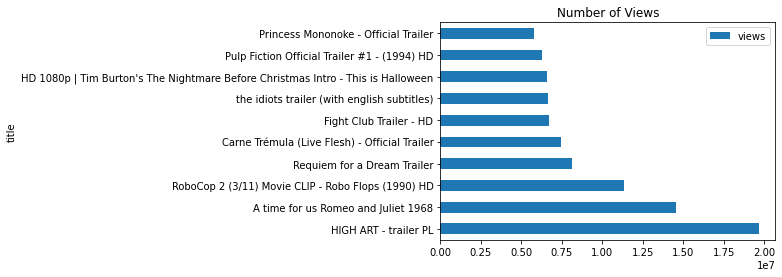

In [ ]:
# Top Viewed Videos From Youtube
top_df.plot.barh(x="title", y="views", title="Number of Views")

In [ ]:
# Least Watched Videos
bottom_df = df.sort_values(by=['views'], ascending=True)[:10]
bottom_df

,title,liked,disliked,views,comment,duration
1170,The Big Band Convention - Live 02.07.1998 - Lo...,0,0,225,0,3:30
1144,Eden Let Your Spirits Soar Trailer 1998,1,0,247,0,1:52
1959,"""Brother, Can You Spare a Dime?"": The Great De...",2,0,342,0,1:8:49
2338,"Best Of ""Sacco E Vanzetti"" (1971)",1,0,396,0,1:11
714,The Leopard Son Trailer 1996,0,0,494,0,1:4
2109,Trans (1998) Movie Review,6,2,562,7,3:2
1851,Rosie (1998) Movie Review,5,0,649,2,3:8
474,SPITFIRE - RUBBER ROSIE (LOWLIFE RECORDINGS 1994),13,0,758,1,3:19
569,The Philadelphia Story 1940 Trailer,1,0,803,0,3:32
613,Bringing Up Baby (1938) Trailer,1,0,812,0,2:20


<AxesSubplot:title={'center':'Number of Views'}, ylabel='title'>

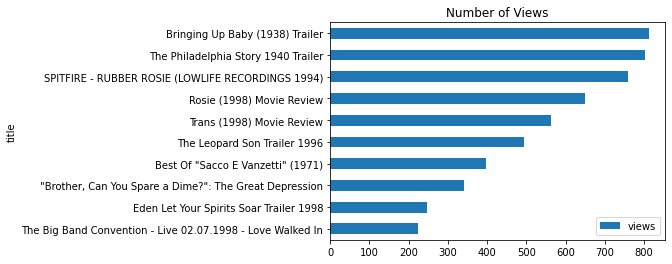

In [ ]:
# Bar Graph to Show Least View Data
bottom_df.plot.barh(x="title", y="views", title="Number of Views")

In [ ]:
# Most Liked Video
df['liked'] = pd.to_numeric(df['liked'], errors='coerce')
most_liked_df = (df[['title','liked']].sort_values('liked', ascending=False).reset_index(drop=True))[:10]
most_liked_df

,title,liked
0,RoboCop 2 (3/11) Movie CLIP - Robo Flops (1990...,85437
1,A time for us Romeo and Juliet 1968,72228
2,Princess Mononoke - Official Trailer,38933
3,HD 1080p | Tim Burton's The Nightmare Before C...,30195
4,Pulp Fiction Official Trailer #1 - (1994) HD,28591
5,Third World Cop (1999) | Official Full Movie,27036
6,Star Wars Episode I: The Phantom Menace - Trailer,25704
7,The Godfather Trailer (HD),21980
8,Kids (1995) Official Trailer #1 - Larry Clark ...,18351
9,Fight Club Trailer - HD,18288


<AxesSubplot:title={'center':'Number of Likes'}, ylabel='title'>

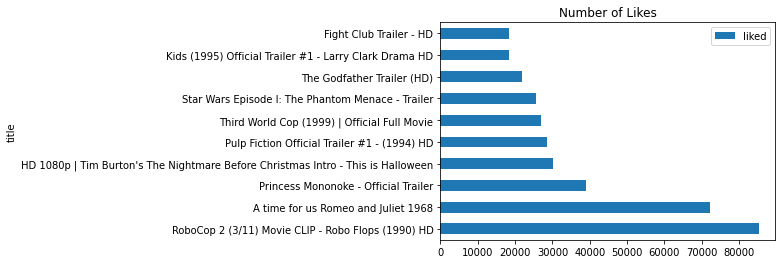

In [ ]:
# Bar Graph to Show Most Liked Videos
most_liked_df.plot.barh(x="title", y="liked", title="Number of Likes")

In [ ]:
# Least Liked Videos
least_liked_df = (df[['title','liked']].sort_values('liked', ascending=True).reset_index(drop=True))[:10]
least_liked_df

,title,liked
0,The Leopard Son Trailer 1996,0
1,The Big Band Convention - Live 02.07.1998 - Lo...,0
2,MR&MRSSMITH,0
3,Bread & Chocolate 3,0
4,His Girl Friday (1940) Trailer 1,1
5,Echte Kerle,1
6,"Best Of ""Sacco E Vanzetti"" (1971)",1
7,The Philadelphia Story 1940 Trailer,1
8,Bringing Up Baby (1938) Trailer,1
9,Breathing Room - Trailer,1


<AxesSubplot:title={'center':'Number of Views'}, ylabel='title'>

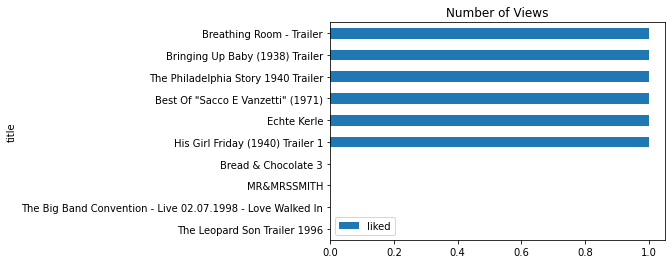

In [ ]:
# Bar Graph to Show Least Liked Videos
least_liked_df.plot.barh(x="title", y="liked", title="Number of Views")

In [ ]:
# Videos with Most Duration
duration_df = (df[['title','duration']].sort_values('duration', ascending=False).reset_index(drop=True))[:10]
duration_df

,title,duration
0,Cat Walk pt1,9:57
1,Wonderful scene from Dersu Uzala (1975),9:57
2,Haunted (1995),9:56
3,A Great Day In Harlem - Harlem 58 - The Photog...,9:56
4,Fotoamator / Photographer - 1 of 2 A story ab...,9:55
5,"Ed's Redeeming Qualities in the film ""Ed's Nex...",9:54
6,Last of the High Kings + SwitchBack (Jared Leto),9:52
7,Some Folks Call It A Sling Blade - PART 1,9:50
8,Mark Harmon - The Amati Girls 1-9,9:47
9,Opening to Alice in Wonderland 1997 VHS,9:45


### Get Comments

In [ ]:
# Function to Get Comments From Youtubes
def get_comments(youtube, **kwargs):
    return youtube.commentThreads().list(
        part="snippet",
        **kwargs
    ).execute()

In [ ]:
all_comments = []
comments = []
c_df = pd.DataFrame()

In [ ]:
# Function to Print Video's Comments from Youtube
for i in range(4000):
    title=data['title'][i]
    try:
#         print("Title:",data['title'][i])
        video_id = videos_id[i]
        params = {
                'videoId': video_id, 
                'maxResults': 10,
                'order': 'relevance', # default is 'time' (newest)
            }
        n_pages = 2
        for j in range(n_pages):
            comments.clear()
            response = get_comments(youtube, **params)
            items = response.get("items")
            if not items:
                break
            for item in items:
                comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
                comments.append(comment)
            if "nextPageToken" in response:
                params["pageToken"] =  response["nextPageToken"]
            else:
                break
        str1 = ''.join(comments)
        all_comments.append((title,str1))
        c_df = pd.DataFrame(all_comments,columns = ('Title', 'Comments'))
    except:
        pass
# all_comments

In [ ]:
# To Print Data
c_df

,Title,Comments
0,Grumpier Old Men (1995),"I&#39;m watching this now, it never gets old🤣W..."
1,Heat (1995),Brings tears to my eyes just thinking how abso...
2,Tom and Huck (1995),i miss the 90s0:54 Tom Sawyer got pwned!!!!!br...
3,GoldenEye (1995),Goldeneye is my favorite Bond film. It&#39;s t...
4,"American President, The (1995)","Over the last four years, I have often thought..."
...,...,...
2884,"Fortune Cookie, The (1966)",The fifth highest grossing film of 1966.THE FO...
2885,Lilies of the Field (1963),I&#39;ve neer seen the movie. But I own the ma...
2886,Hans Christian Andersen (1952),59 years ago when I was 4 my mum took me to th...
2887,"Greatest Story Ever Told, The (1965)","Rest in Peace Max von Sydow, I could never fo..."


### Sentiment Analysis (Vader)

In [ ]:
# Importing Requried Libraries
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
# To get the required Scores of the Comments
c_df['Scores'] = c_df['Comments'].apply(lambda Comments: sid.polarity_scores(Comments))
c_df.head()

,Title,Comments,Scores
0,Grumpier Old Men (1995),"I&#39;m watching this now, it never gets old🤣W...","{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Heat (1995),Brings tears to my eyes just thinking how abso...,"{'neg': 0.077, 'neu': 0.745, 'pos': 0.177, 'co..."
2,Tom and Huck (1995),i miss the 90s0:54 Tom Sawyer got pwned!!!!!br...,"{'neg': 0.044, 'neu': 0.784, 'pos': 0.172, 'co..."
3,GoldenEye (1995),Goldeneye is my favorite Bond film. It&#39;s t...,"{'neg': 0.044, 'neu': 0.859, 'pos': 0.097, 'co..."
4,"American President, The (1995)","Over the last four years, I have often thought...","{'neg': 0.075, 'neu': 0.814, 'pos': 0.111, 'co..."


In [ ]:
# To calculte the compound of the dataset, and type of the sentiment
c_df['compound'] = c_df['Scores'].apply(lambda score_dict: score_dict['compound'])
c_df['sentiment_type']=''
c_df.loc[c_df.compound>0,'sentiment_type']='POSITIVE'
c_df.loc[c_df.compound==0,'sentiment_type']='NEUTRAL'
c_df.loc[c_df.compound<0,'sentiment_type']='NEGATIVE'

In [ ]:
c_df

,Title,Comments,Scores,compound,sentiment_type
0,Grumpier Old Men (1995),"I&#39;m watching this now, it never gets old🤣W...","{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.9140,POSITIVE
1,Heat (1995),Brings tears to my eyes just thinking how abso...,"{'neg': 0.077, 'neu': 0.745, 'pos': 0.177, 'co...",0.9866,POSITIVE
2,Tom and Huck (1995),i miss the 90s0:54 Tom Sawyer got pwned!!!!!br...,"{'neg': 0.044, 'neu': 0.784, 'pos': 0.172, 'co...",0.9474,POSITIVE
3,GoldenEye (1995),Goldeneye is my favorite Bond film. It&#39;s t...,"{'neg': 0.044, 'neu': 0.859, 'pos': 0.097, 'co...",0.9607,POSITIVE
4,"American President, The (1995)","Over the last four years, I have often thought...","{'neg': 0.075, 'neu': 0.814, 'pos': 0.111, 'co...",0.1779,POSITIVE
...,...,...,...,...,...
2884,"Fortune Cookie, The (1966)",The fifth highest grossing film of 1966.THE FO...,"{'neg': 0.019, 'neu': 0.762, 'pos': 0.218, 'co...",0.9231,POSITIVE
2885,Lilies of the Field (1963),I&#39;ve neer seen the movie. But I own the ma...,"{'neg': 0.096, 'neu': 0.638, 'pos': 0.266, 'co...",0.9971,POSITIVE
2886,Hans Christian Andersen (1952),59 years ago when I was 4 my mum took me to th...,"{'neg': 0.03, 'neu': 0.702, 'pos': 0.268, 'com...",0.9937,POSITIVE
2887,"Greatest Story Ever Told, The (1965)","Rest in Peace Max von Sydow, I could never fo...","{'neg': 0.02, 'neu': 0.836, 'pos': 0.144, 'com...",0.9845,POSITIVE


<AxesSubplot:title={'center':'sentiment analysis'}>

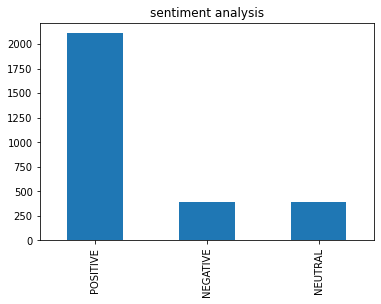

In [ ]:
# Bar Graph to show the sentiments
c_df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [ ]:
# To calculate the positive, negative and neutral sentiments
c_df['neg'] = c_df['Comments'].apply(lambda x:sid.polarity_scores(x)['neg'])
c_df['neu'] = c_df['Comments'].apply(lambda x:sid.polarity_scores(x)['neu'])
c_df['pos'] = c_df['Comments'].apply(lambda x:sid.polarity_scores(x)['pos'])

In [ ]:
c_df

,Title,Comments,Scores,compound,sentiment_type,neg,neu,pos
0,Grumpier Old Men (1995),"I&#39;m watching this now, it never gets old🤣W...","{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.9140,POSITIVE,0.000,0.887,0.113
1,Heat (1995),Brings tears to my eyes just thinking how abso...,"{'neg': 0.077, 'neu': 0.745, 'pos': 0.177, 'co...",0.9866,POSITIVE,0.077,0.745,0.177
2,Tom and Huck (1995),i miss the 90s0:54 Tom Sawyer got pwned!!!!!br...,"{'neg': 0.044, 'neu': 0.784, 'pos': 0.172, 'co...",0.9474,POSITIVE,0.044,0.784,0.172
3,GoldenEye (1995),Goldeneye is my favorite Bond film. It&#39;s t...,"{'neg': 0.044, 'neu': 0.859, 'pos': 0.097, 'co...",0.9607,POSITIVE,0.044,0.859,0.097
4,"American President, The (1995)","Over the last four years, I have often thought...","{'neg': 0.075, 'neu': 0.814, 'pos': 0.111, 'co...",0.1779,POSITIVE,0.075,0.814,0.111
...,...,...,...,...,...,...,...,...
2884,"Fortune Cookie, The (1966)",The fifth highest grossing film of 1966.THE FO...,"{'neg': 0.019, 'neu': 0.762, 'pos': 0.218, 'co...",0.9231,POSITIVE,0.019,0.762,0.218
2885,Lilies of the Field (1963),I&#39;ve neer seen the movie. But I own the ma...,"{'neg': 0.096, 'neu': 0.638, 'pos': 0.266, 'co...",0.9971,POSITIVE,0.096,0.638,0.266
2886,Hans Christian Andersen (1952),59 years ago when I was 4 my mum took me to th...,"{'neg': 0.03, 'neu': 0.702, 'pos': 0.268, 'com...",0.9937,POSITIVE,0.030,0.702,0.268
2887,"Greatest Story Ever Told, The (1965)","Rest in Peace Max von Sydow, I could never fo...","{'neg': 0.02, 'neu': 0.836, 'pos': 0.144, 'com...",0.9845,POSITIVE,0.020,0.836,0.144


In [ ]:
# Top Positive Videos
positive_df = (c_df[['Title','pos']].sort_values('pos', ascending=False).reset_index(drop=True))[:10]
positive_df

,Title,pos
0,Dangerous Game (1993),1.000
1,Madame Sousatzka (1988),1.000
2,Fly Away Home (1996),1.000
3,Adventures of Buckaroo Banzai Across the 8th D...,0.804
4,"Clan of the Cave Bear, The (1986)",0.804
5,Bad Moon (1996),0.787
6,"Innocent Sleep, The (1996)",0.786
7,"Crouching Tiger, Hidden Dragon (Wo hu cang lon...",0.756
8,Go West (1925),0.756
9,Maximum Risk (1996),0.744


<AxesSubplot:title={'center':'Number of Poitive Videos'}, ylabel='Title'>

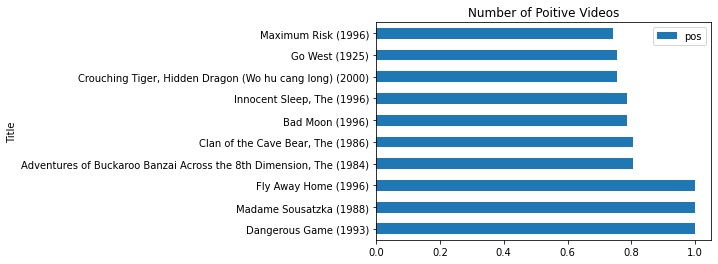

In [ ]:
# Bar Graph to Show Top Positive Videos
positive_df.plot.barh(x="Title", y="pos", title="Number of Poitive Videos")

### Note: Used limited data, as my system was not capable of handling more data, but code that can be used to run on all the given dataset.

#### References
https://stackoverflow.com/
https://data-science-blog.com/
towardsdatascience.com
https://www.thepythoncode.com/
https://medium.com/
https://www.geeksforgeeks.org/